In [34]:
import torch
from torchvision.utils import save_image
from my_gan import *
import matplotlib.pyplot as plt
from PIL import Image
import random


In [35]:
generator = Generator(100)
state_dict = torch.load('./mnist_generator.pt', map_location='cpu')
generator.load_state_dict(state_dict)
generator.eval()


Generator(
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

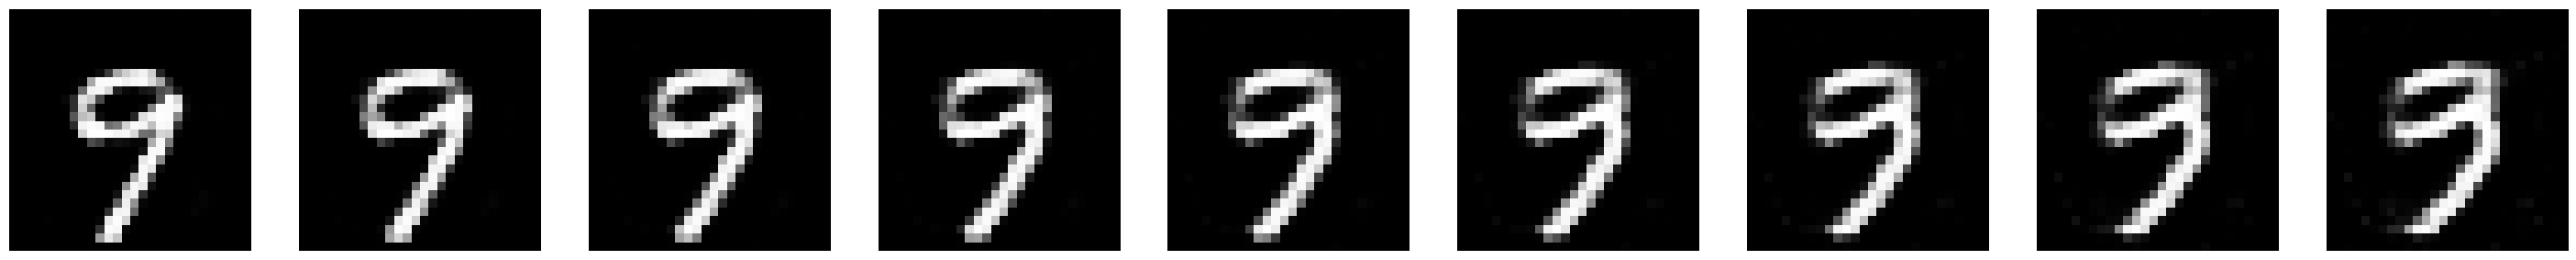

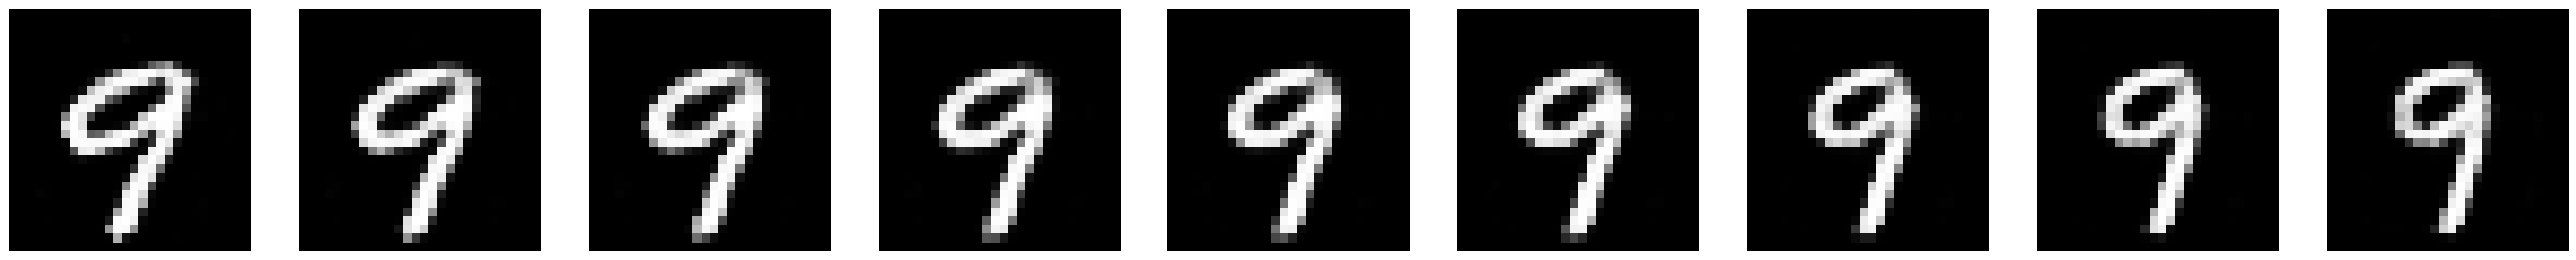

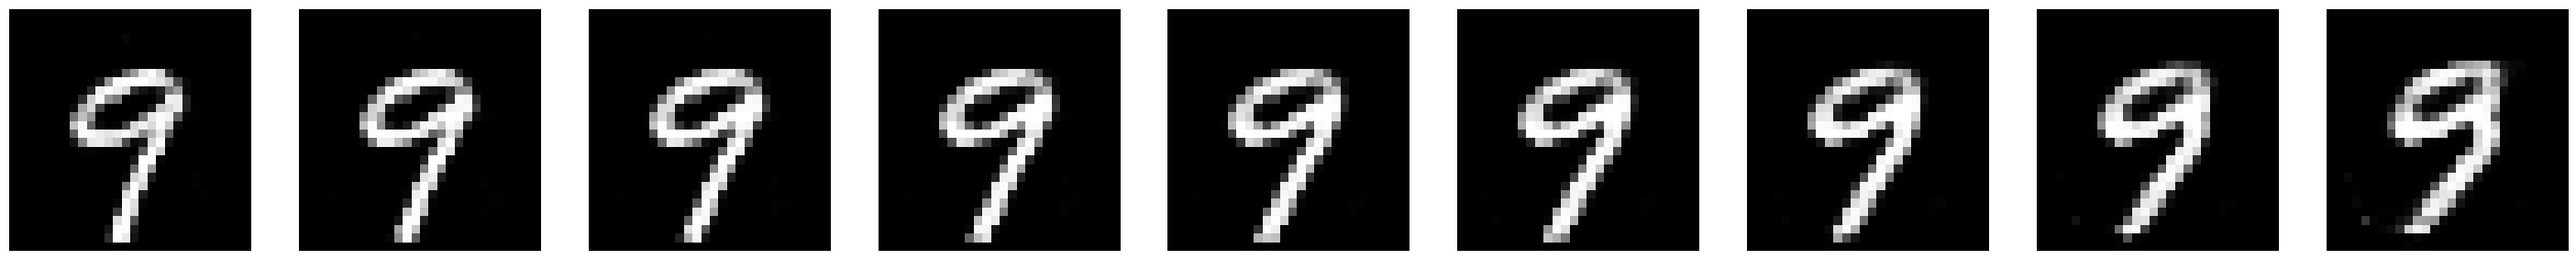

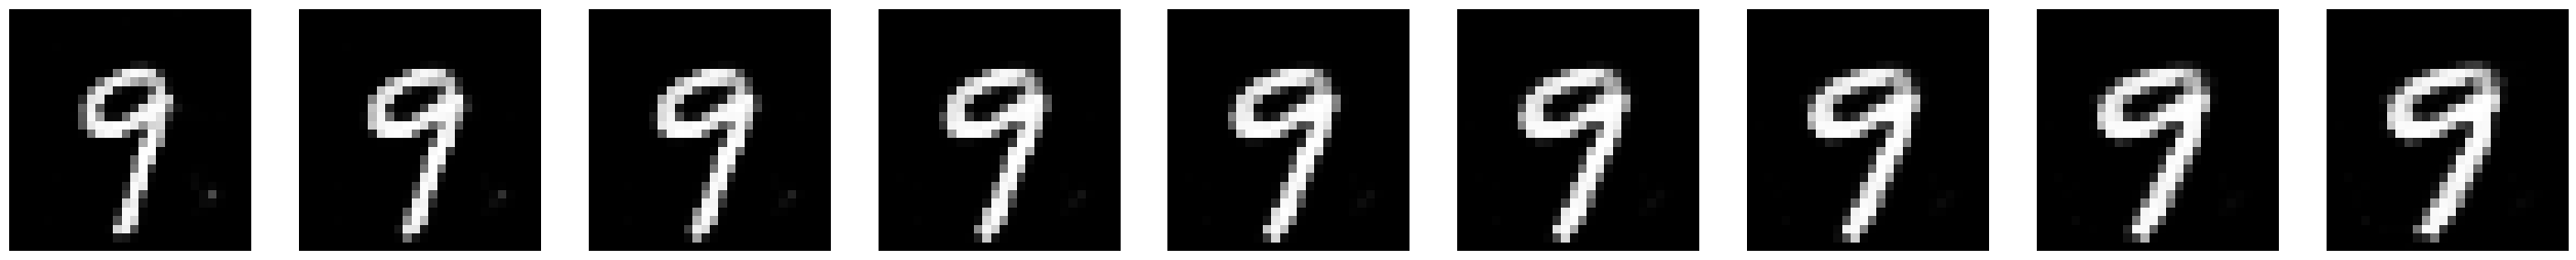

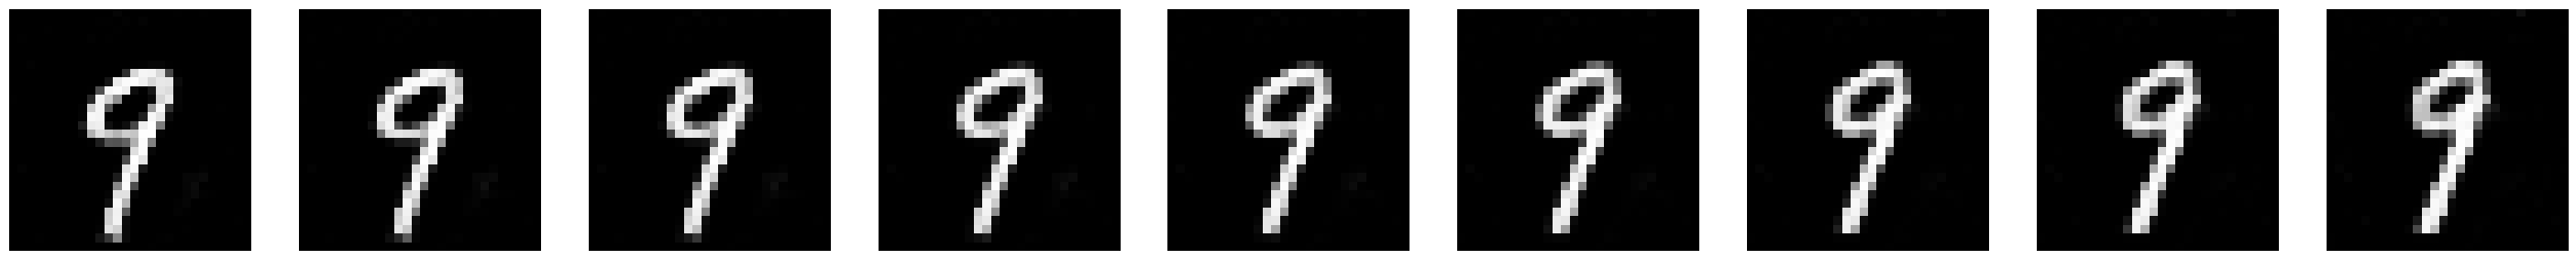

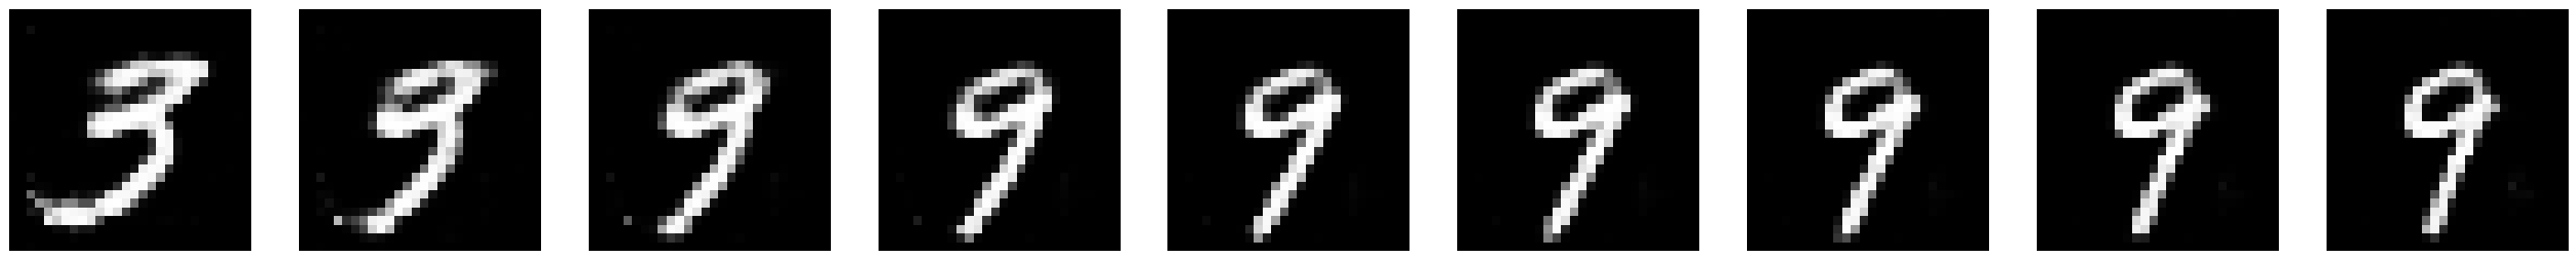

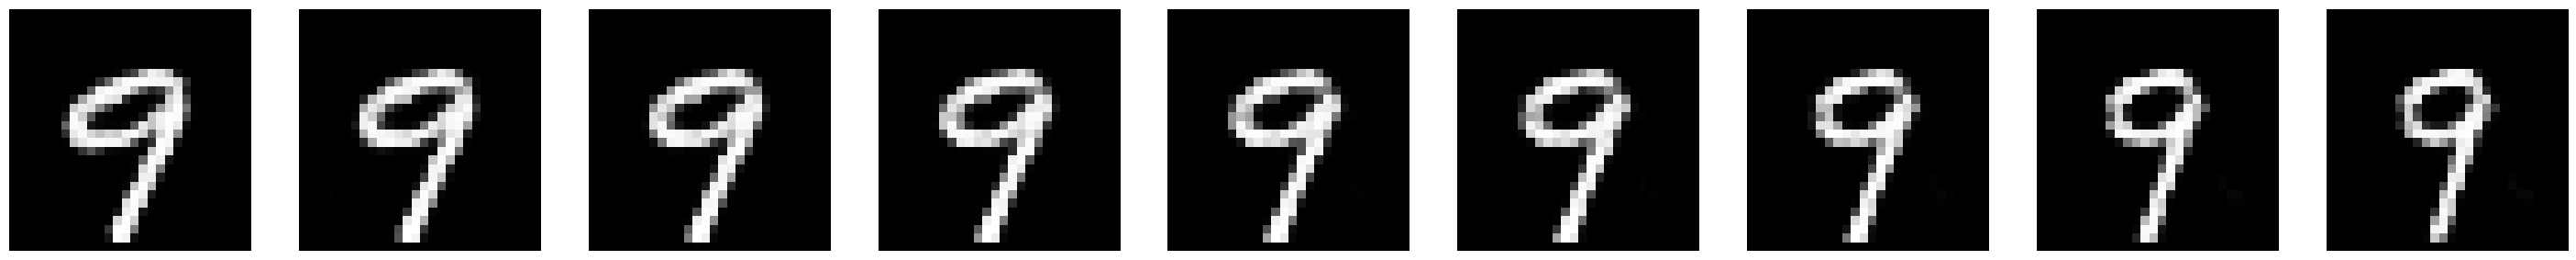

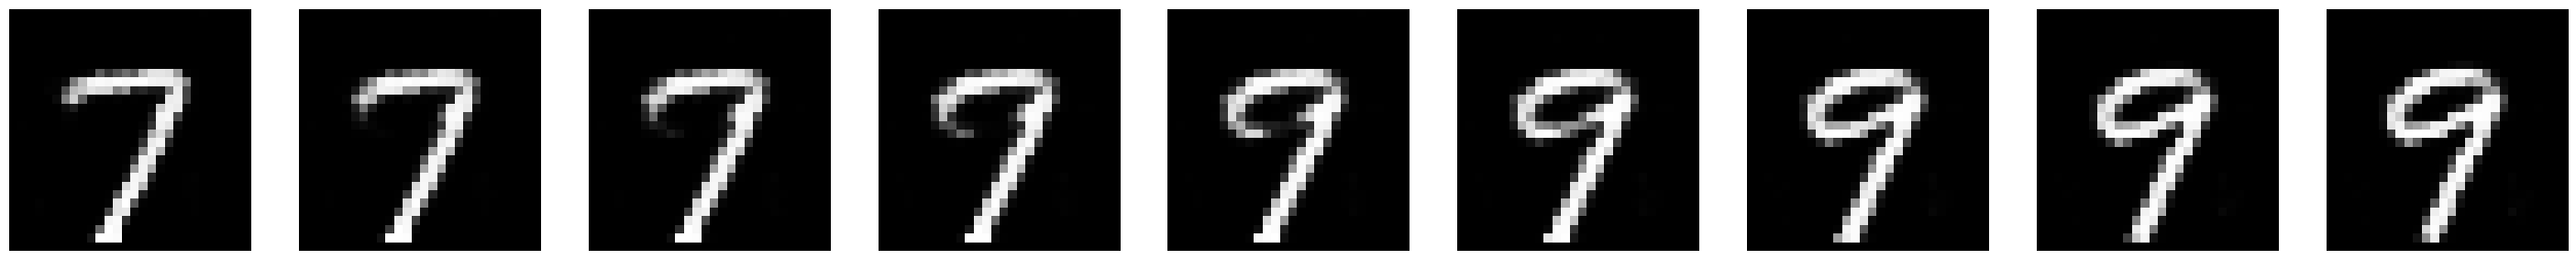

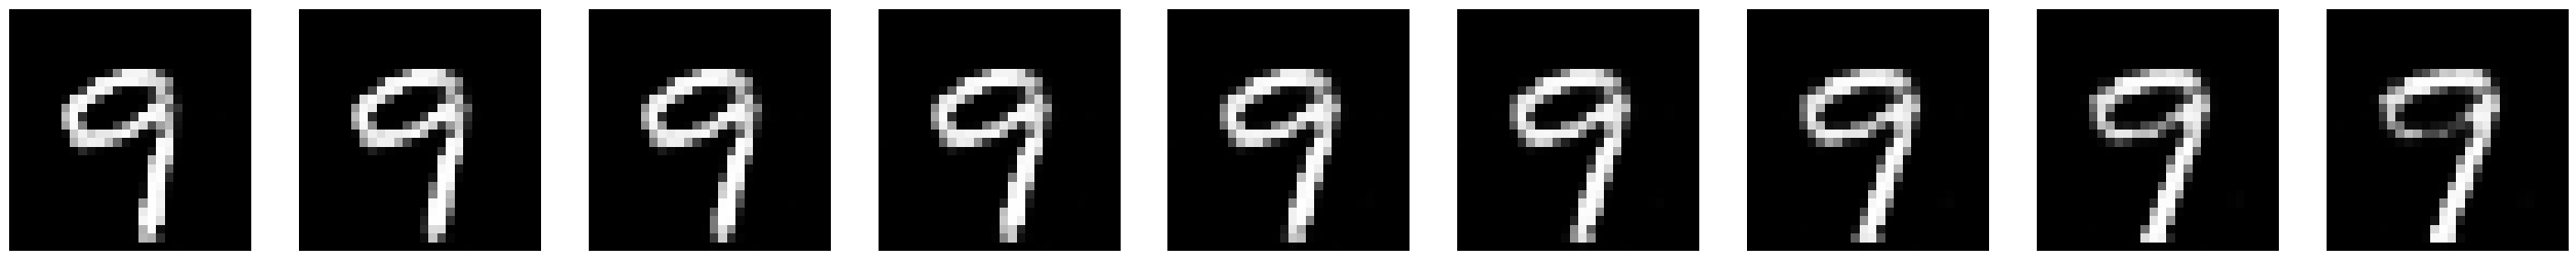

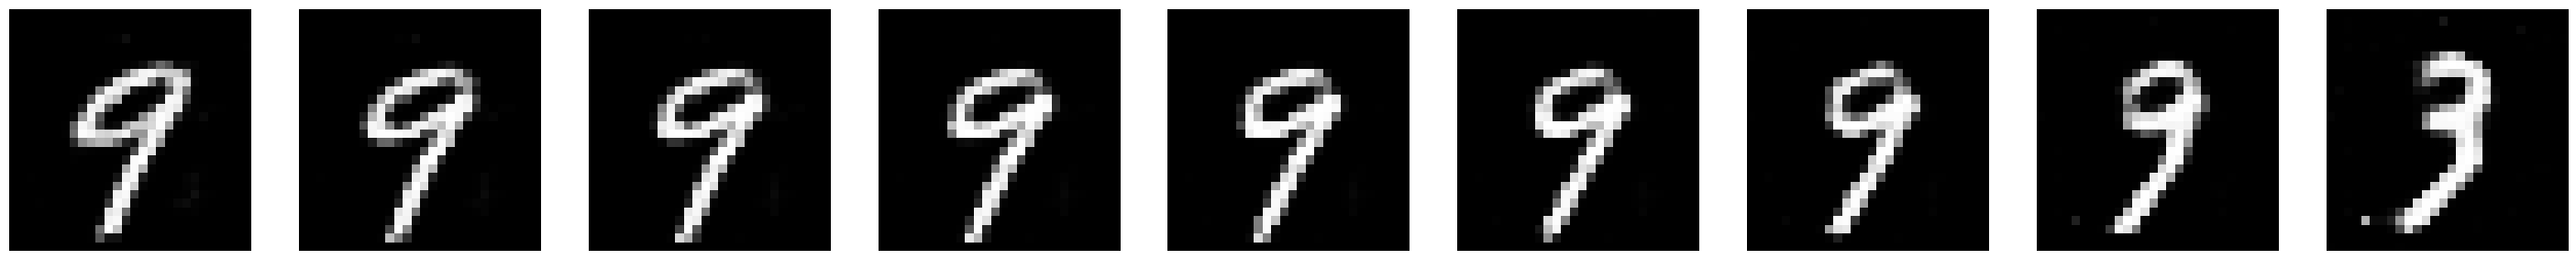

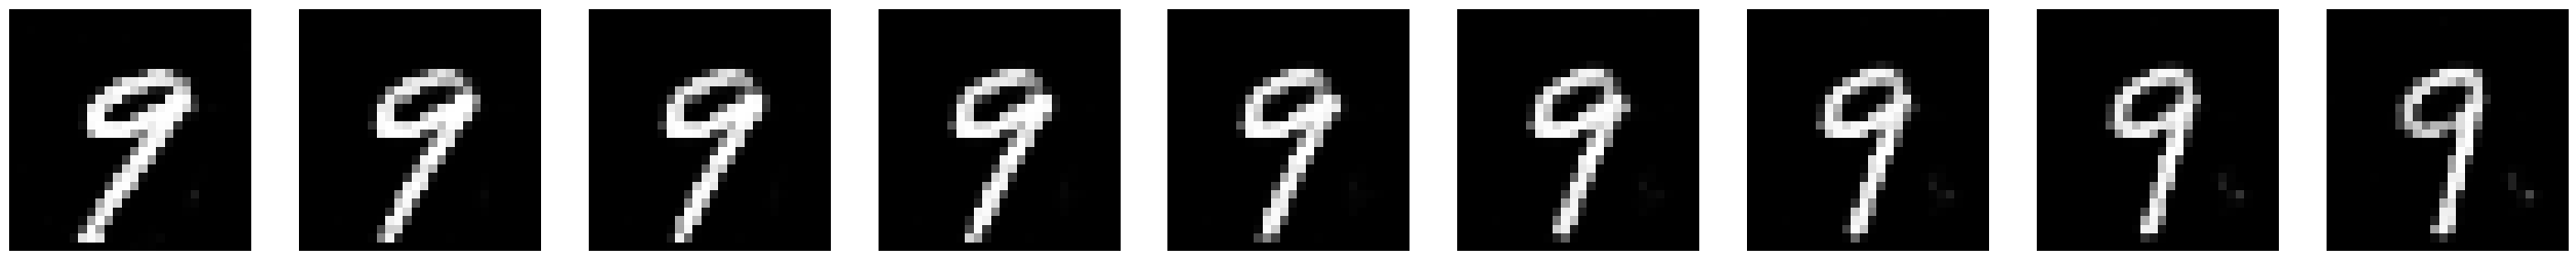

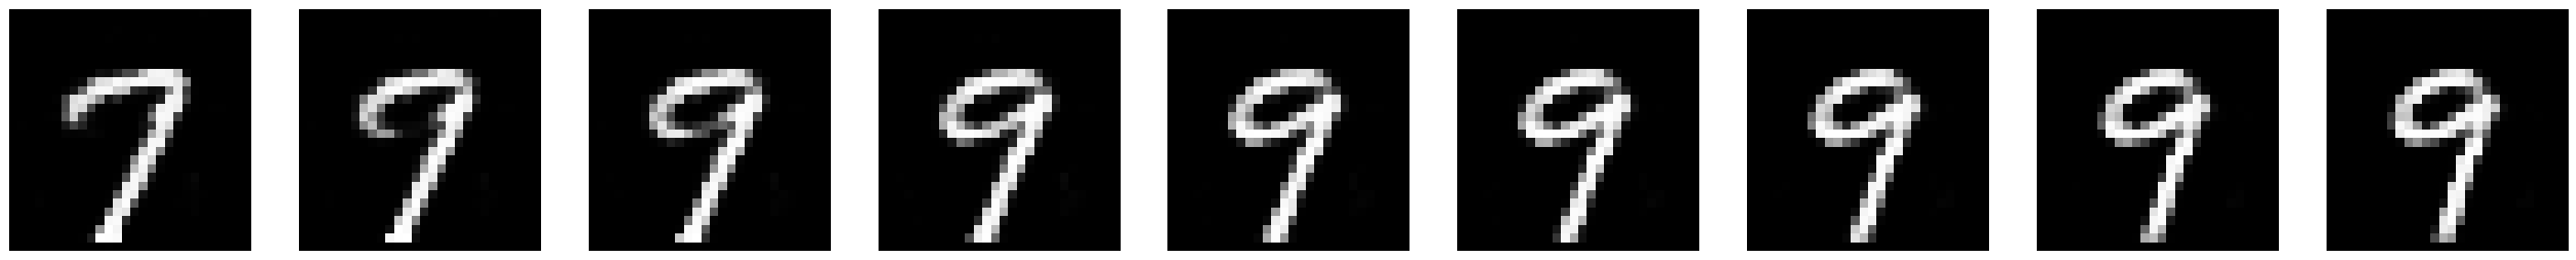

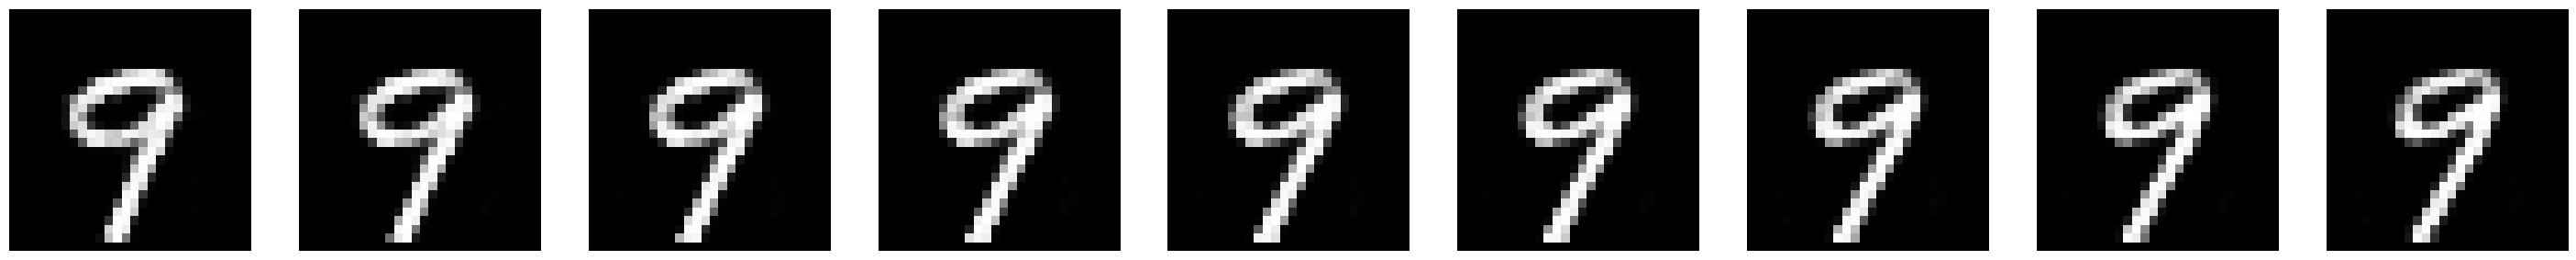

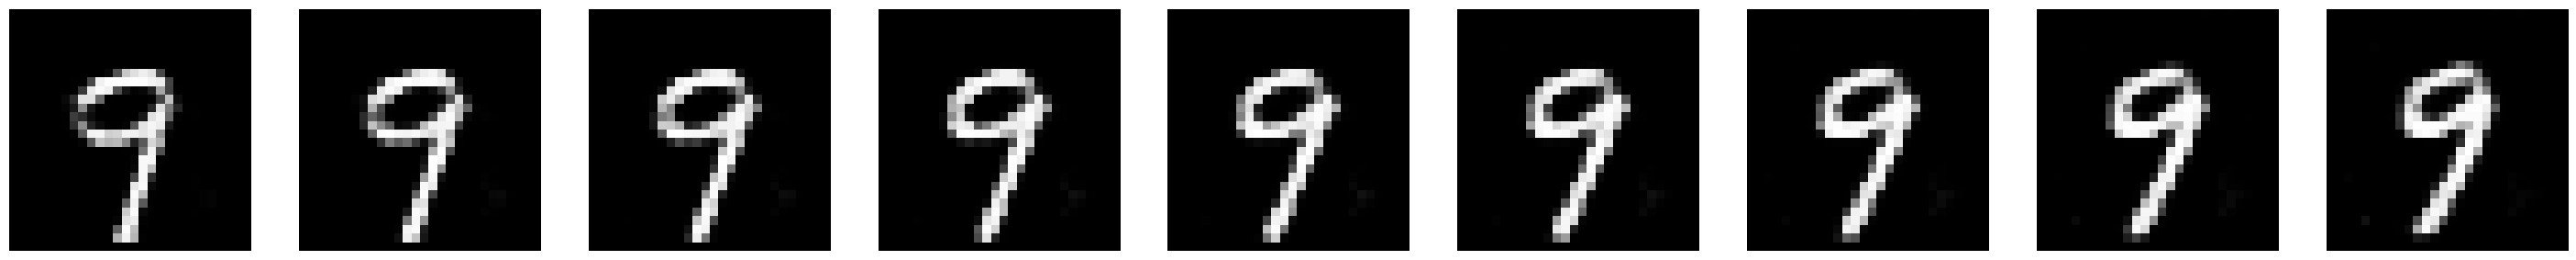

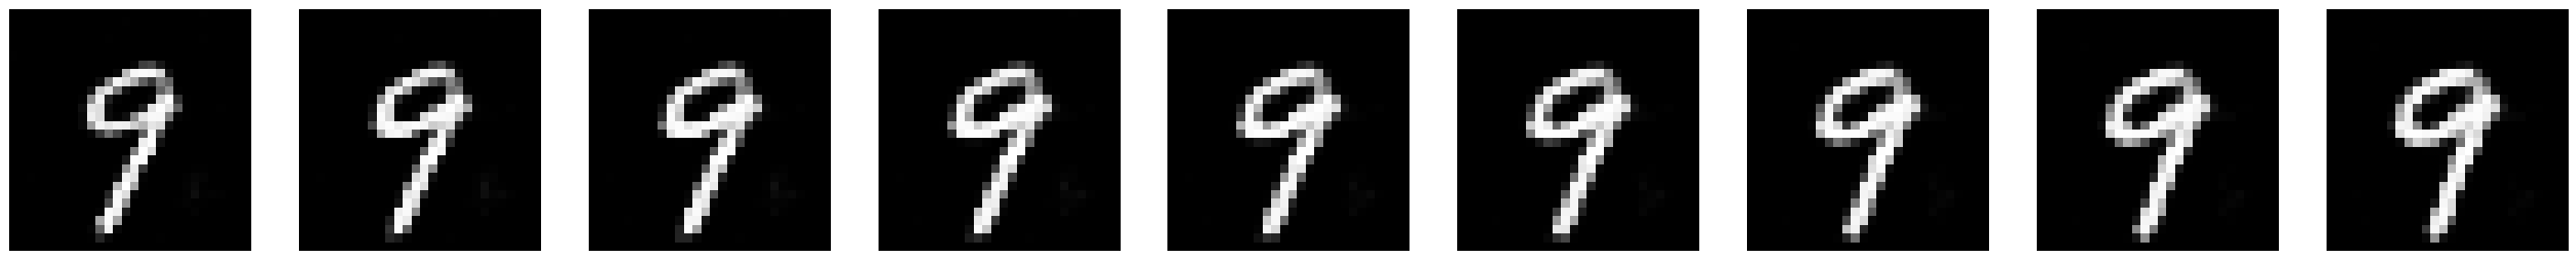

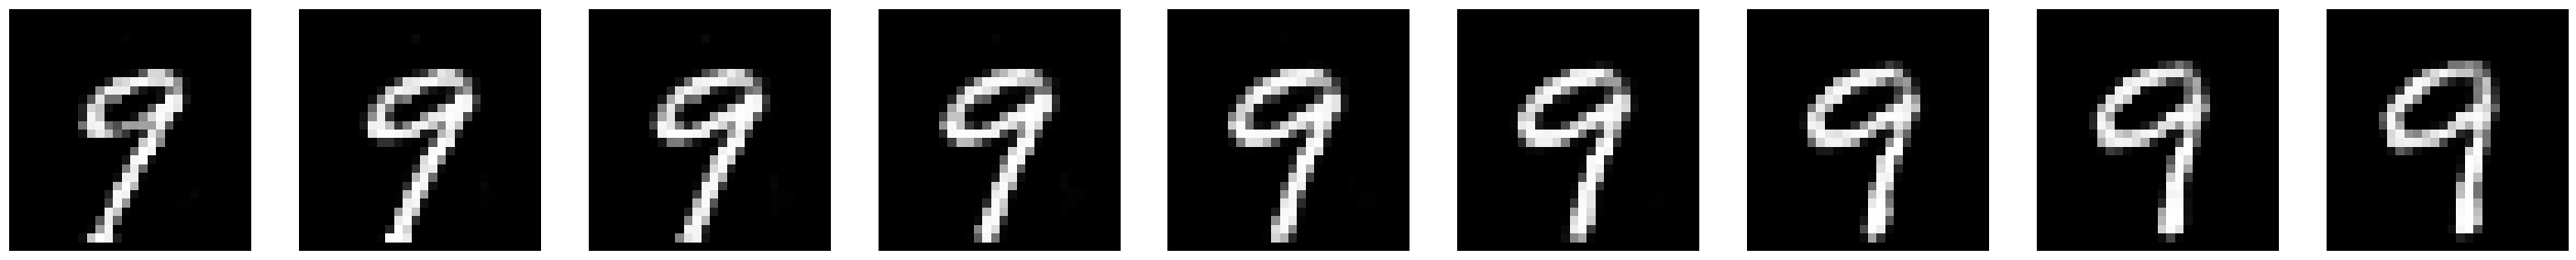

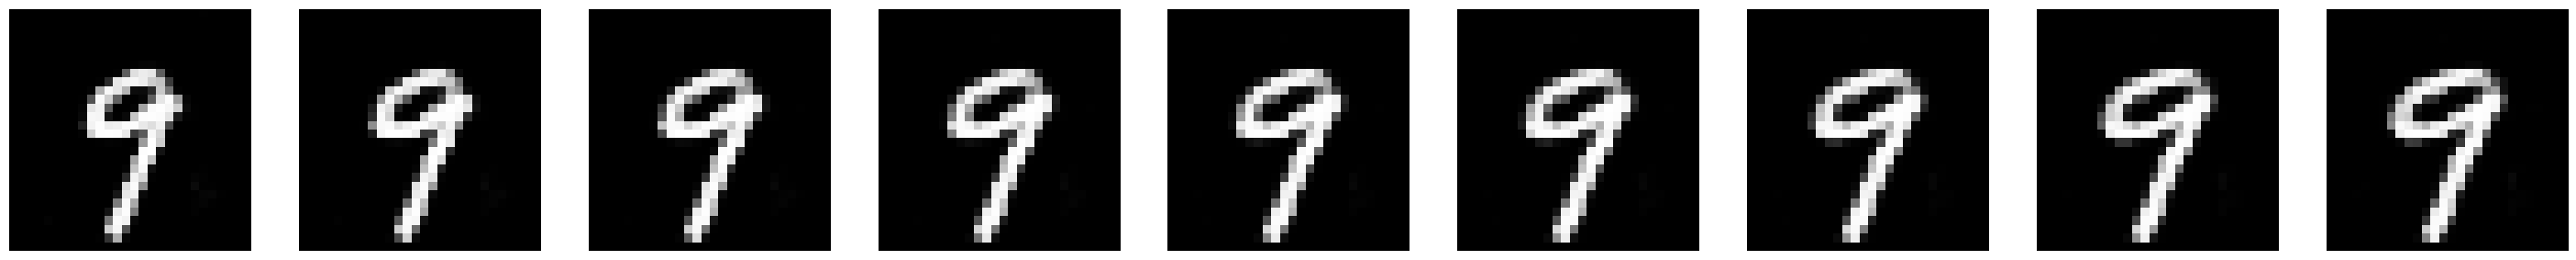

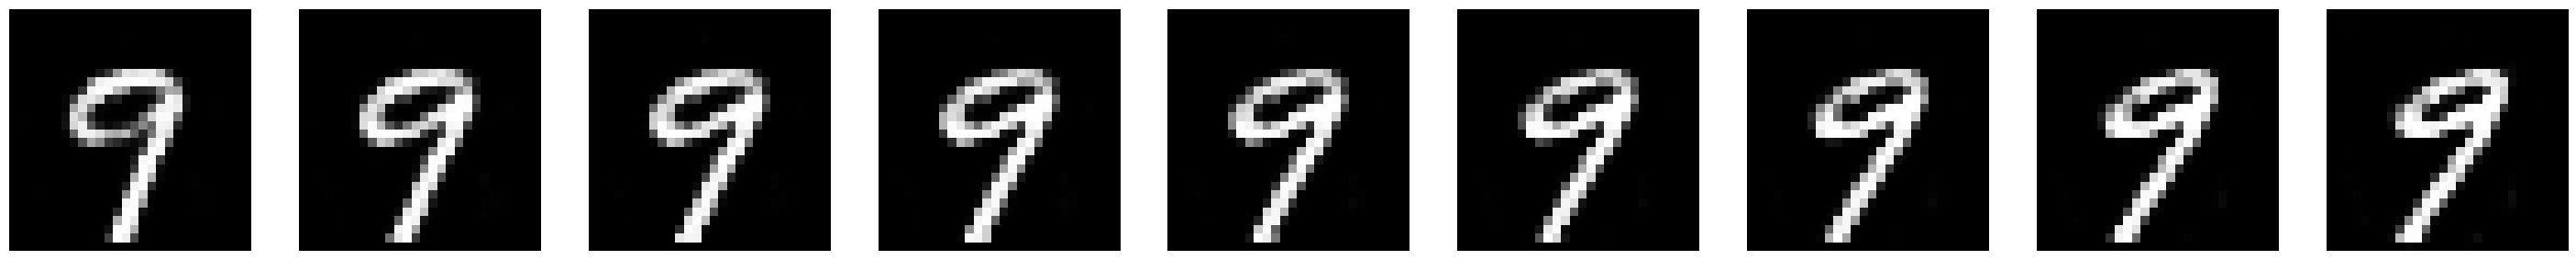

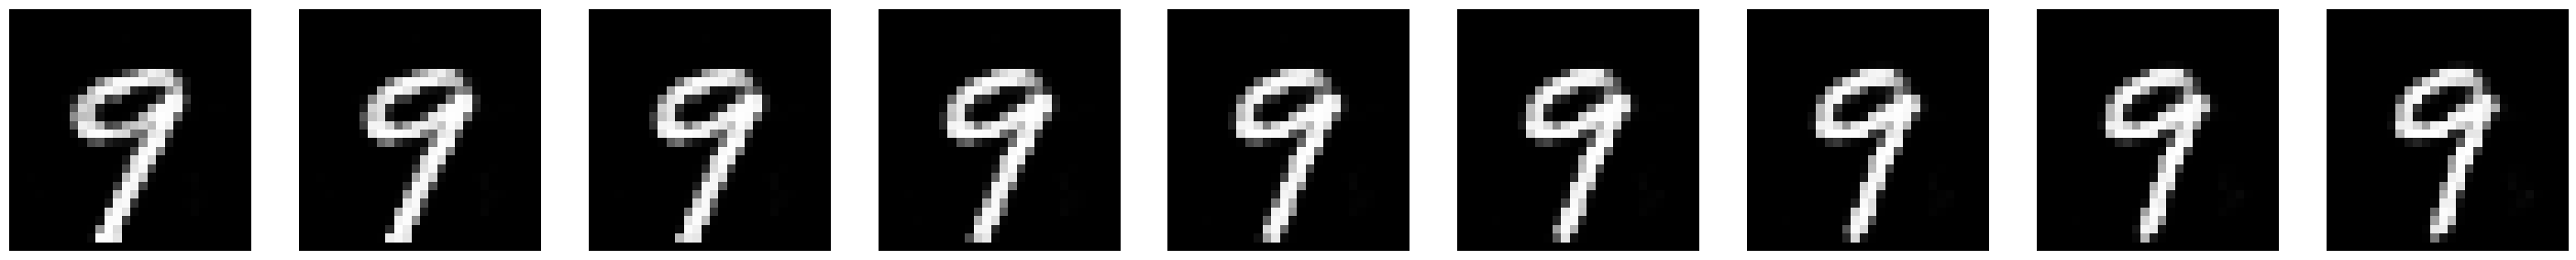

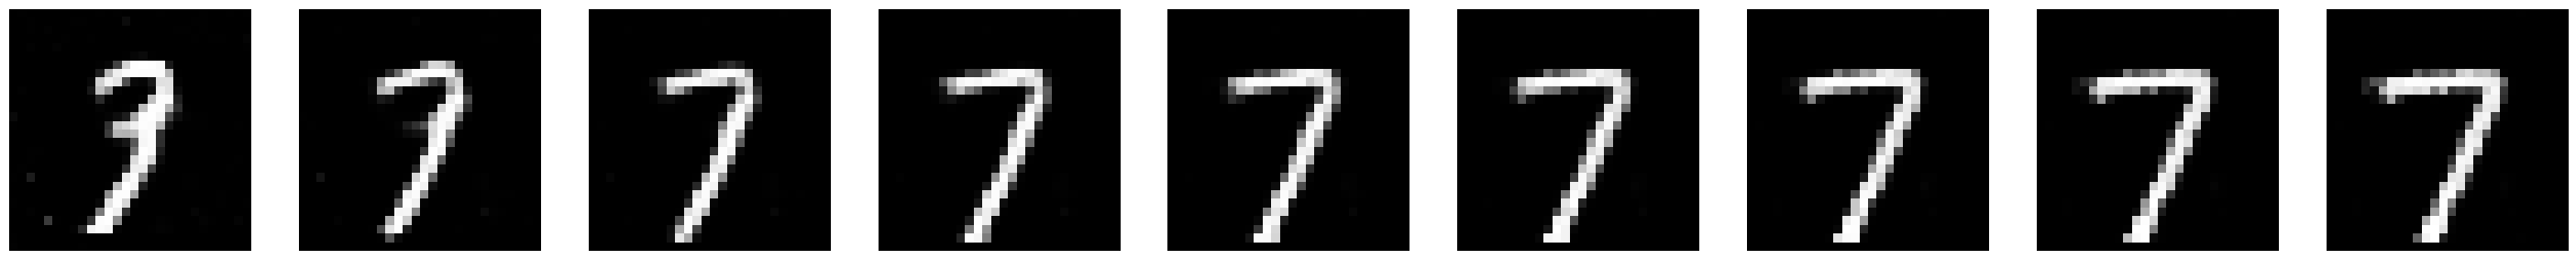

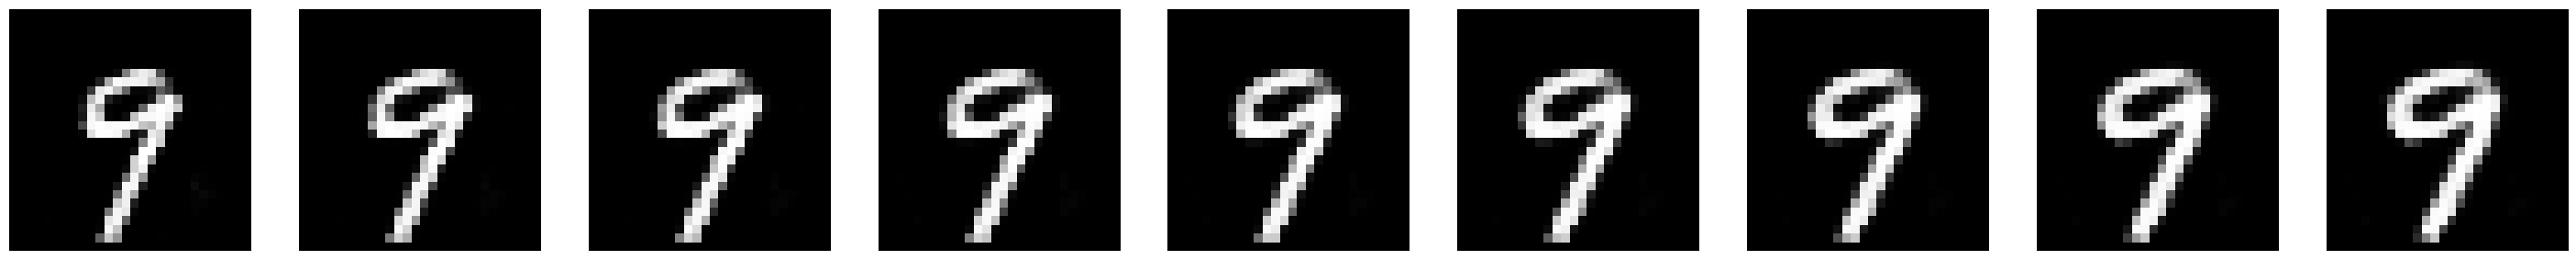

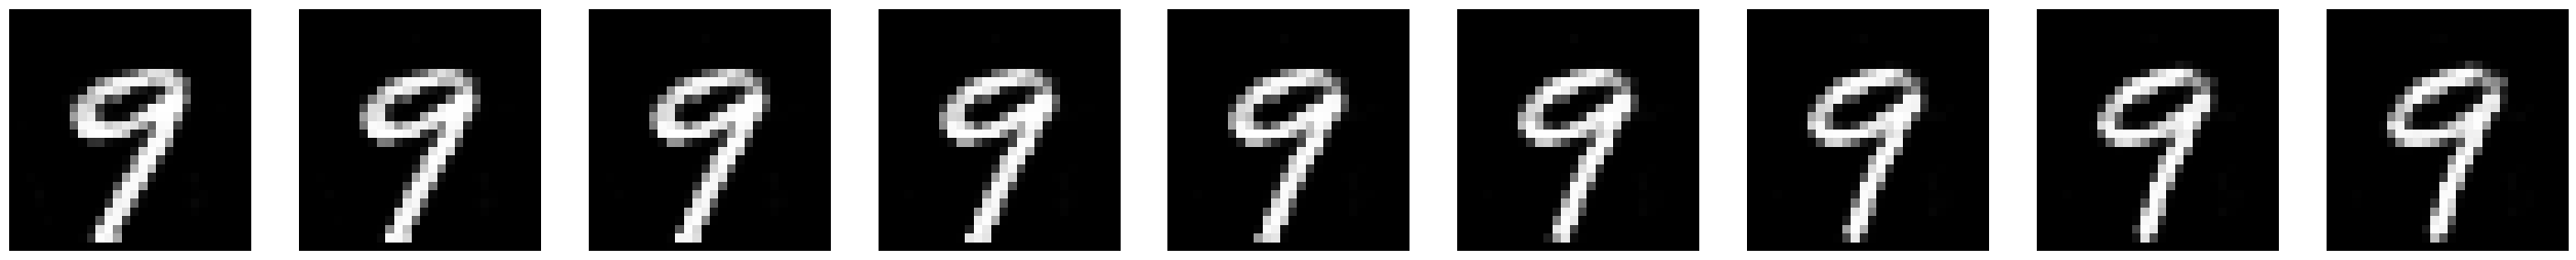

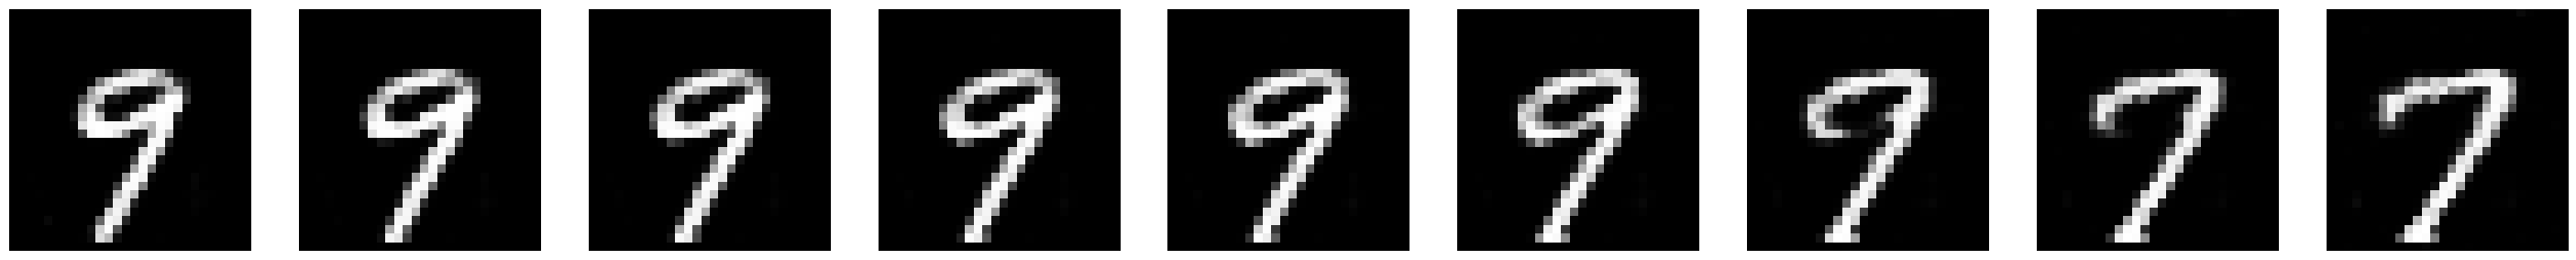

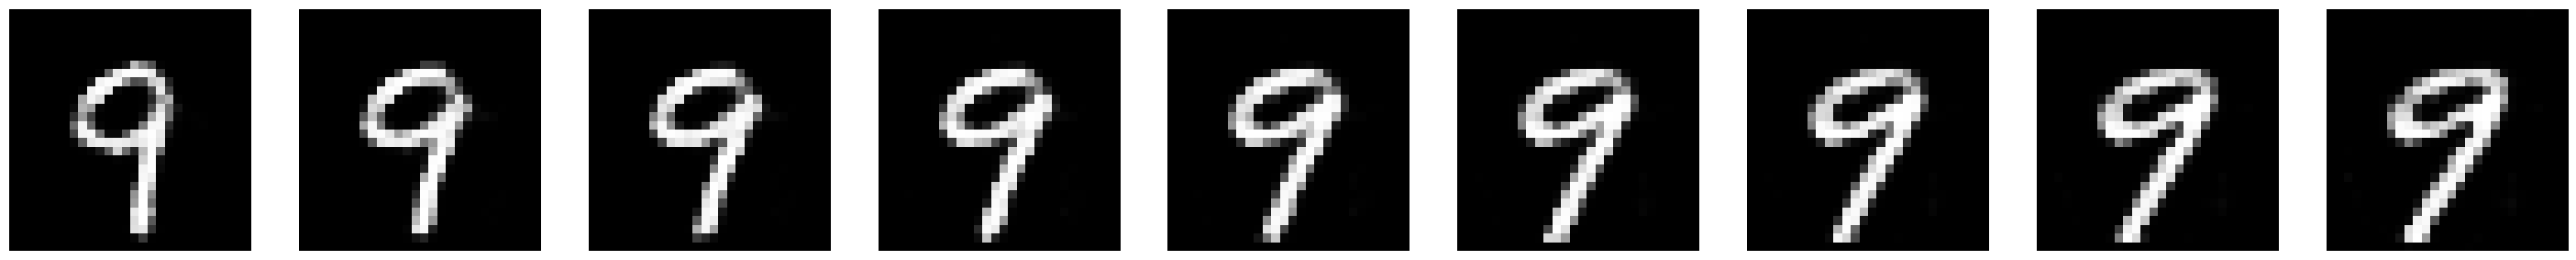

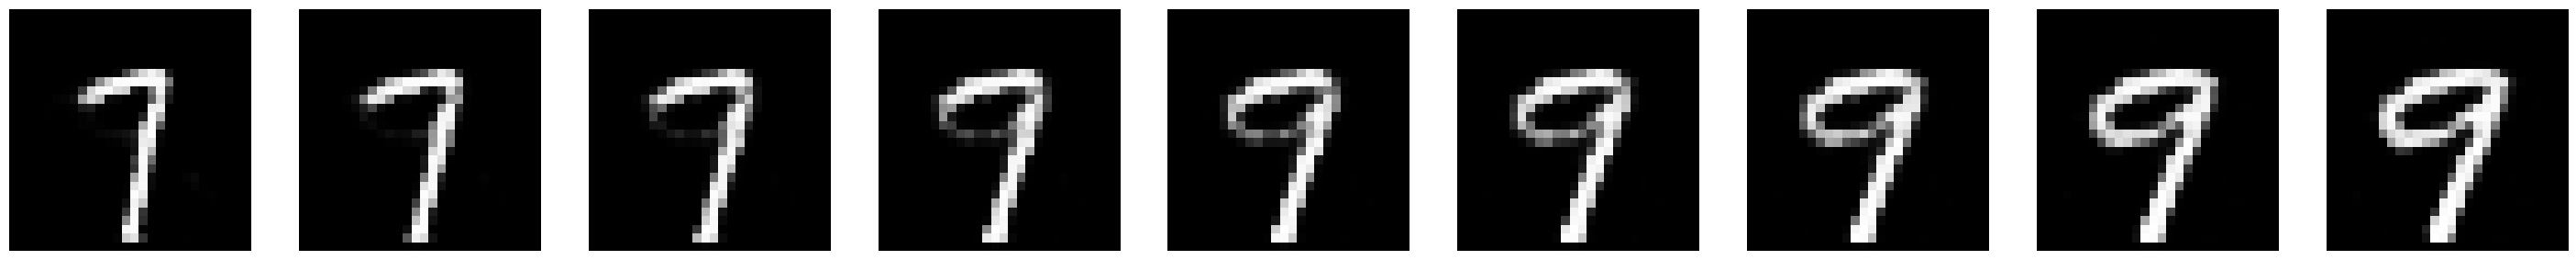

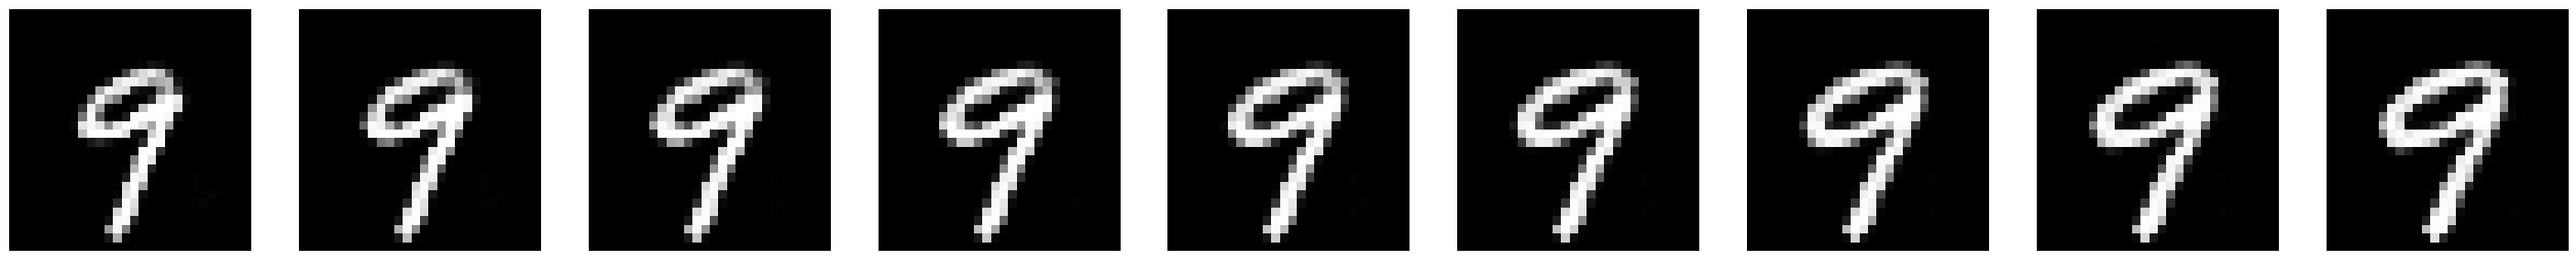

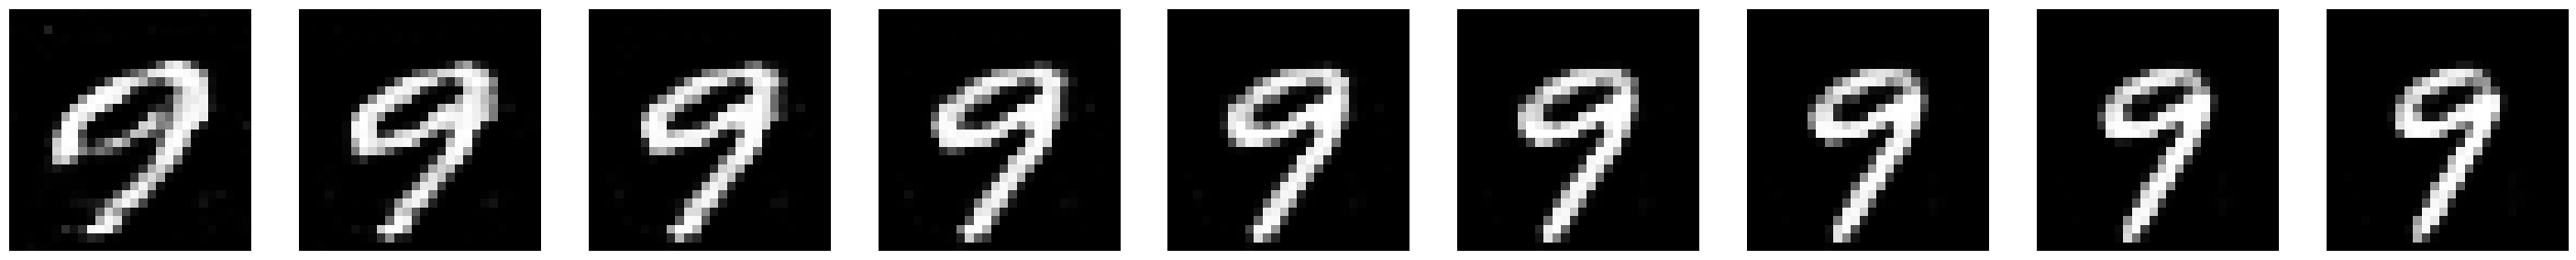

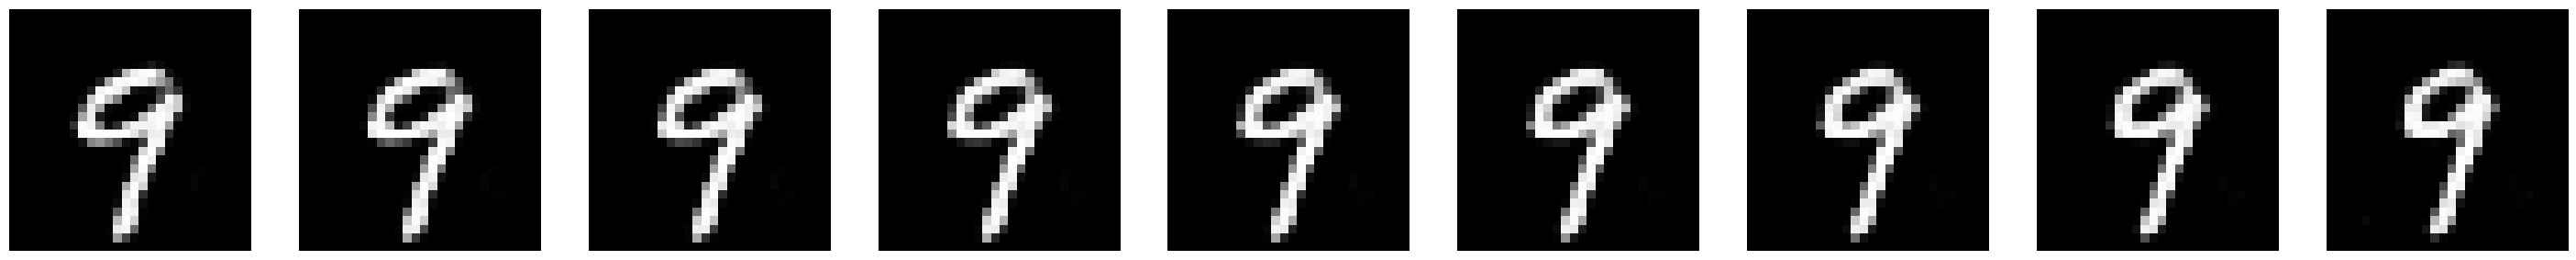

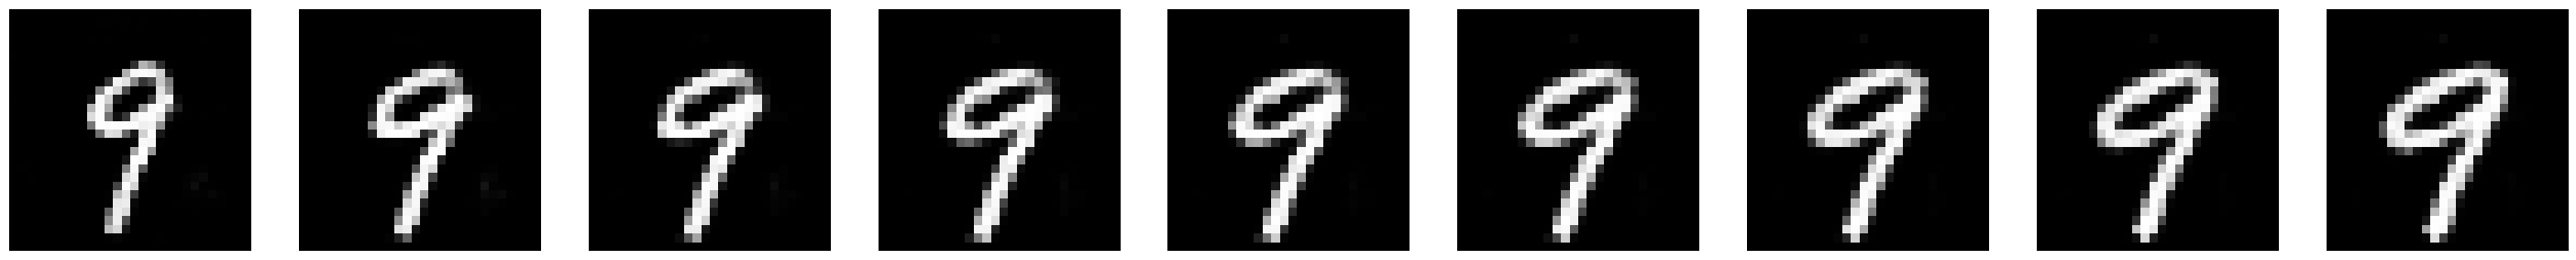

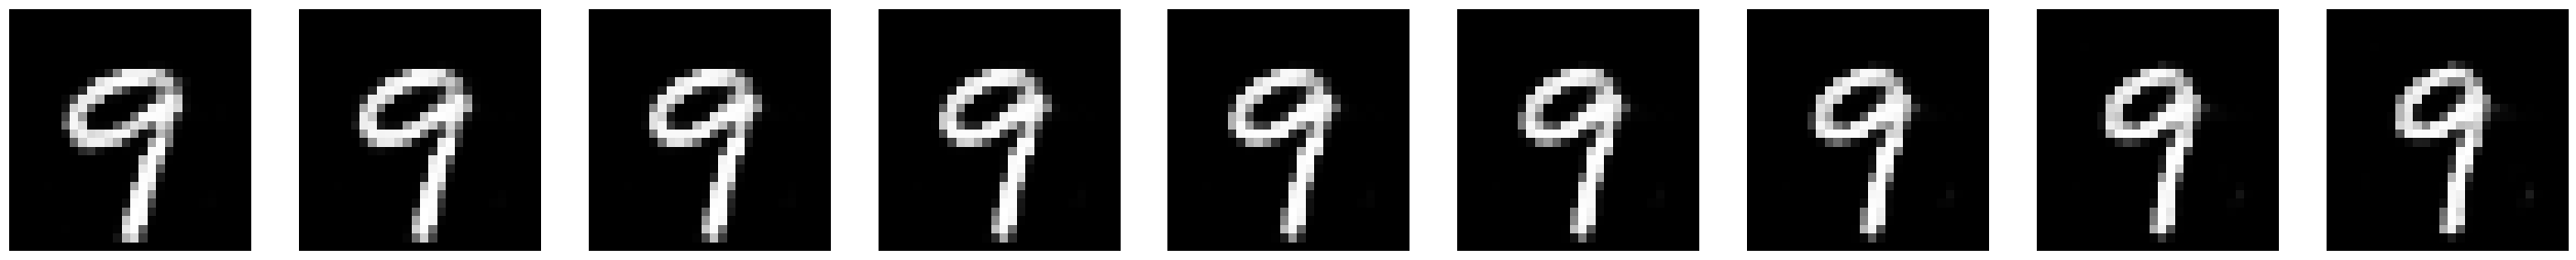

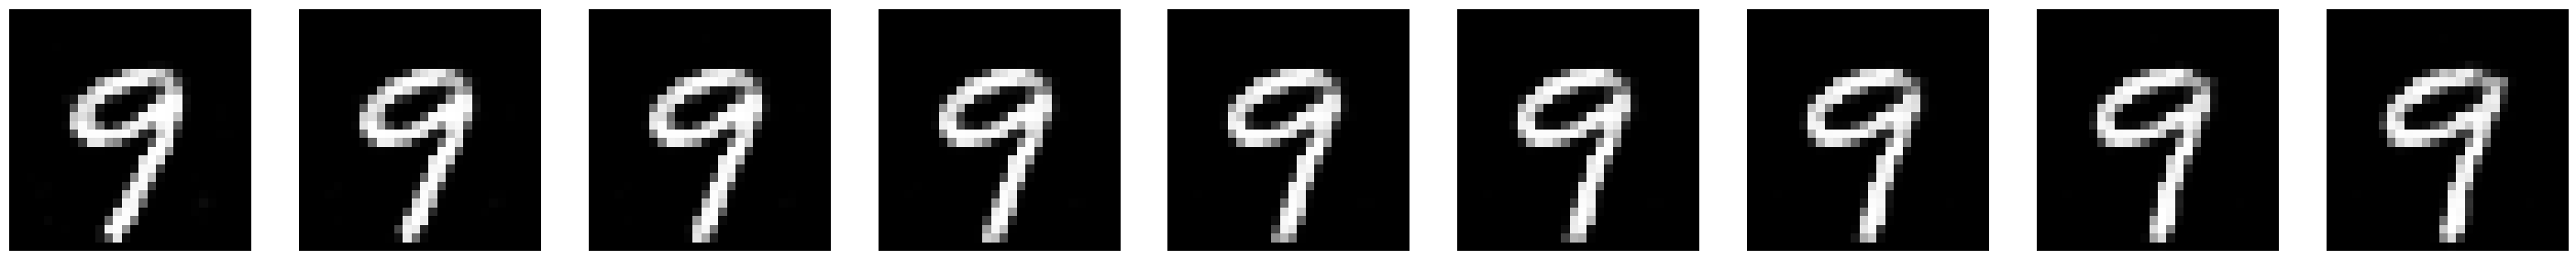

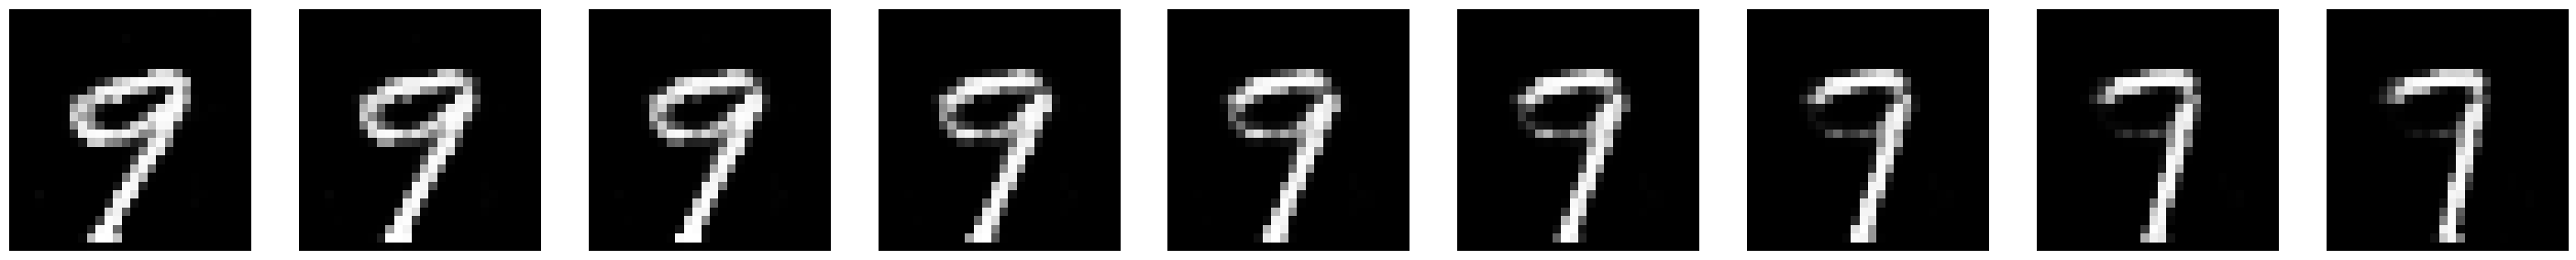

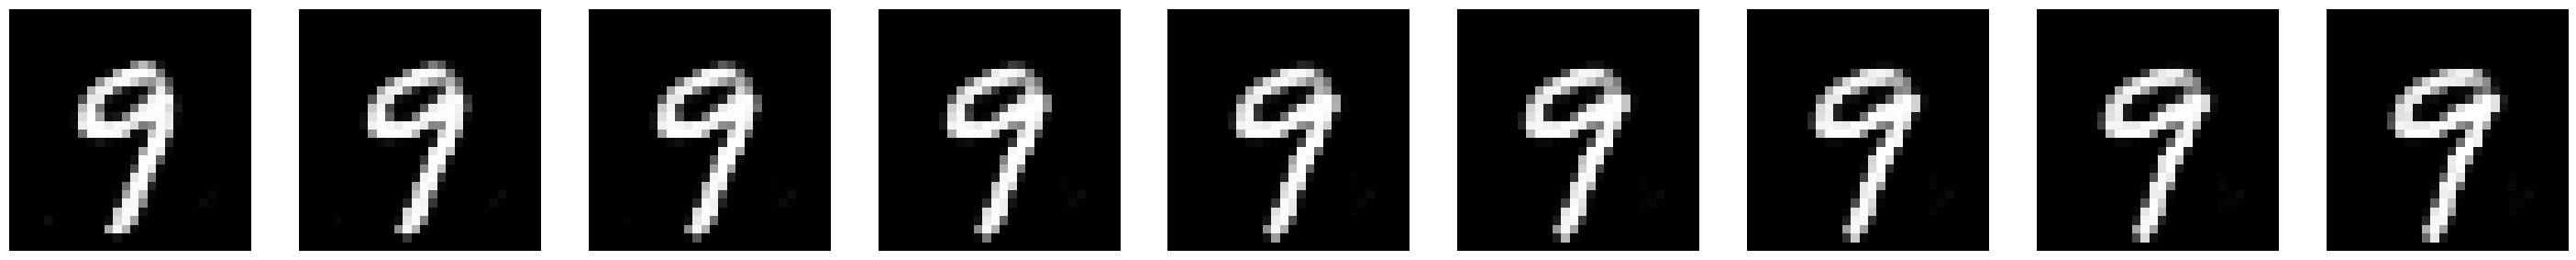

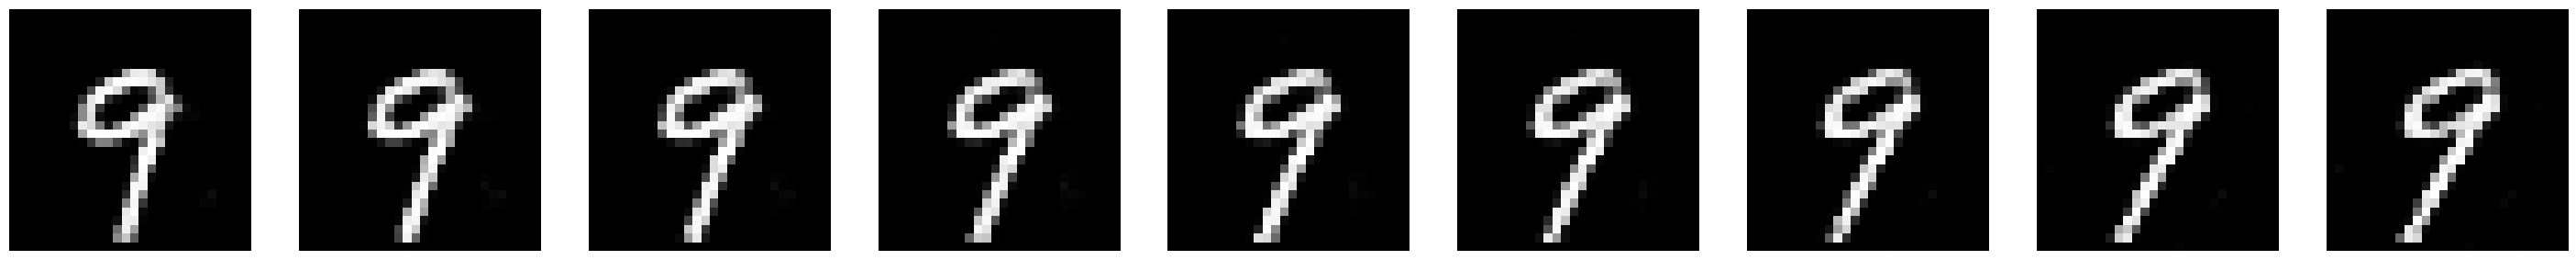

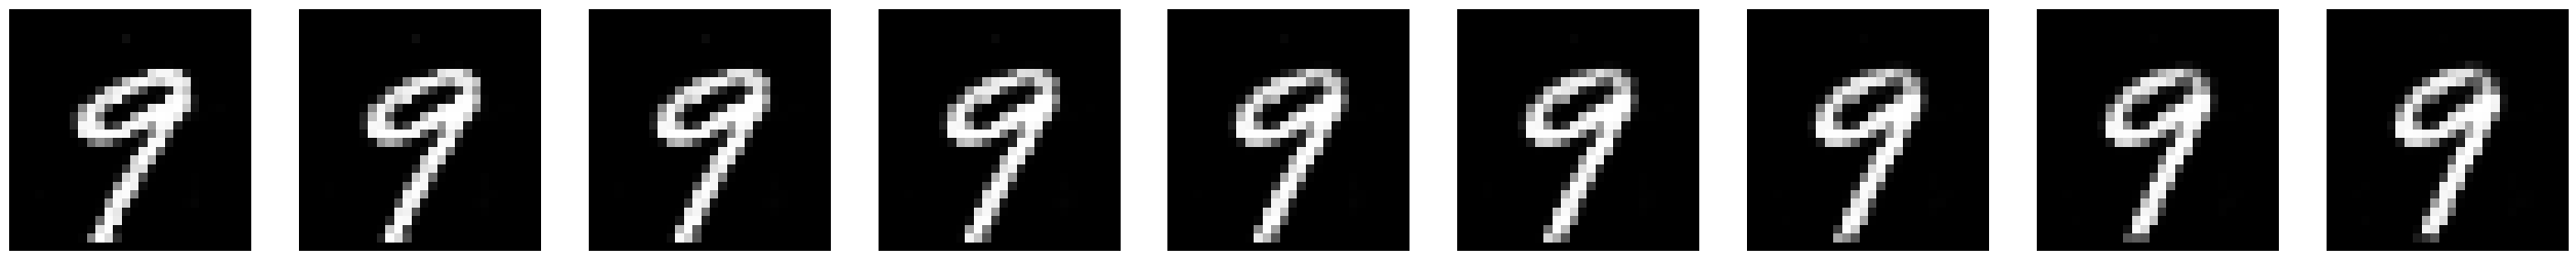

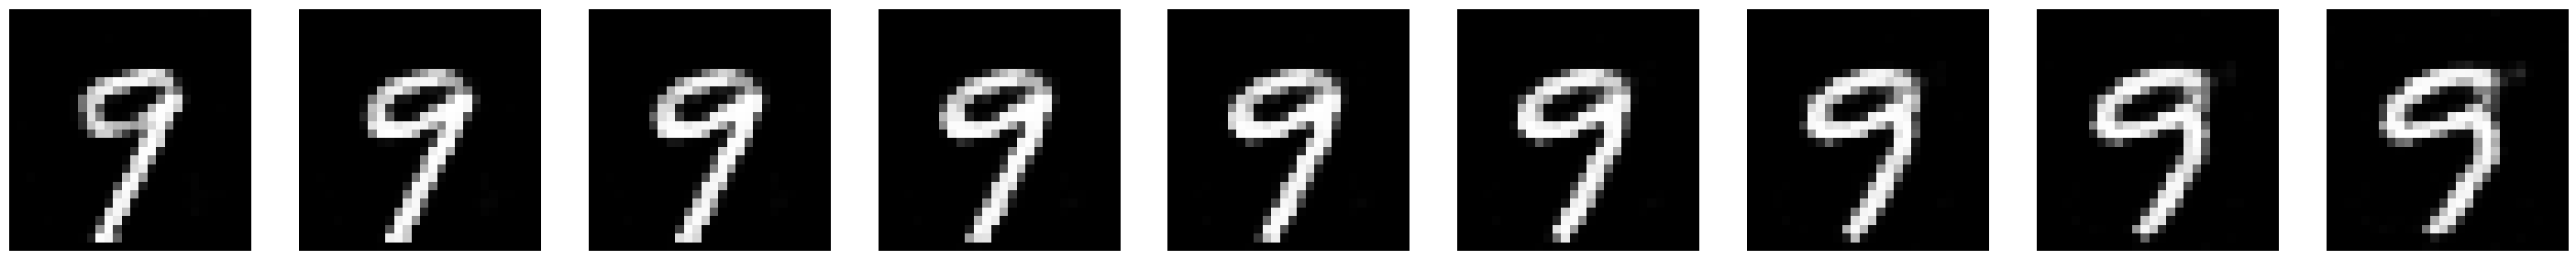

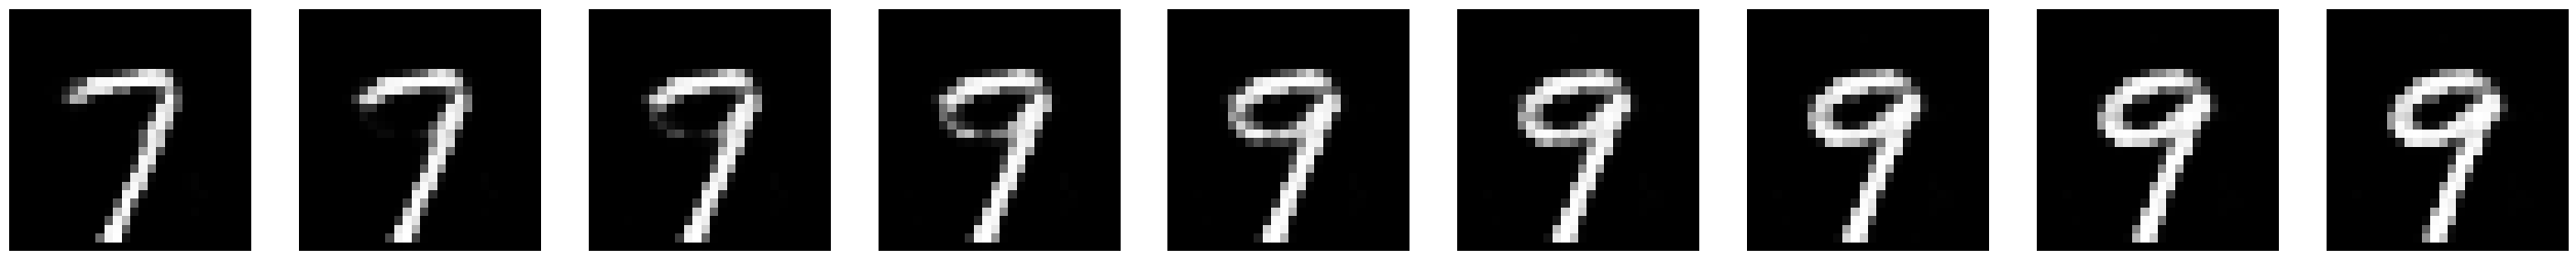

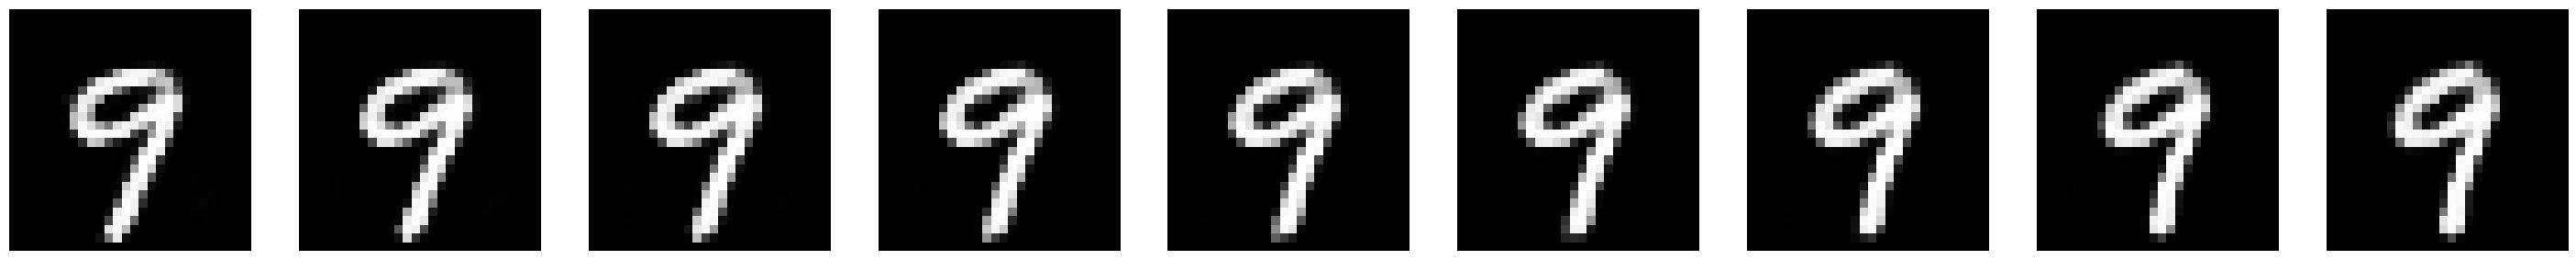

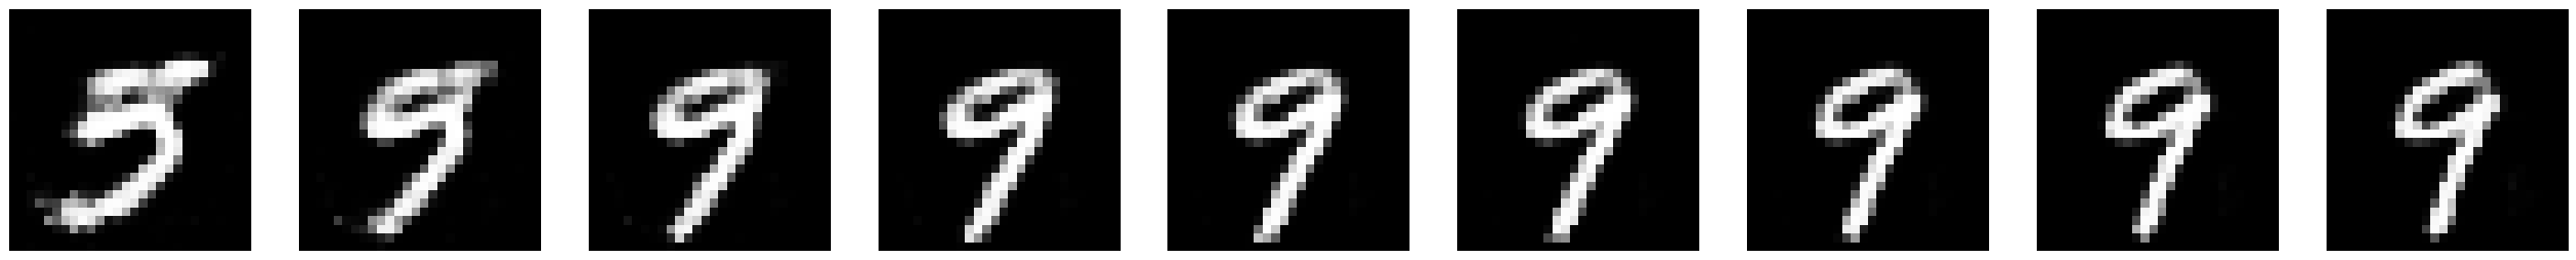

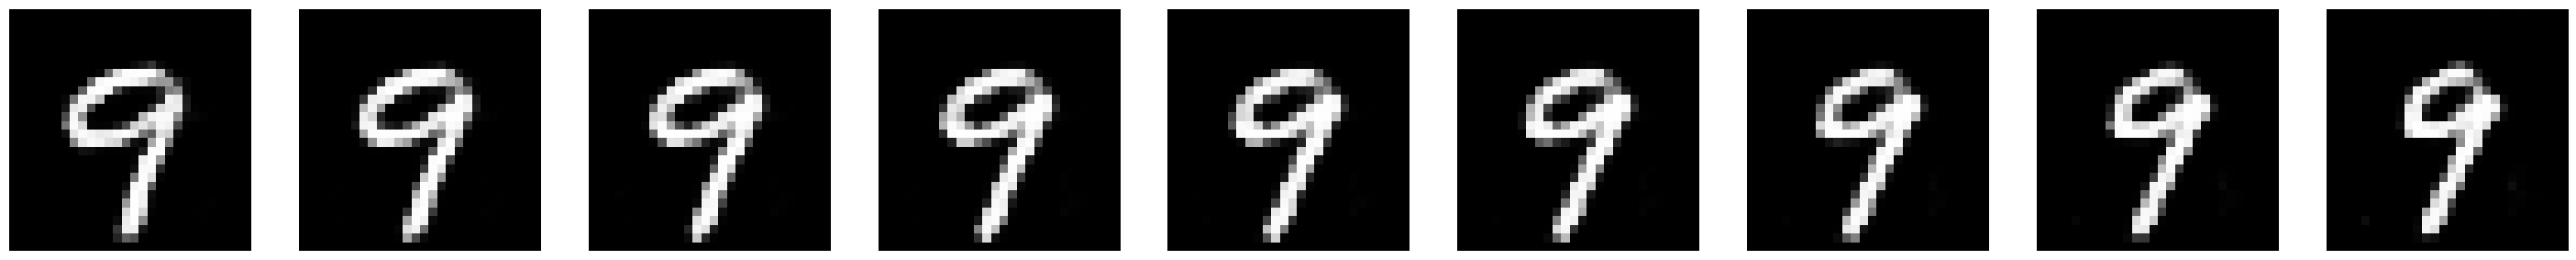

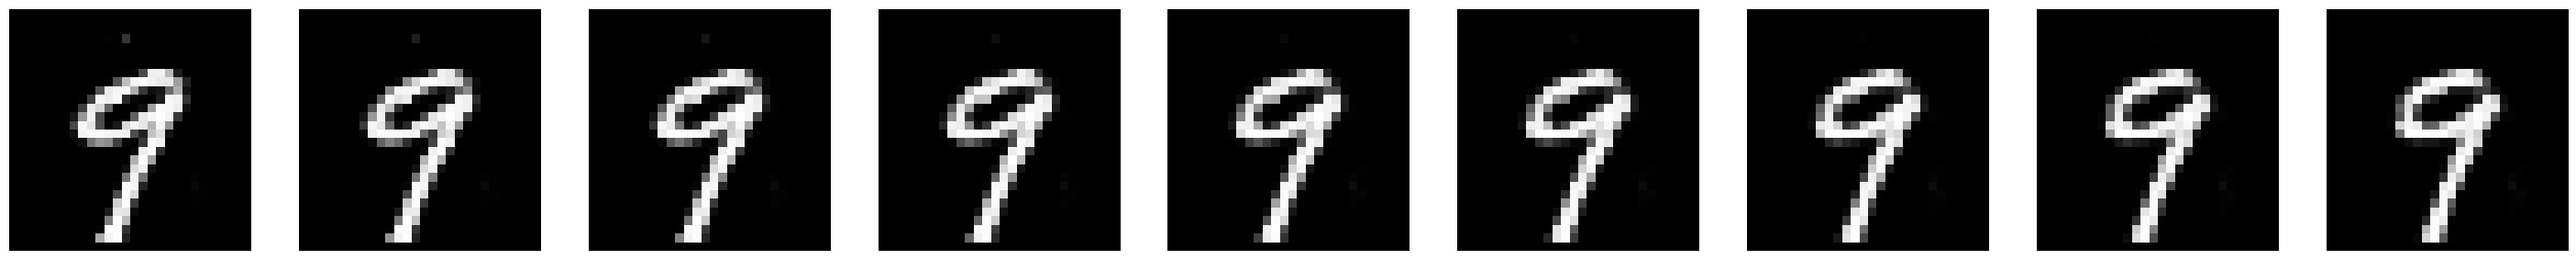

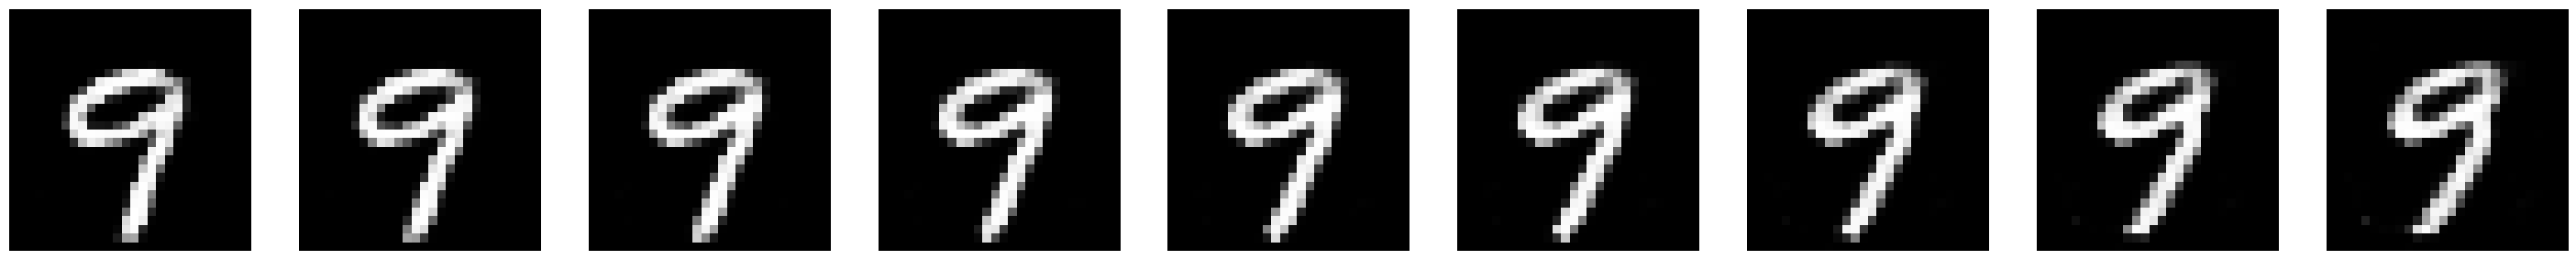

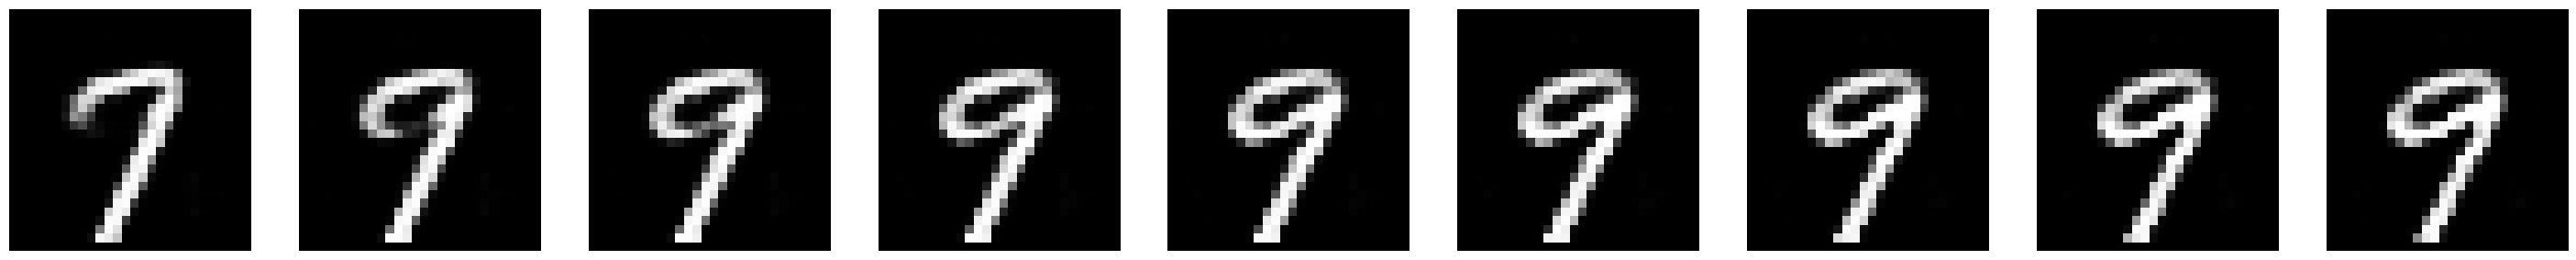

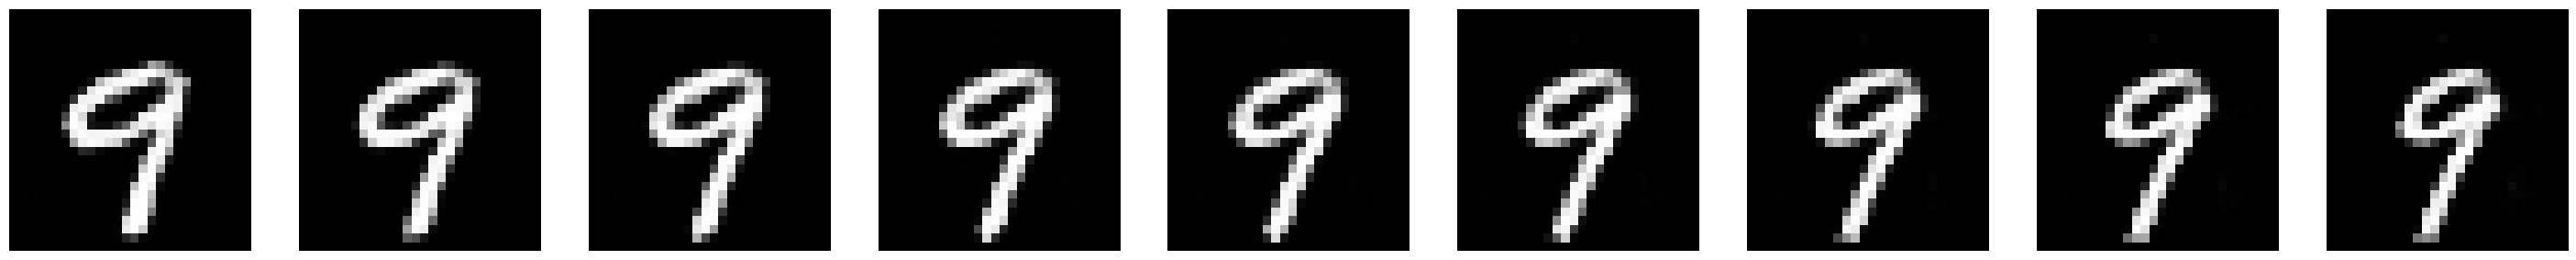

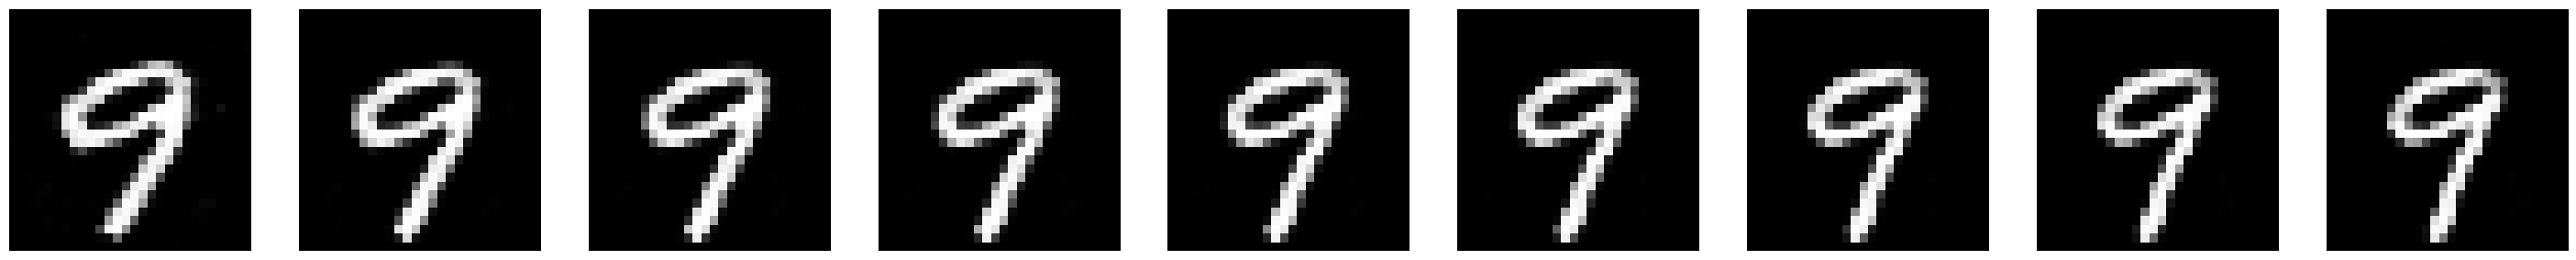

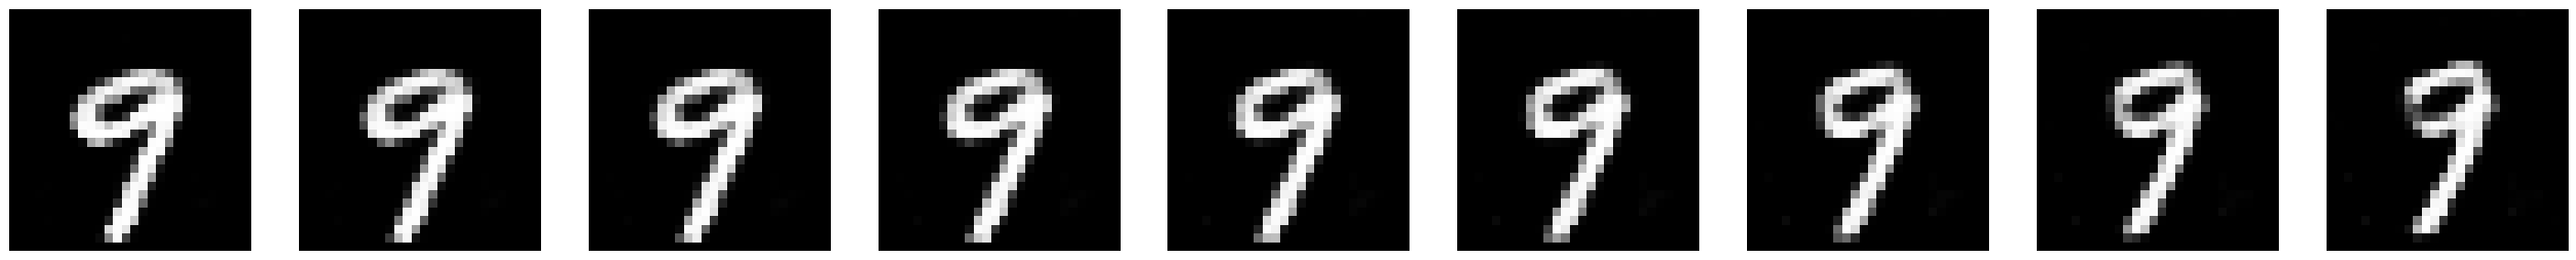

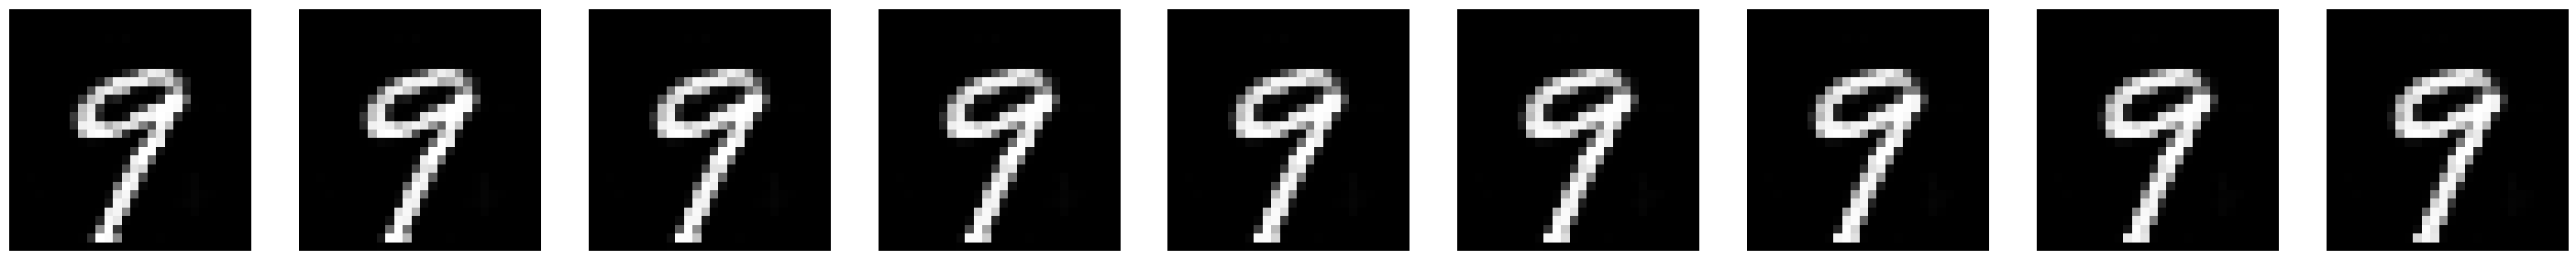

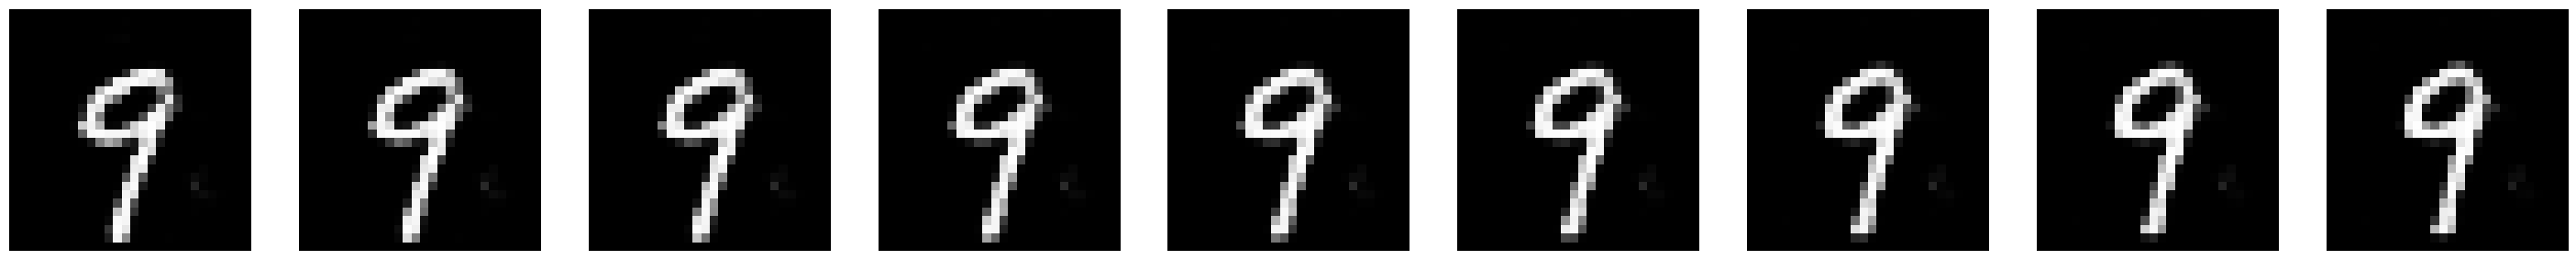

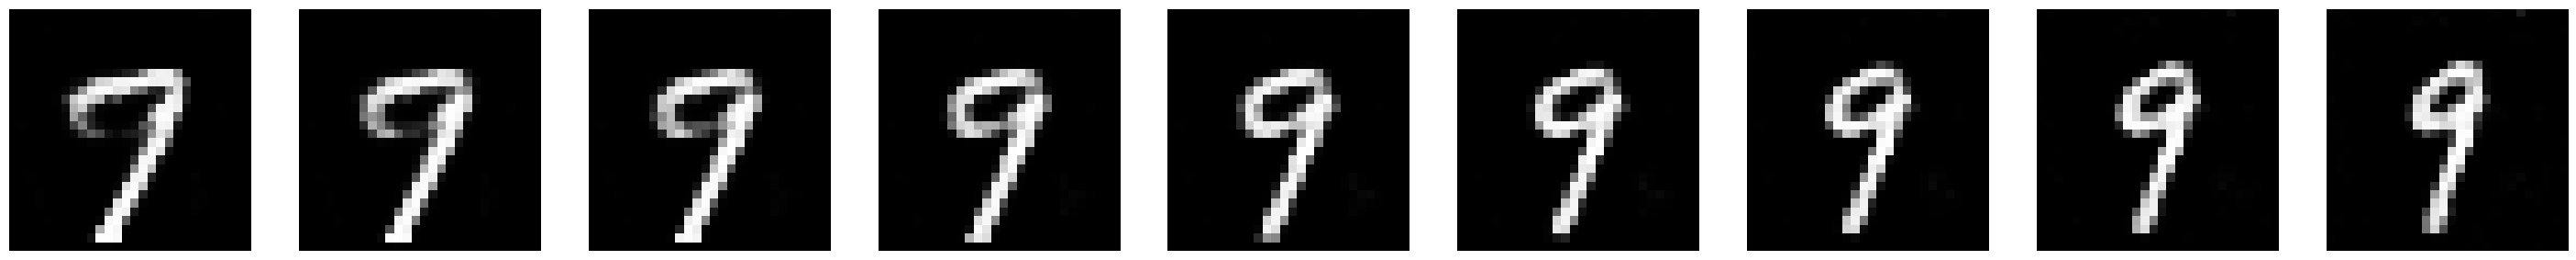

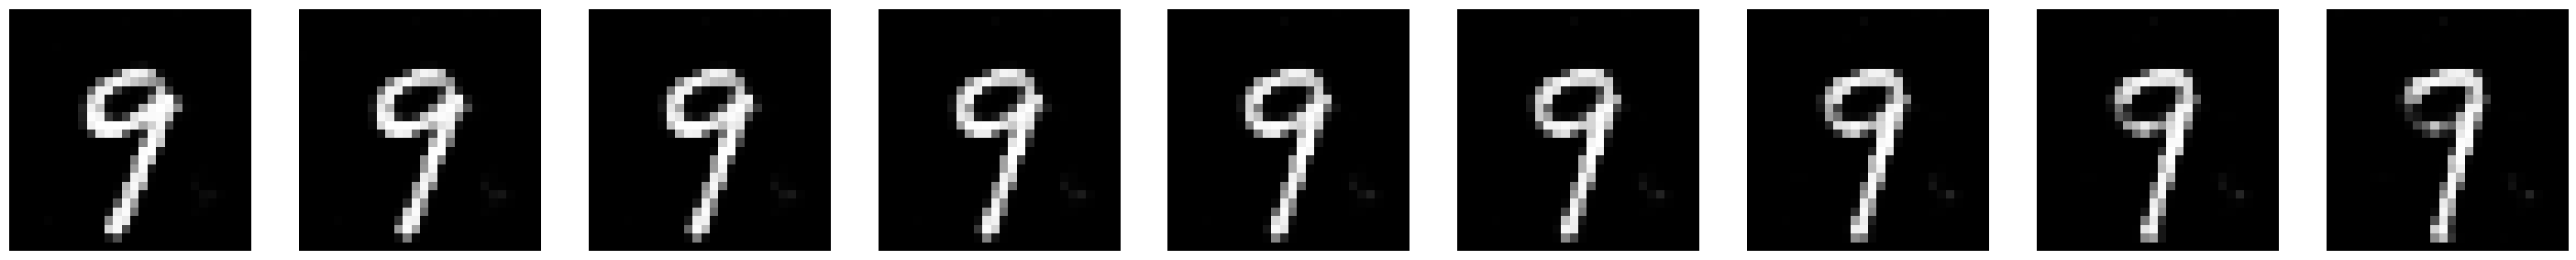

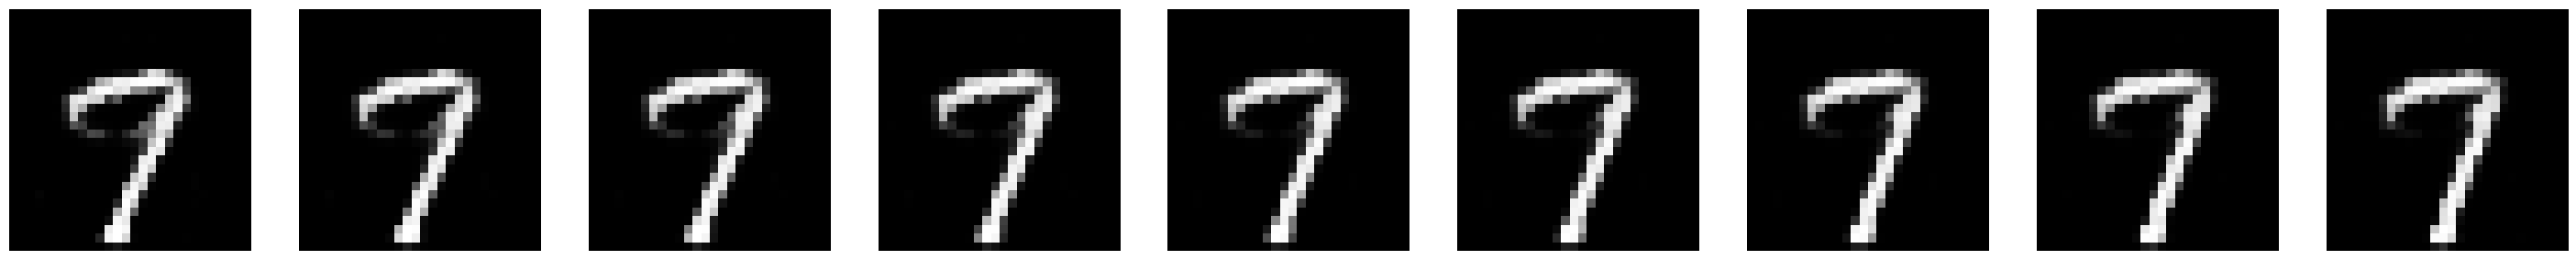

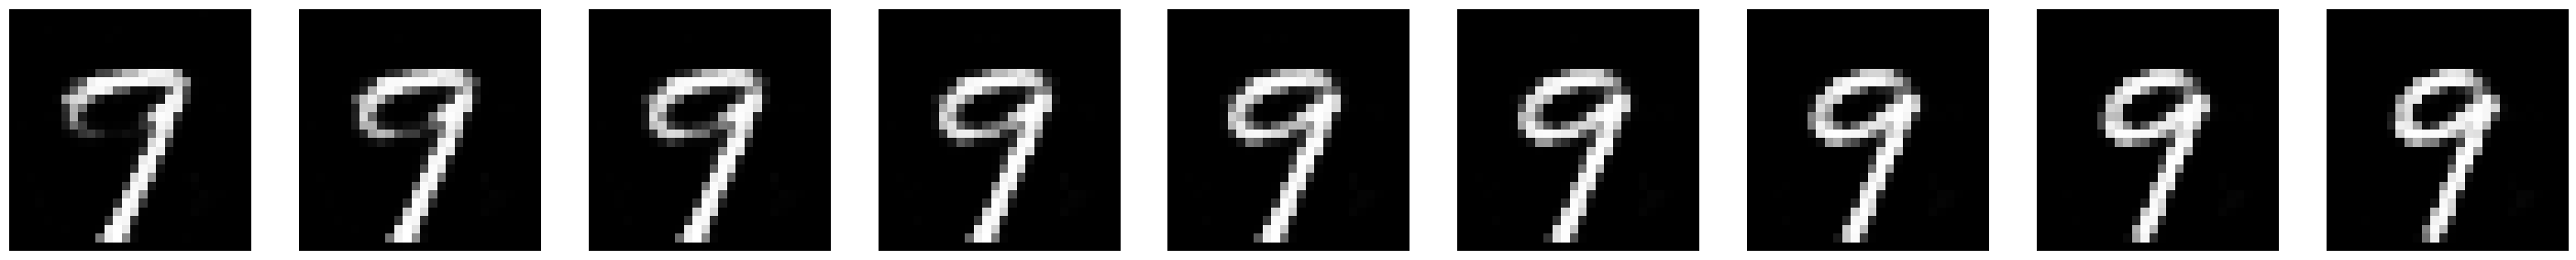

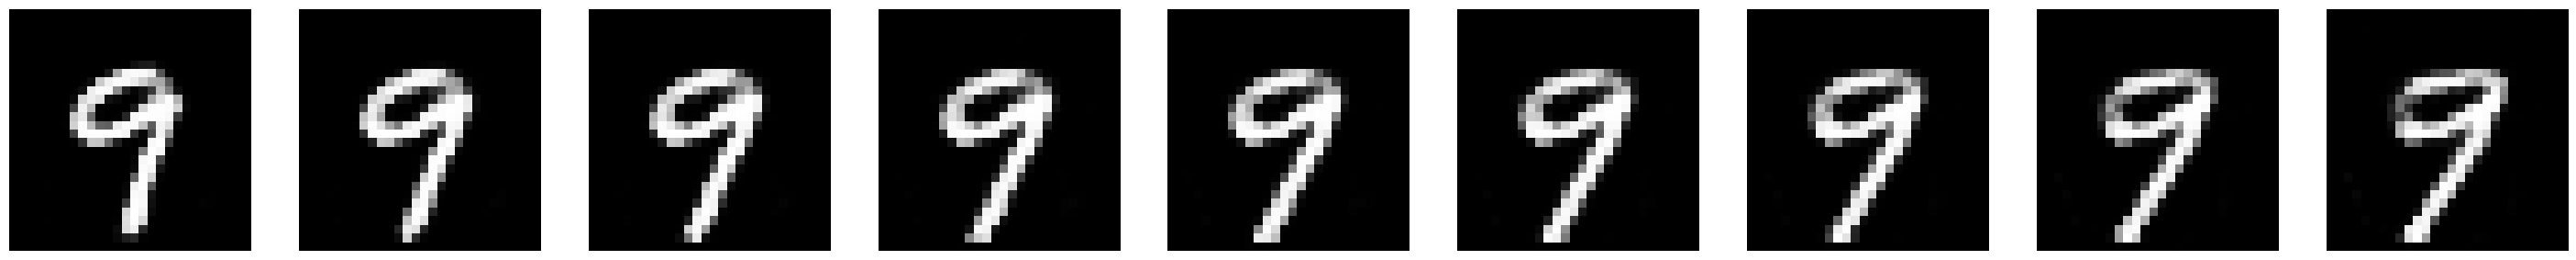

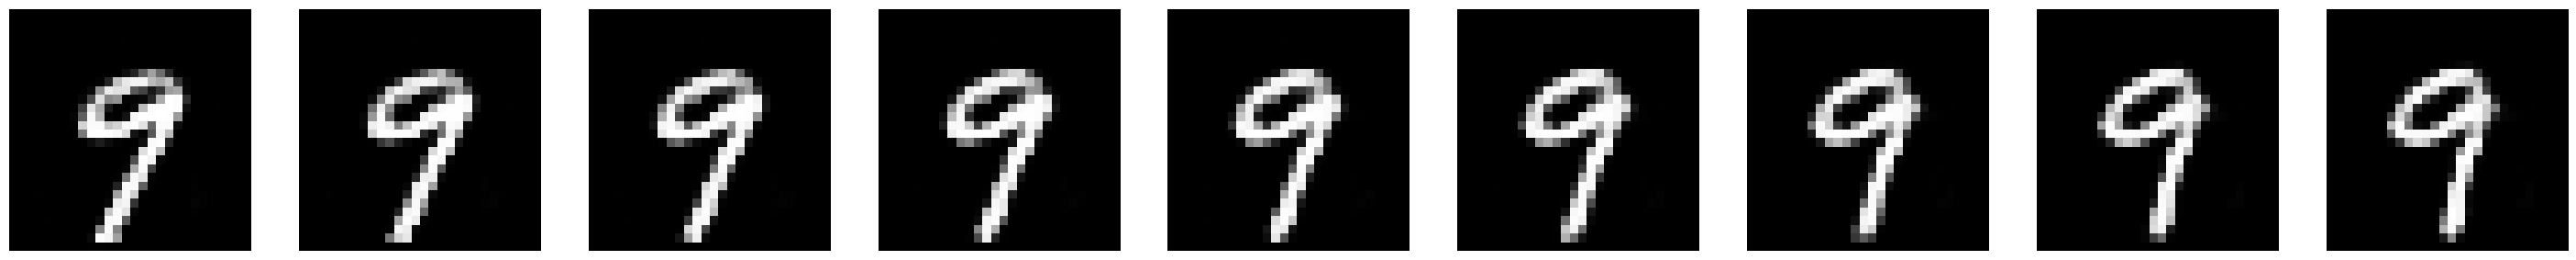

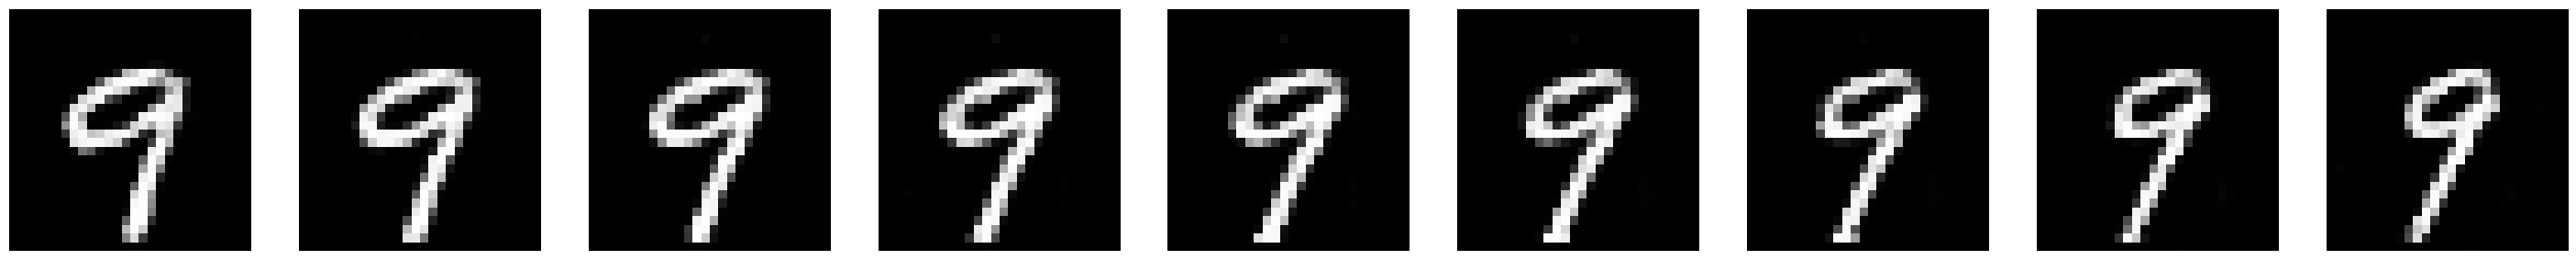

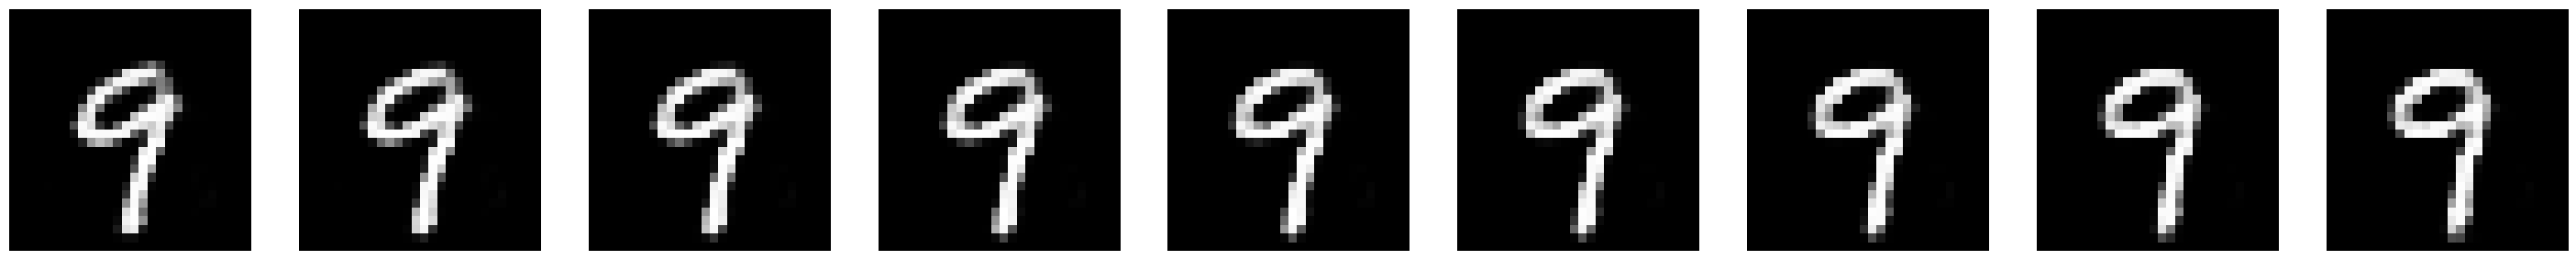

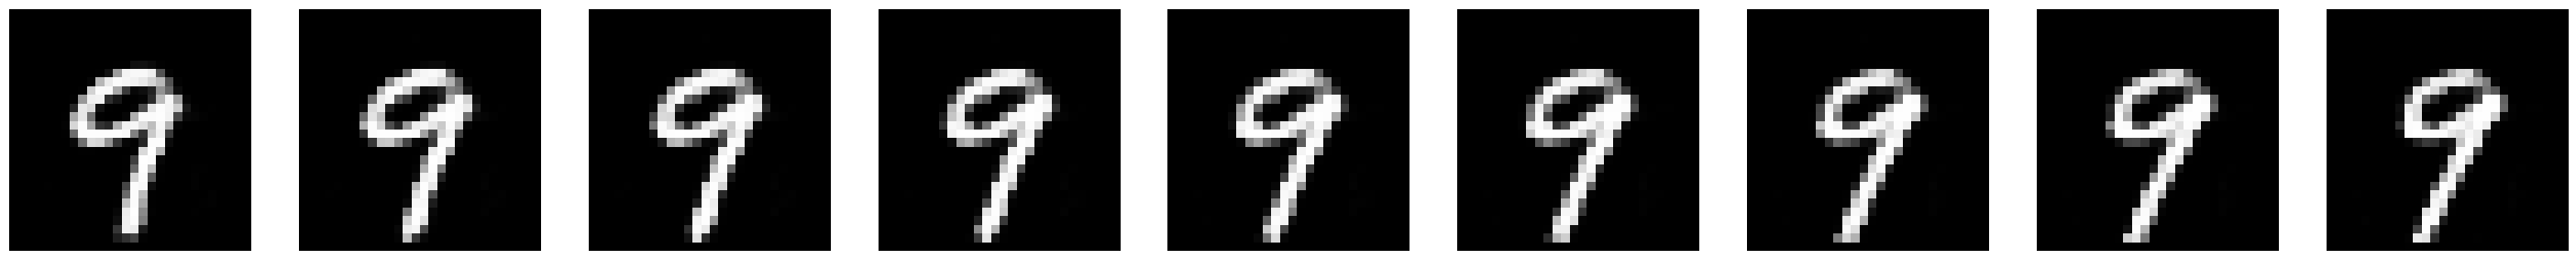

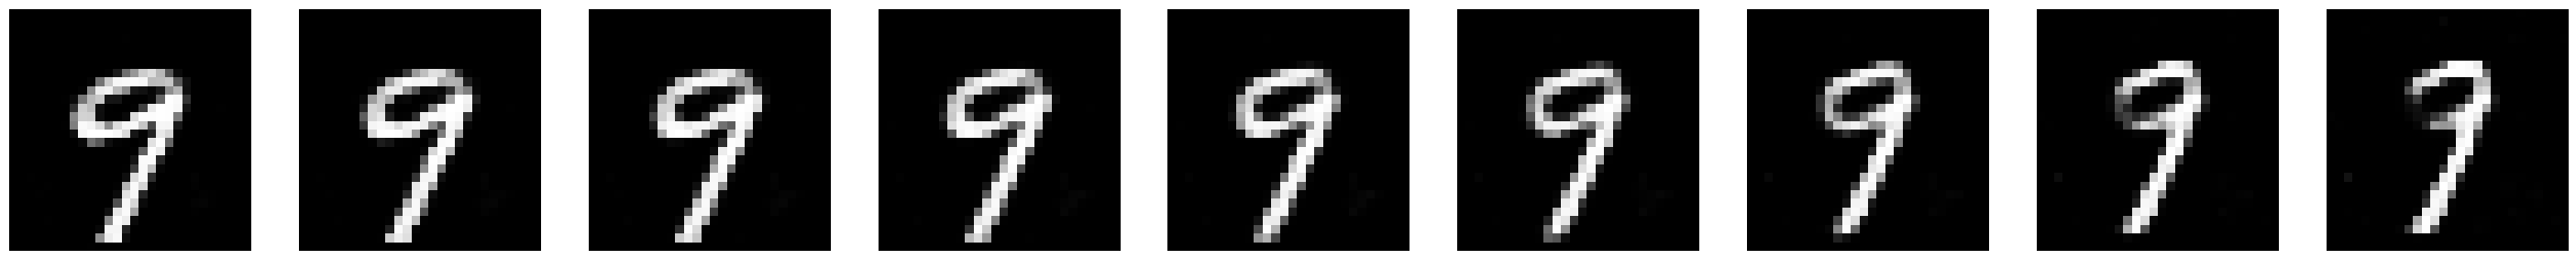

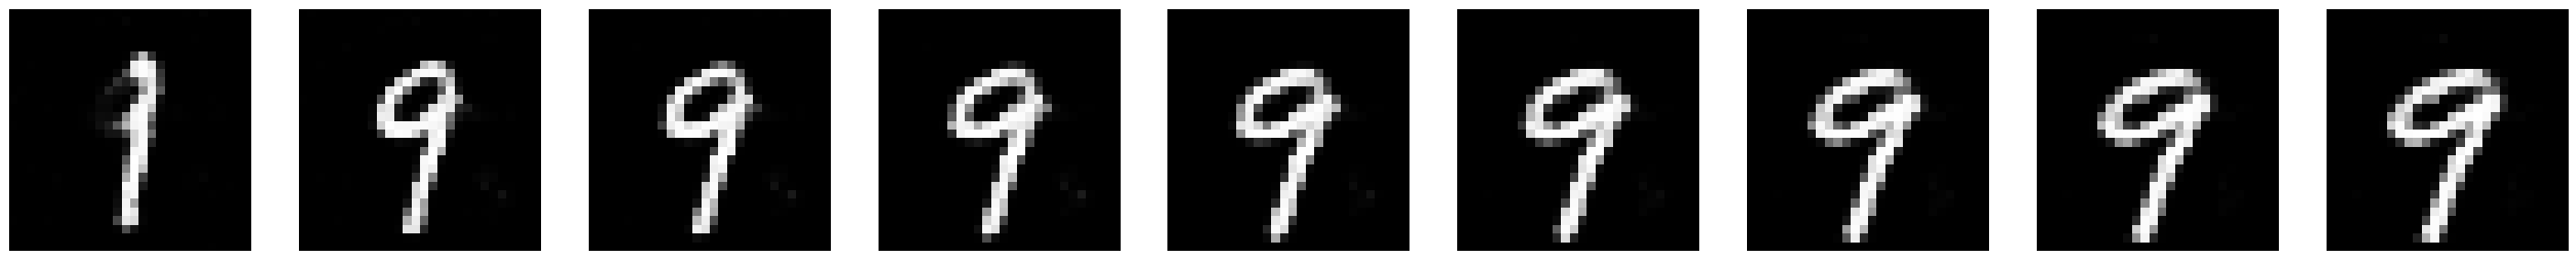

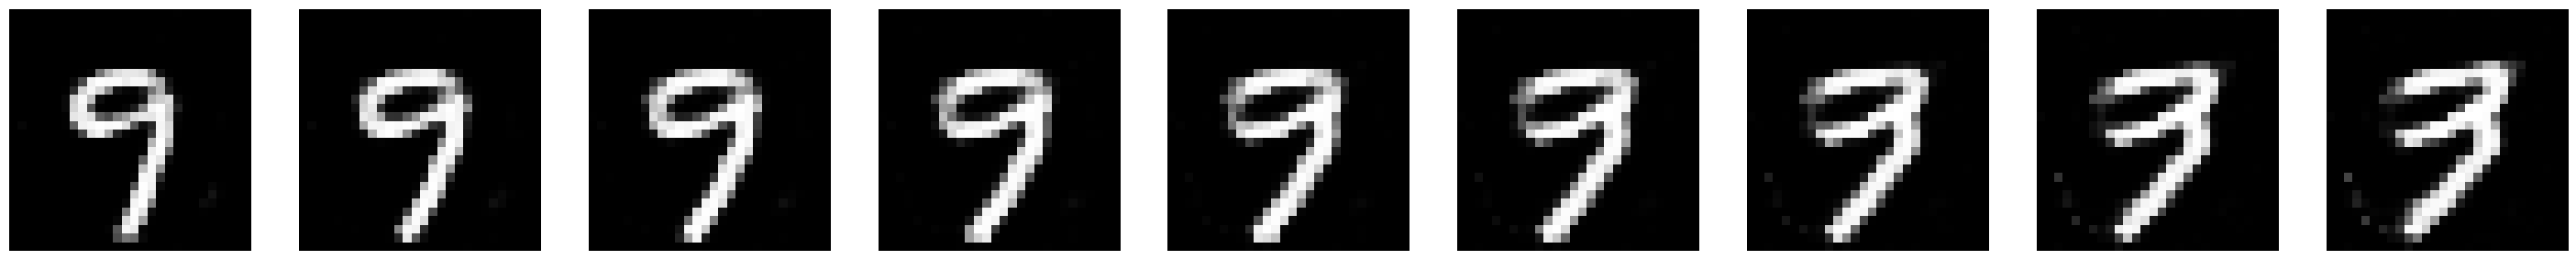

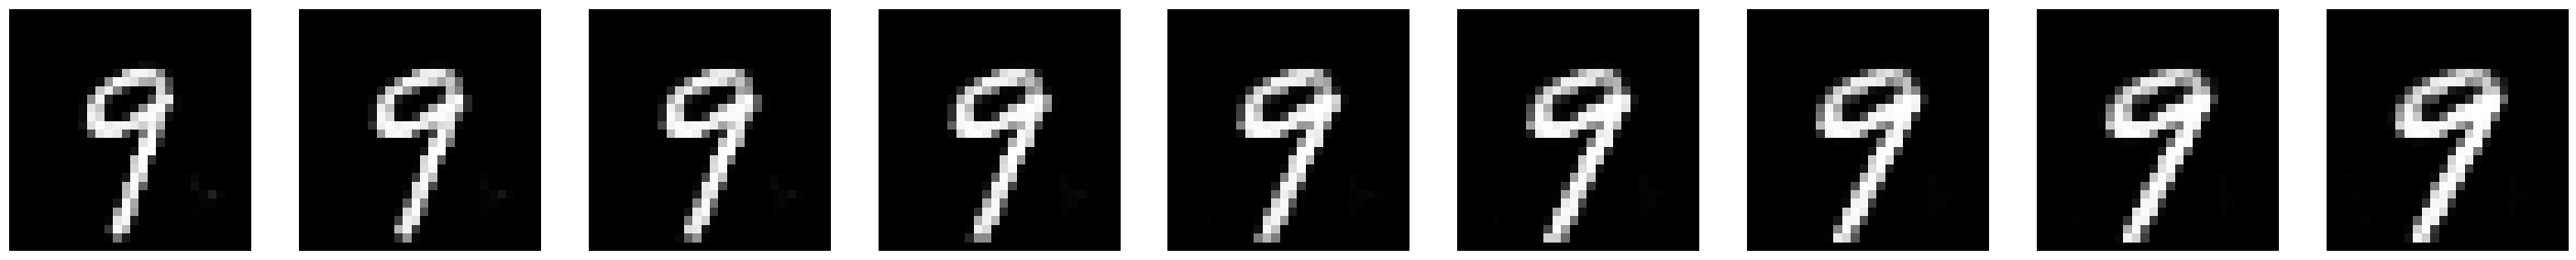

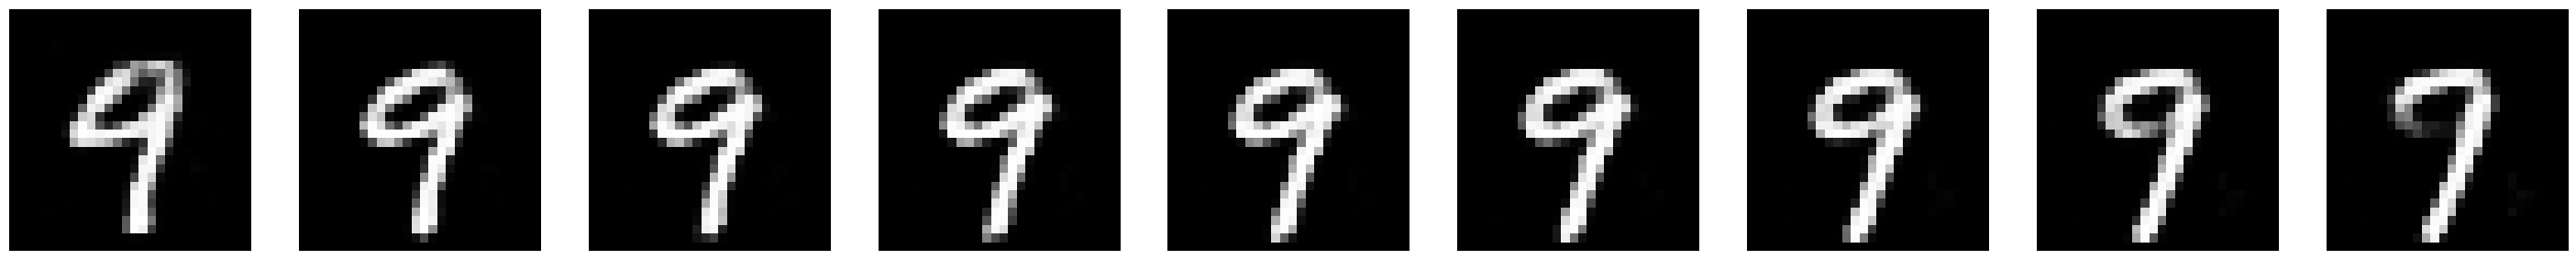

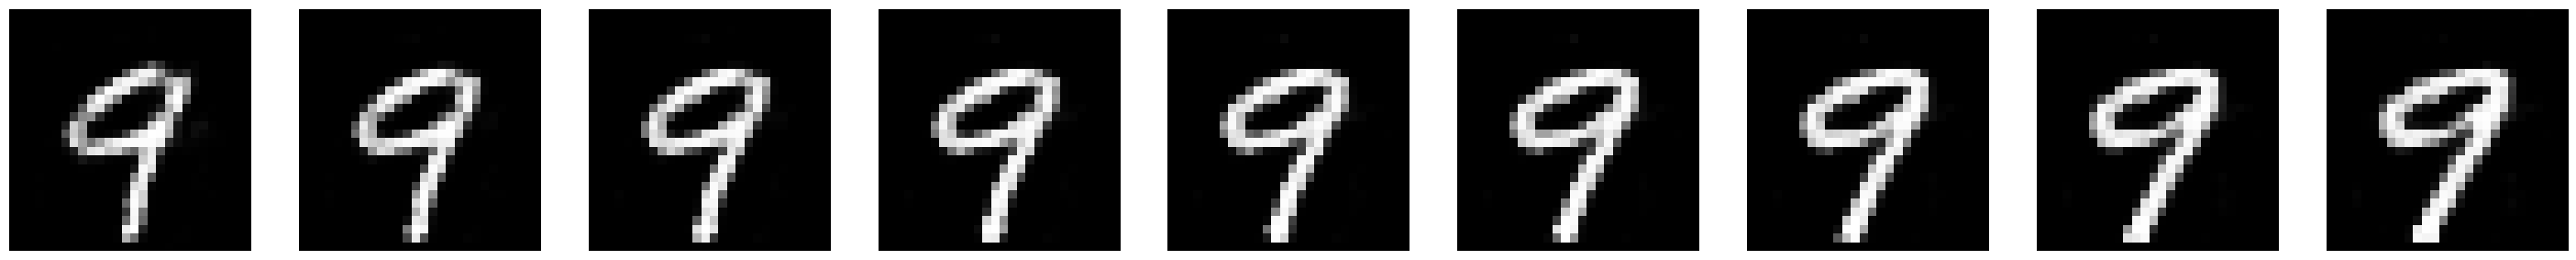

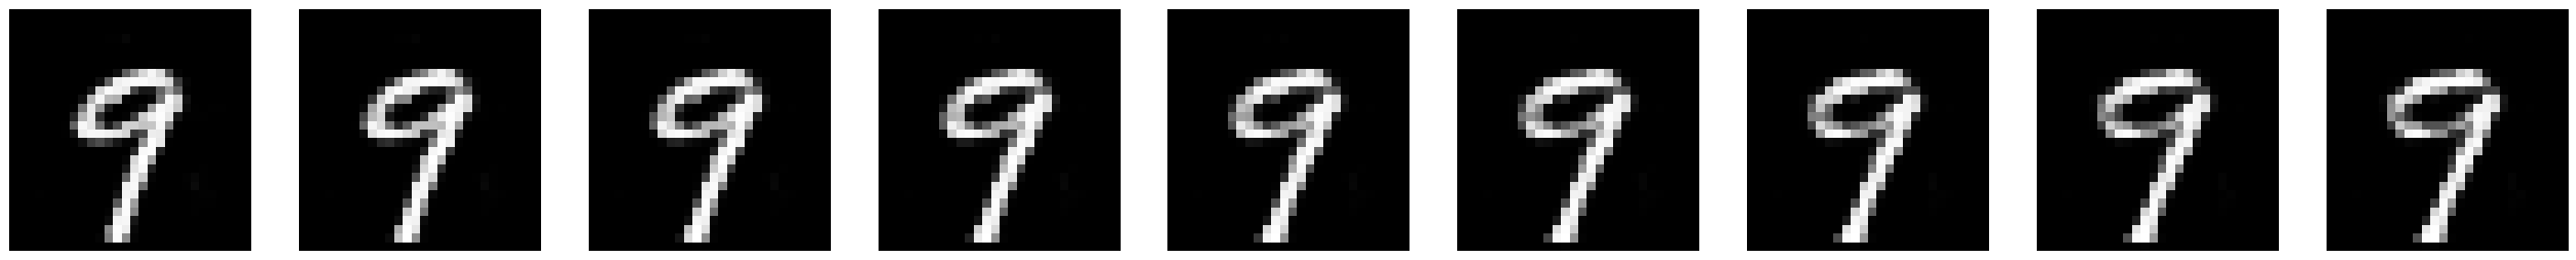

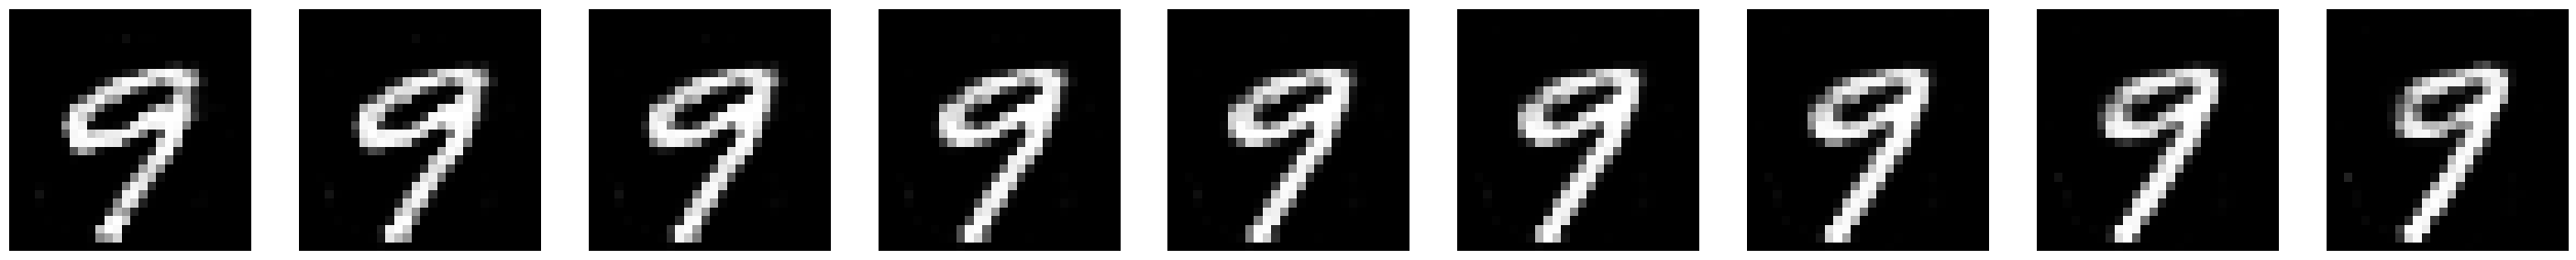

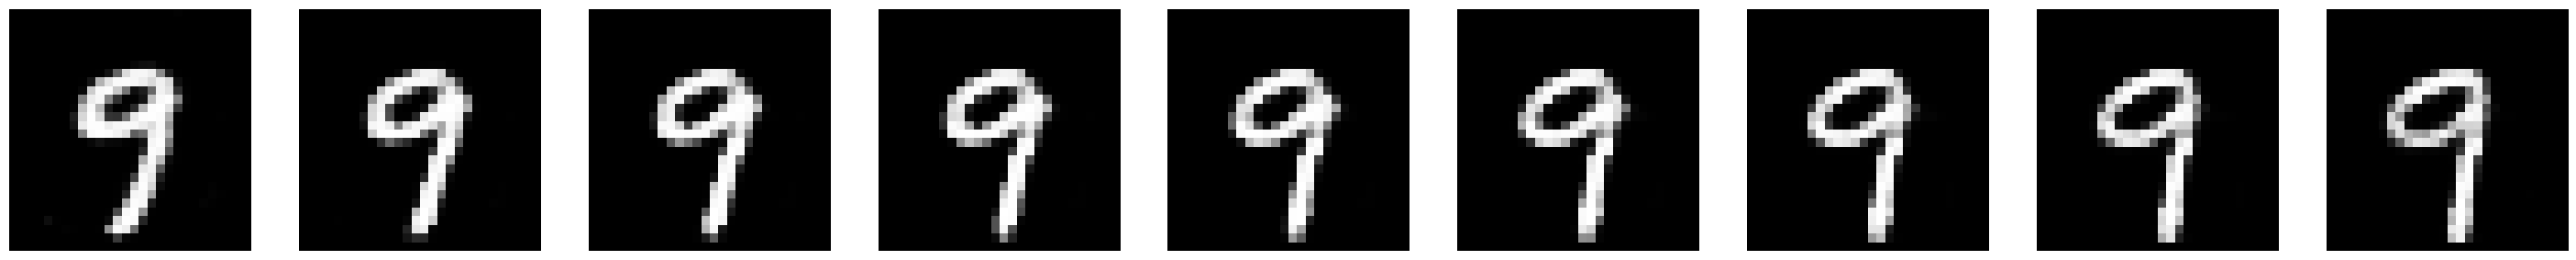

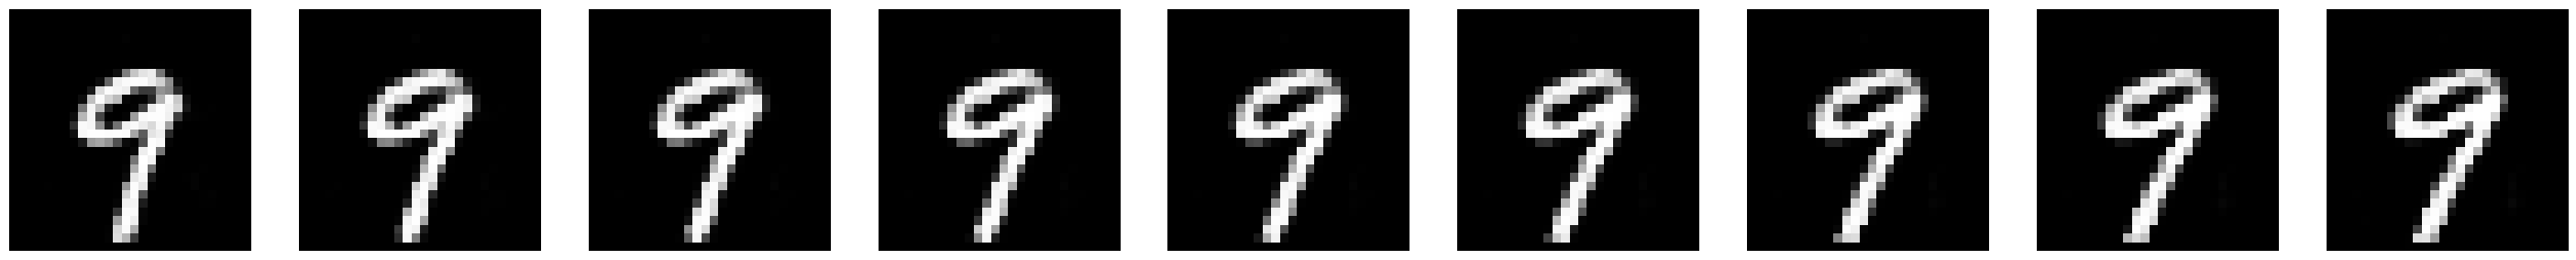

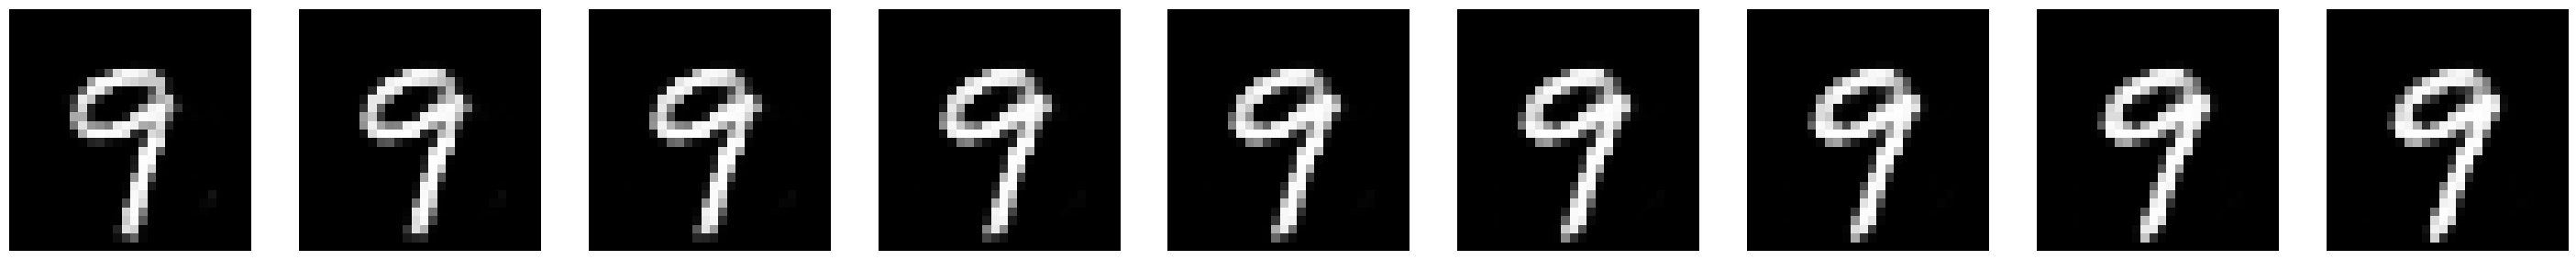

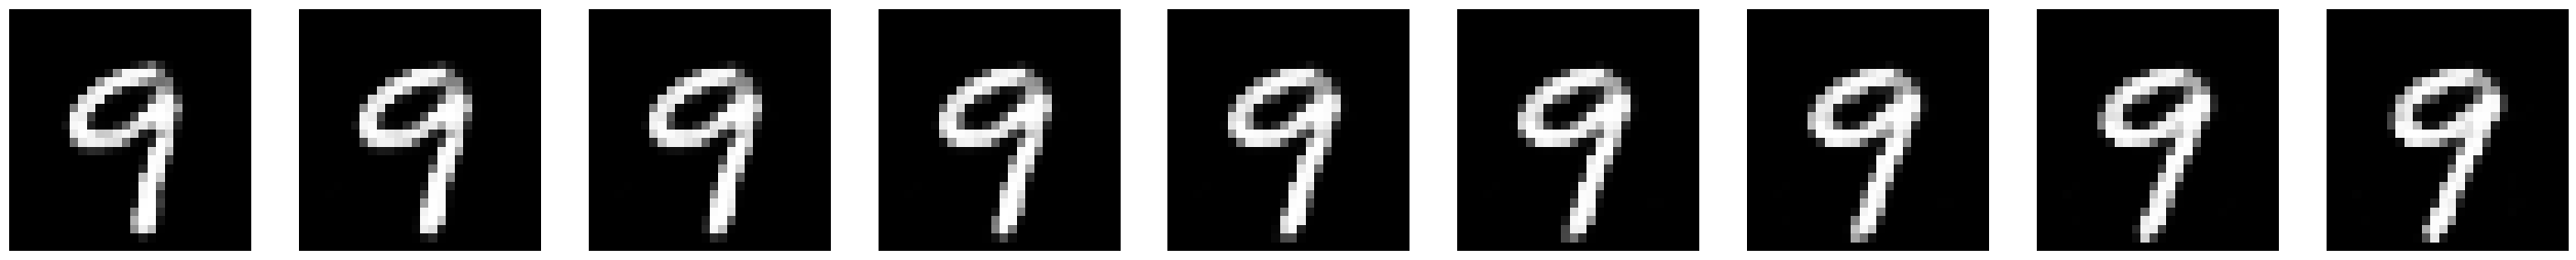

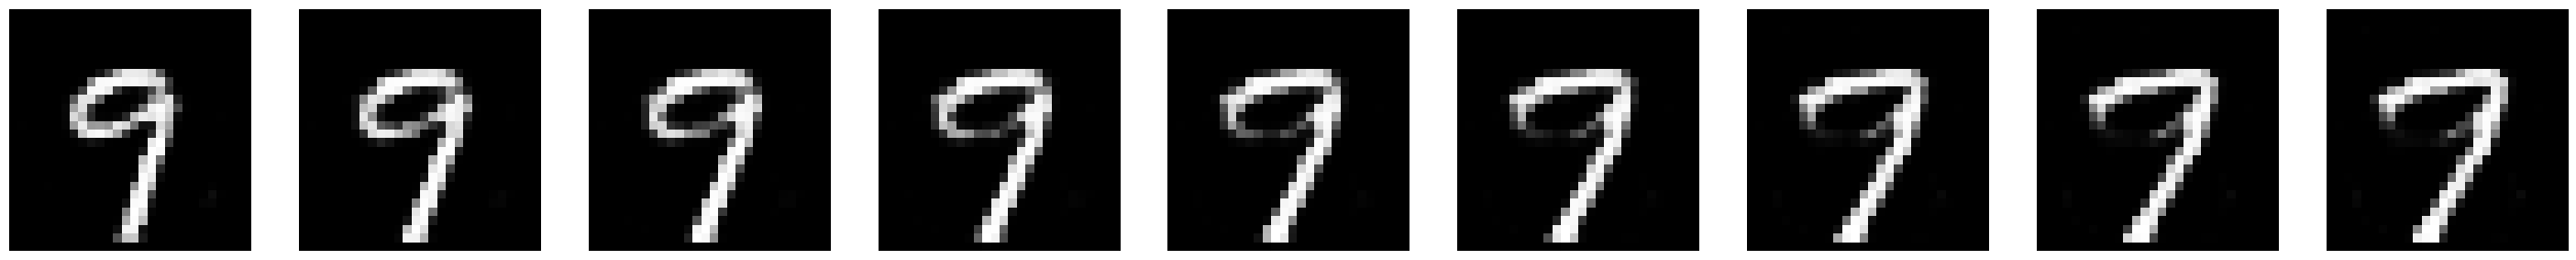

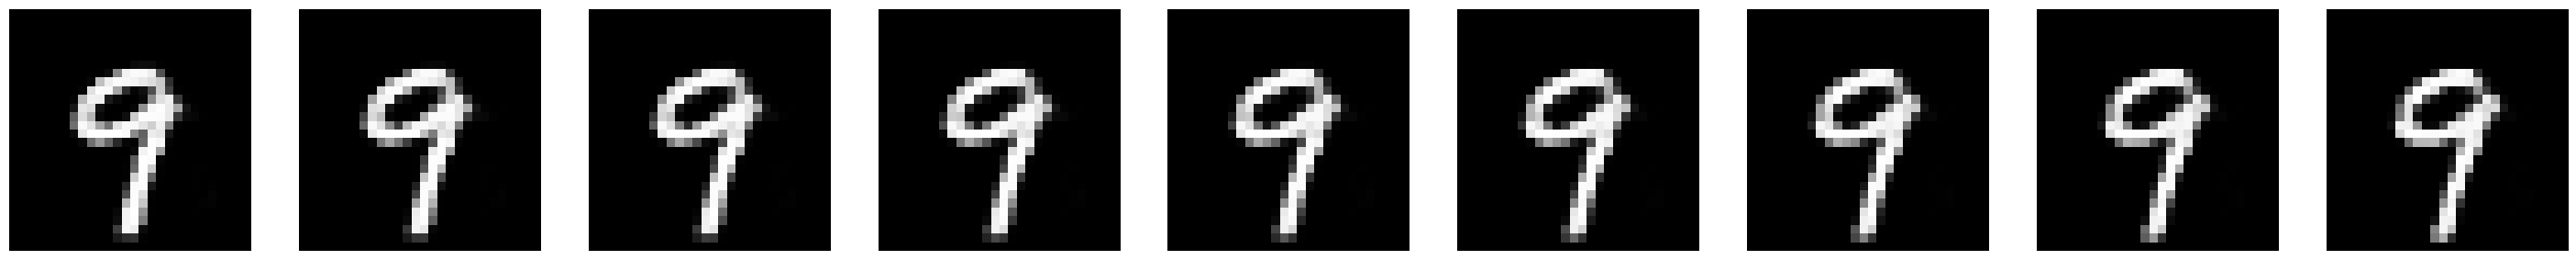

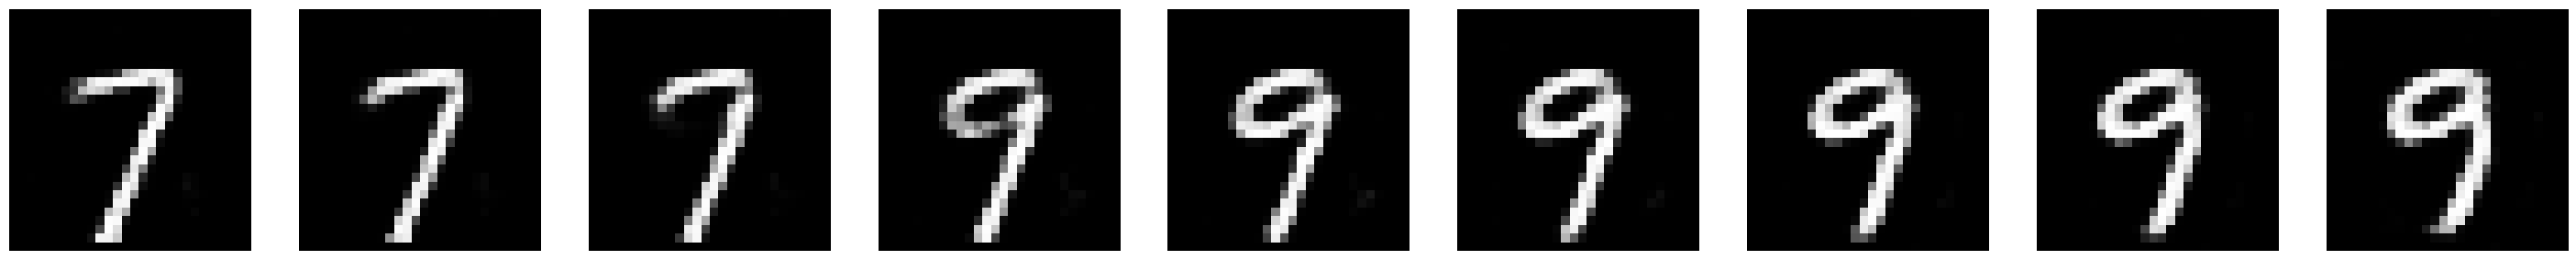

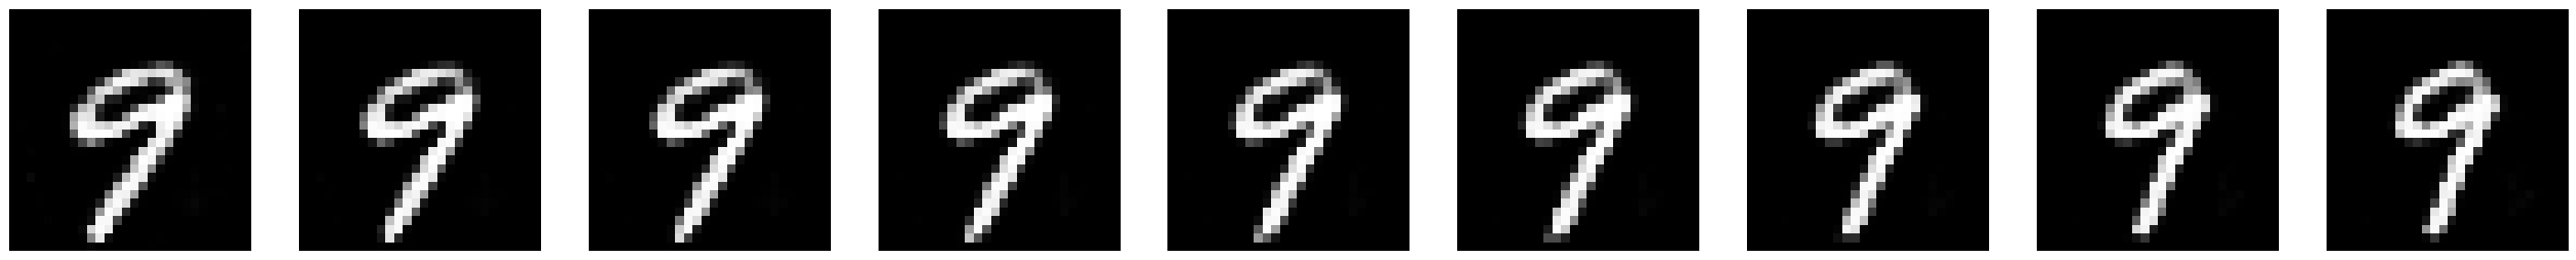

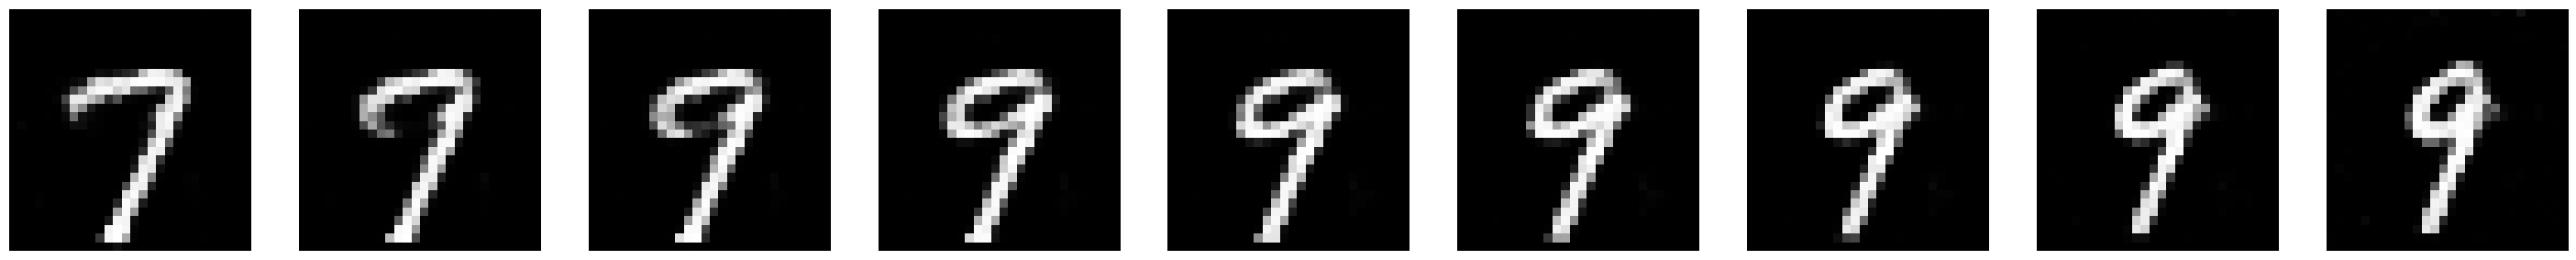

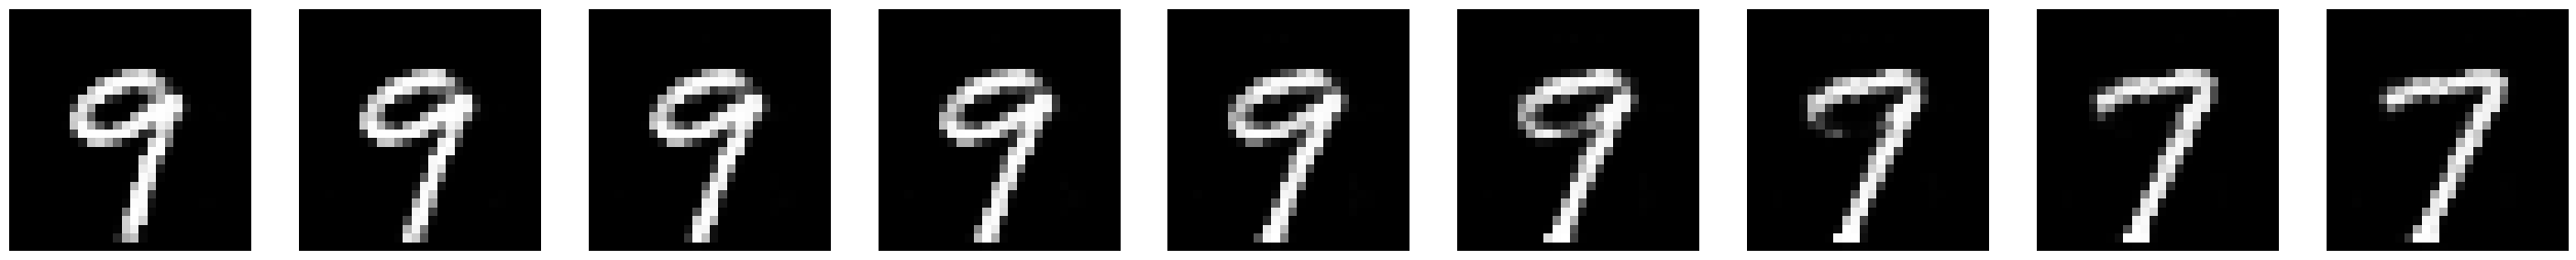

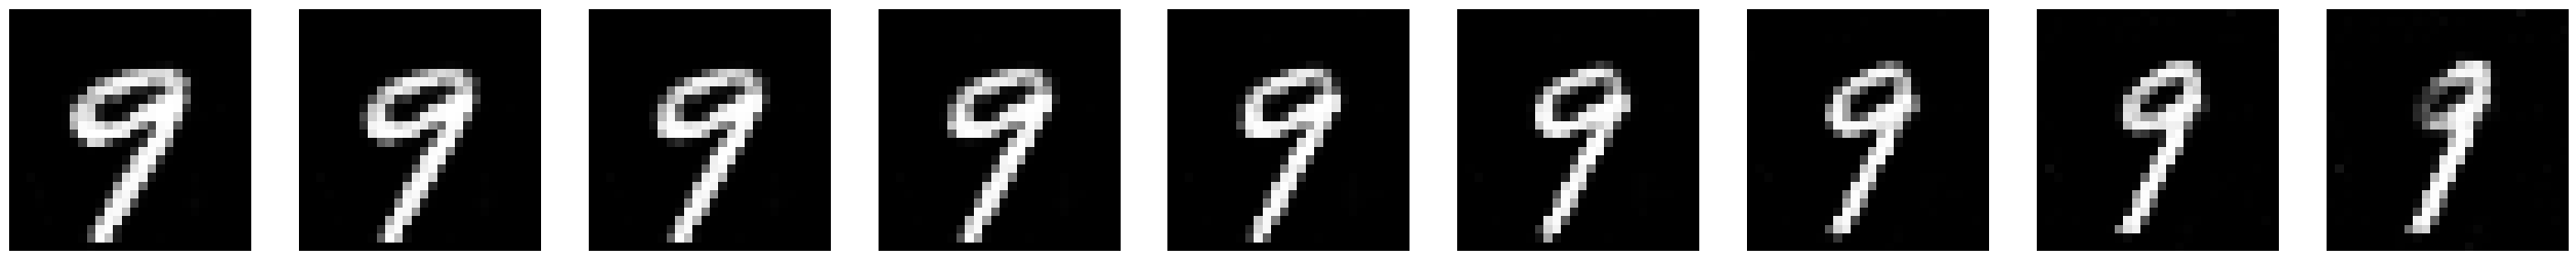

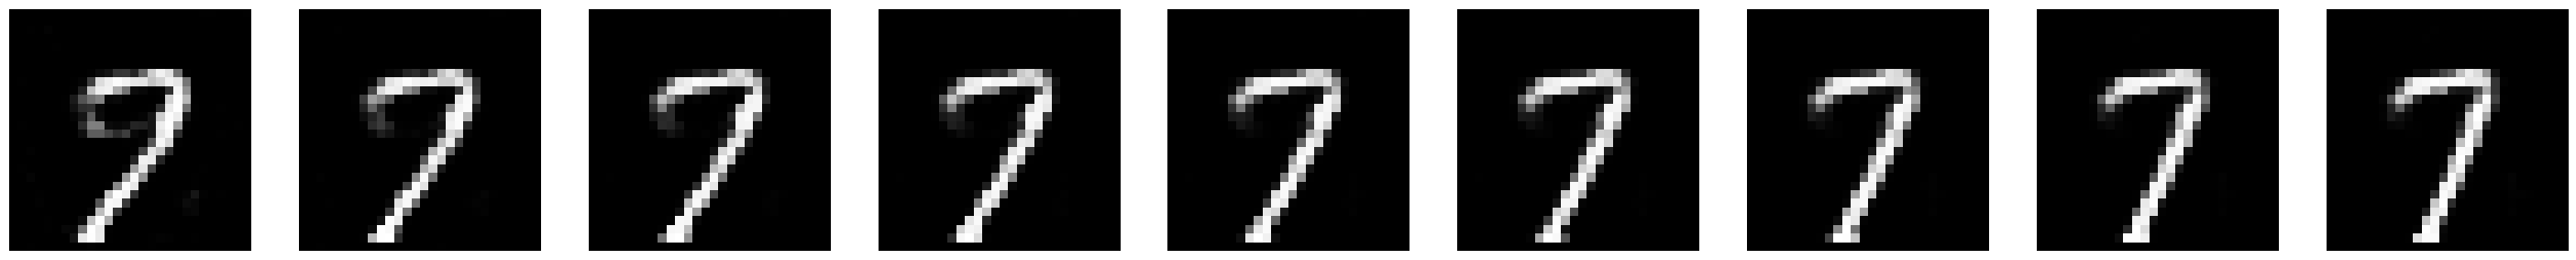

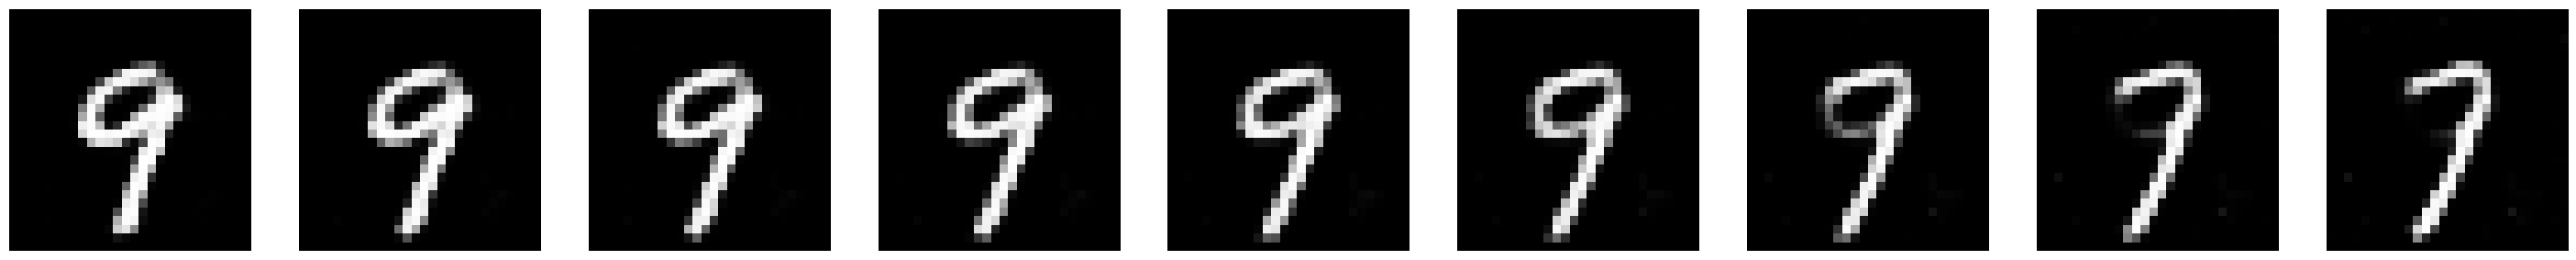

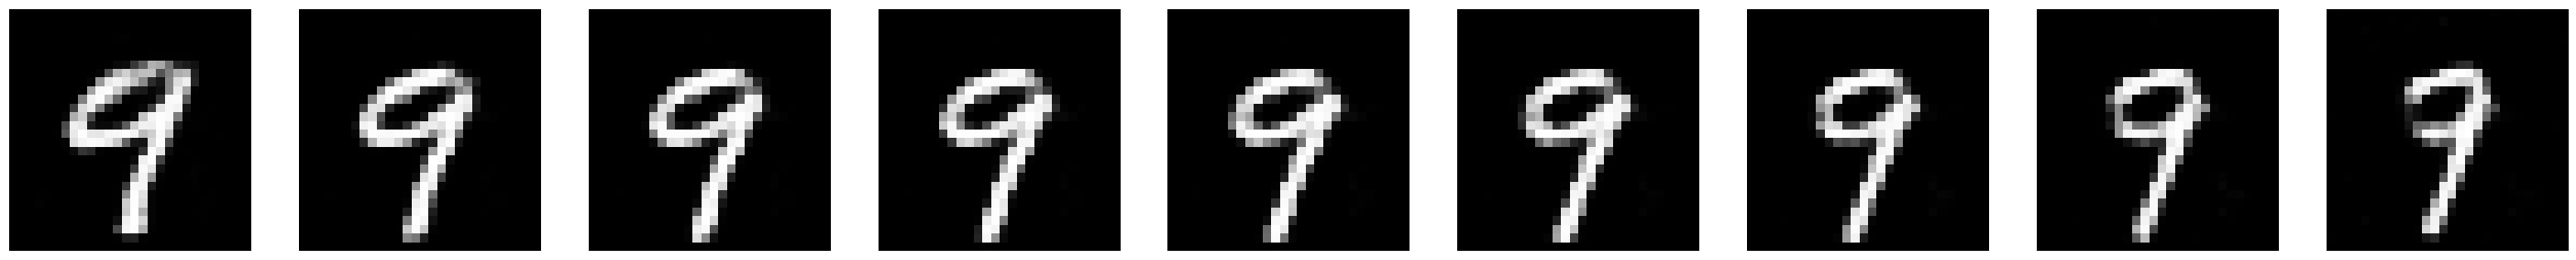

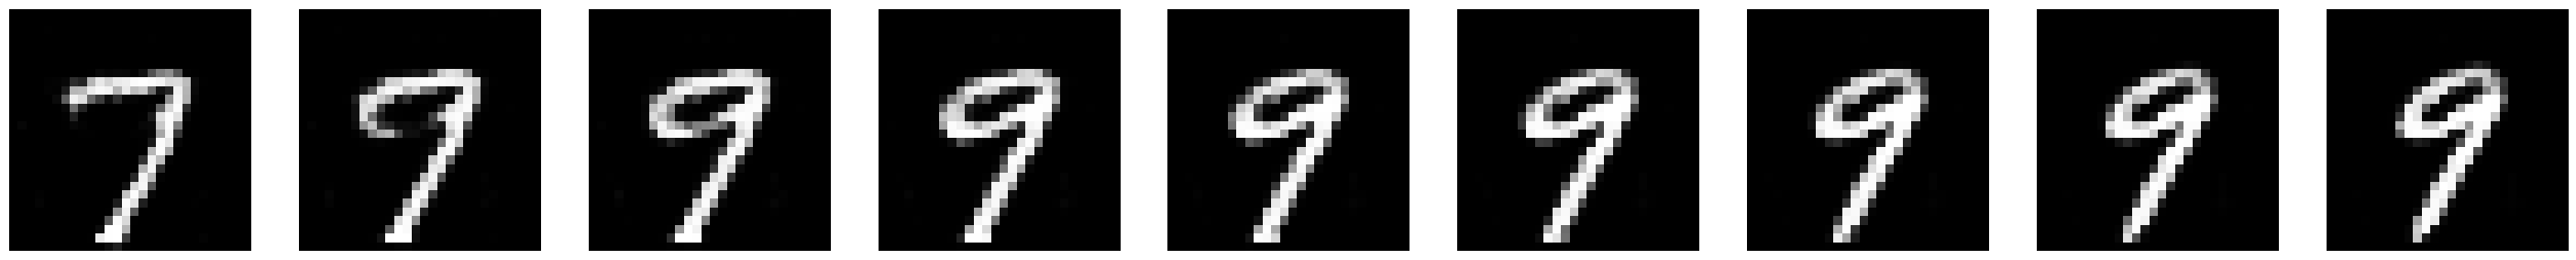

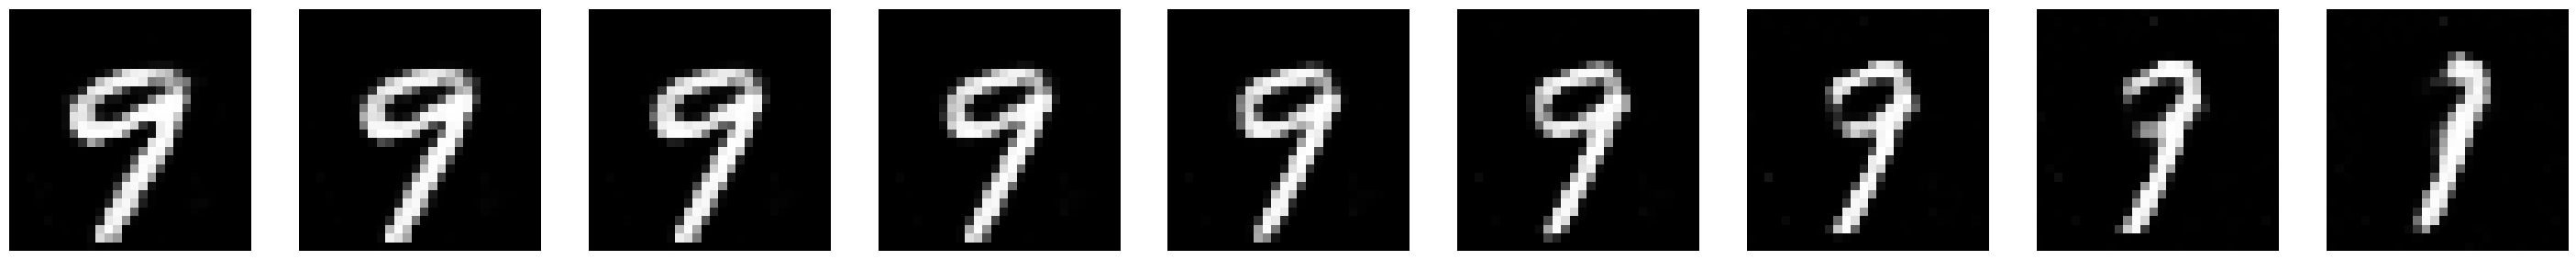

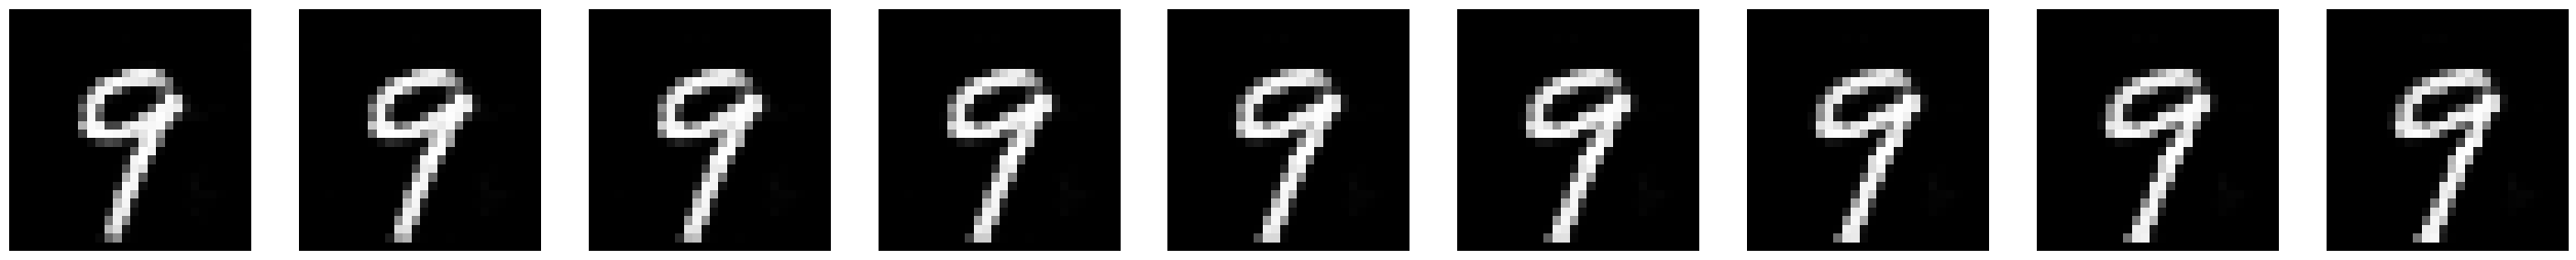

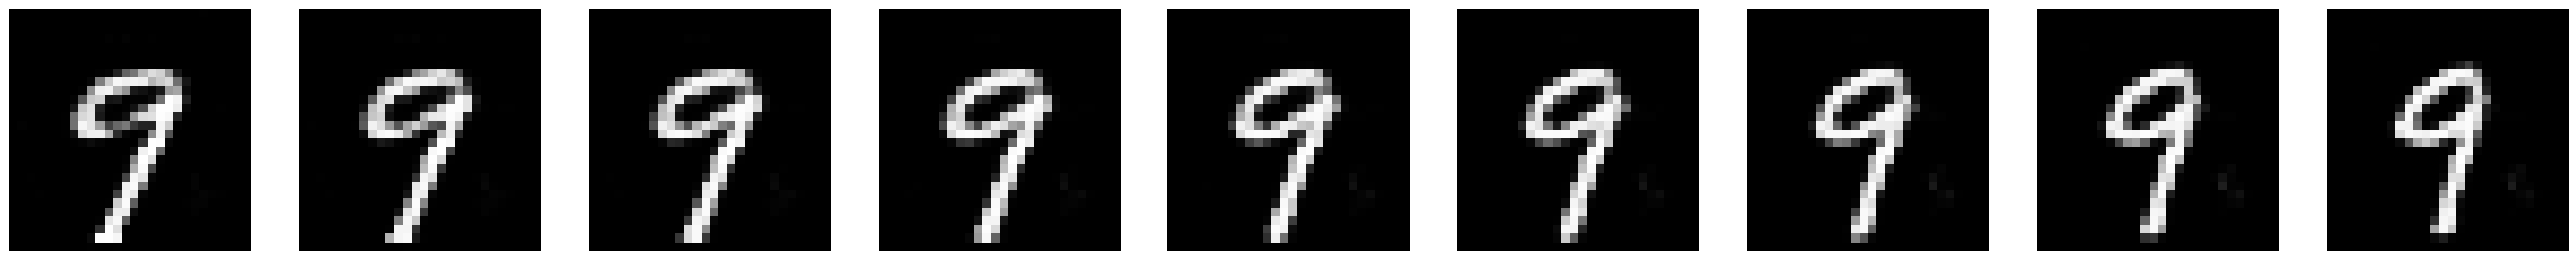

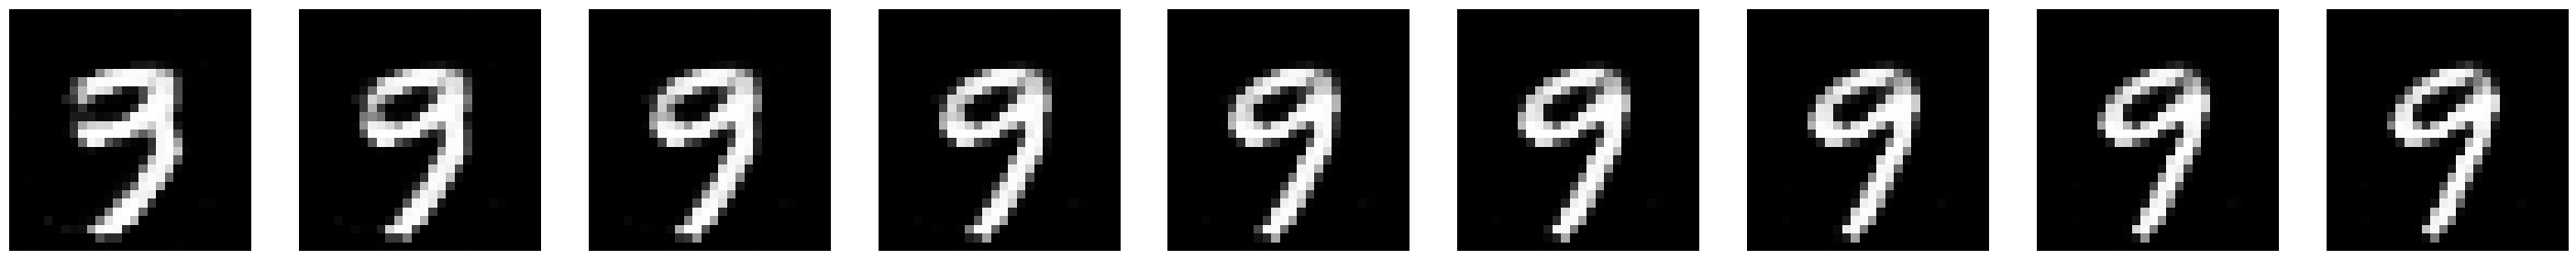

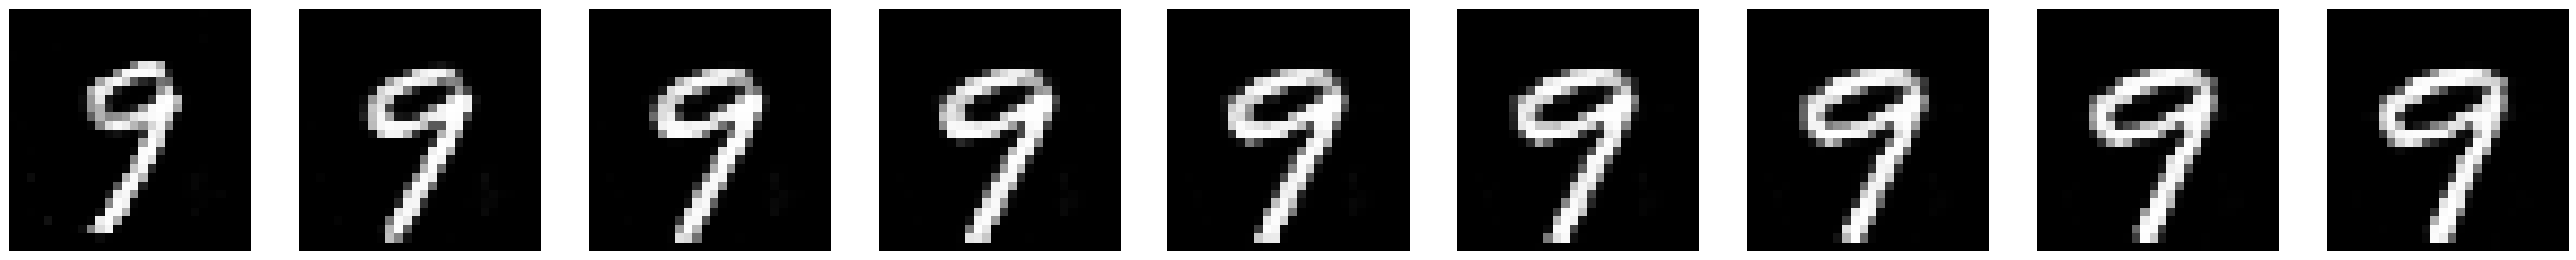

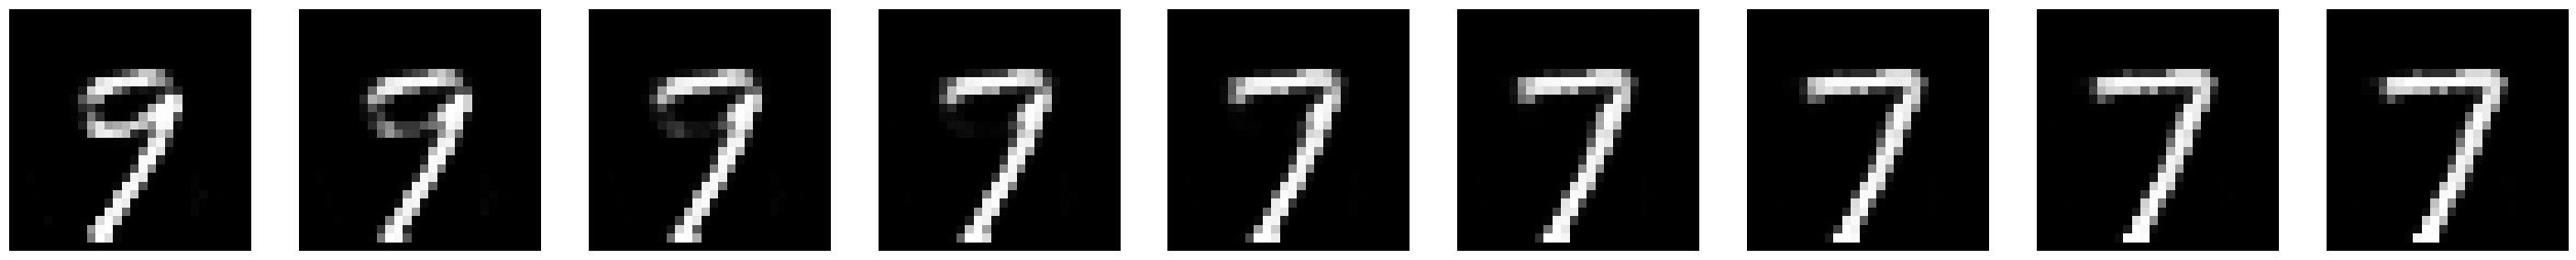

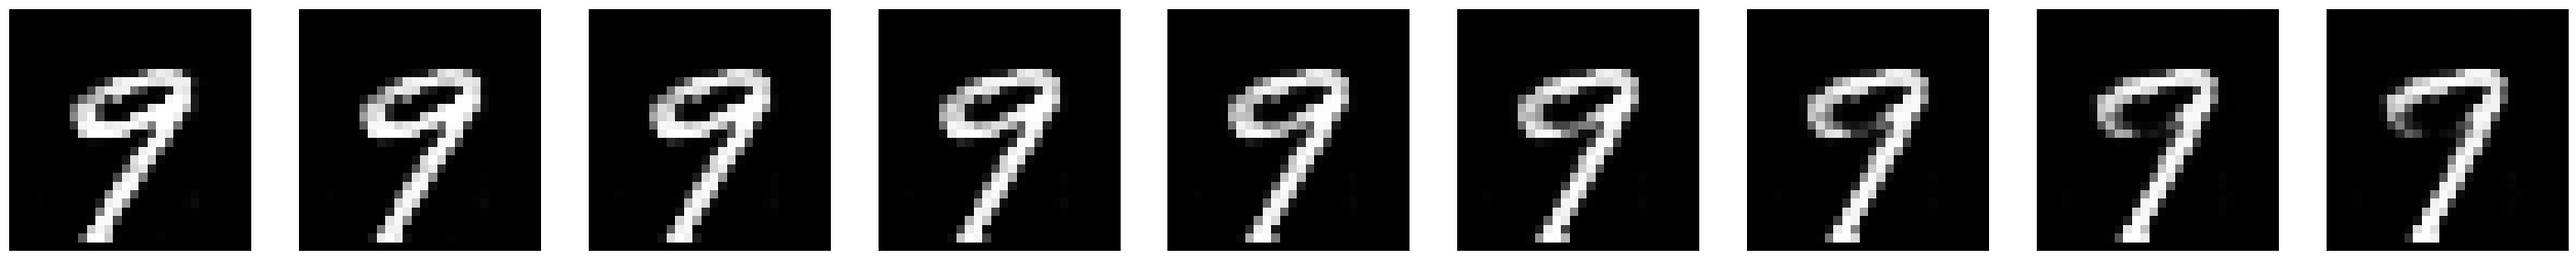

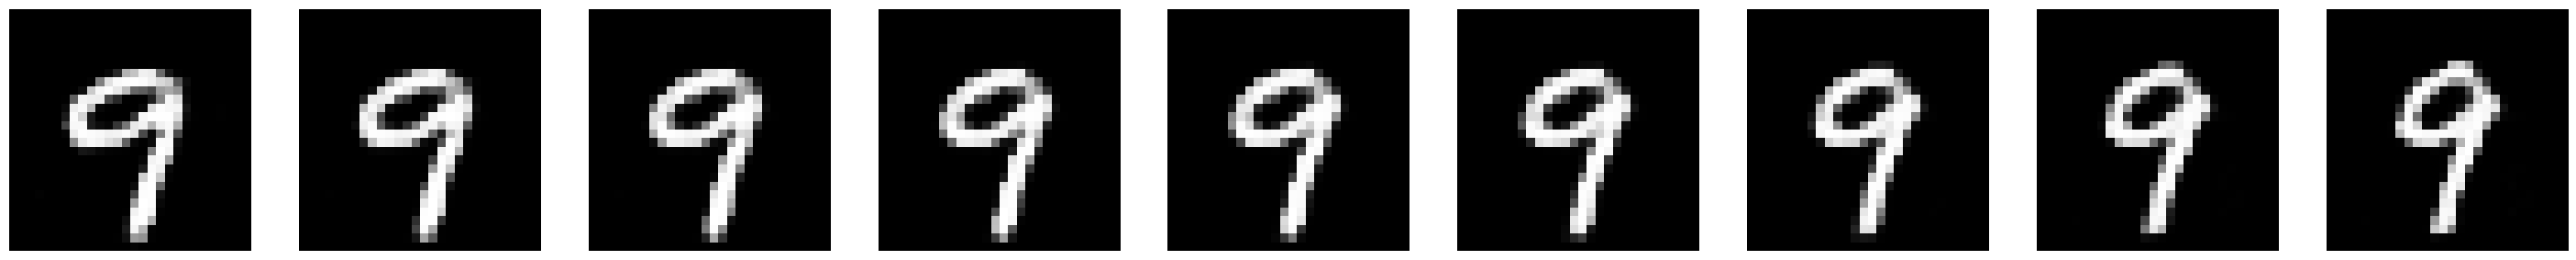

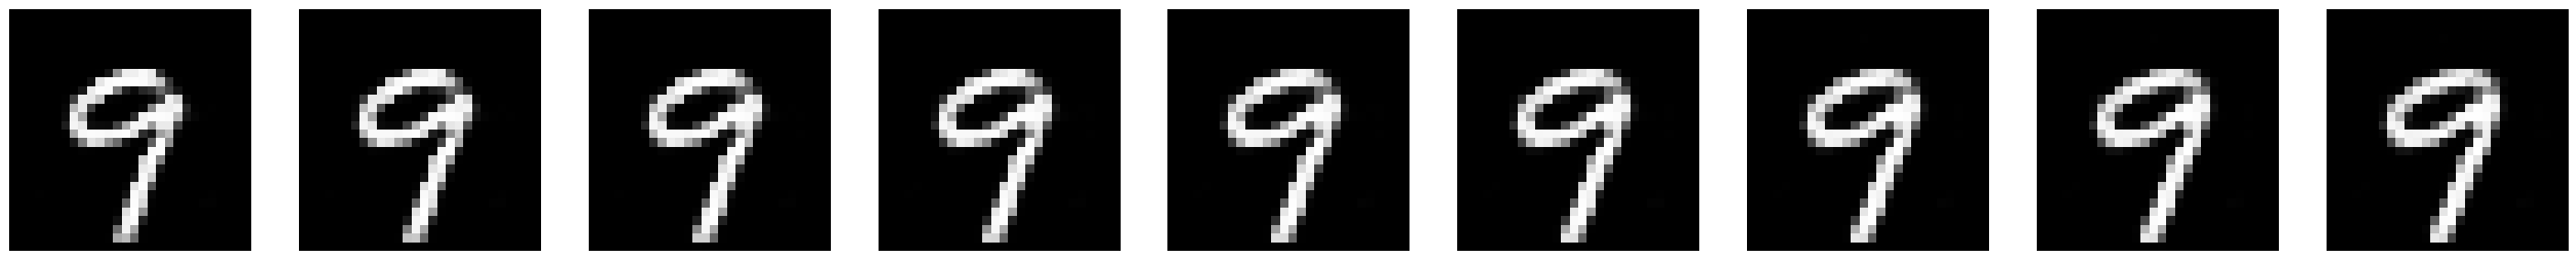

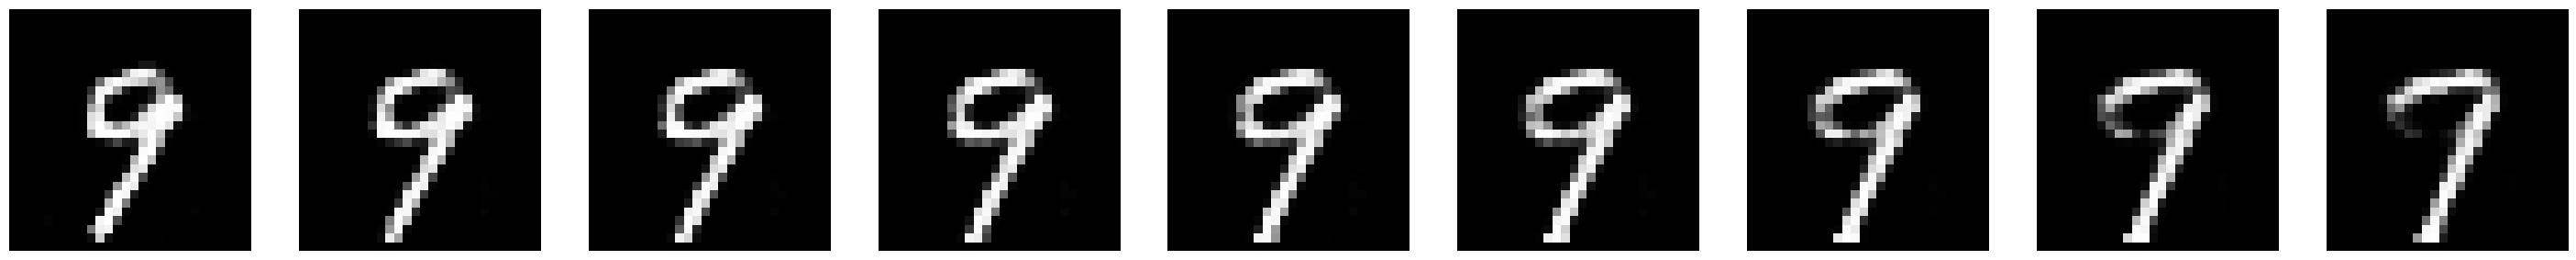

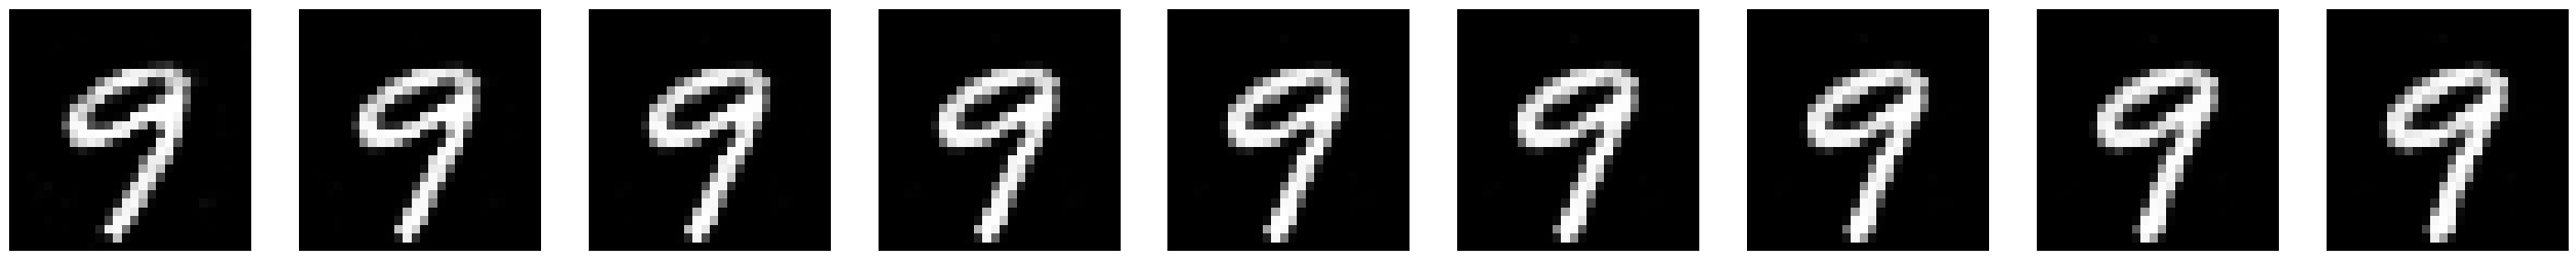

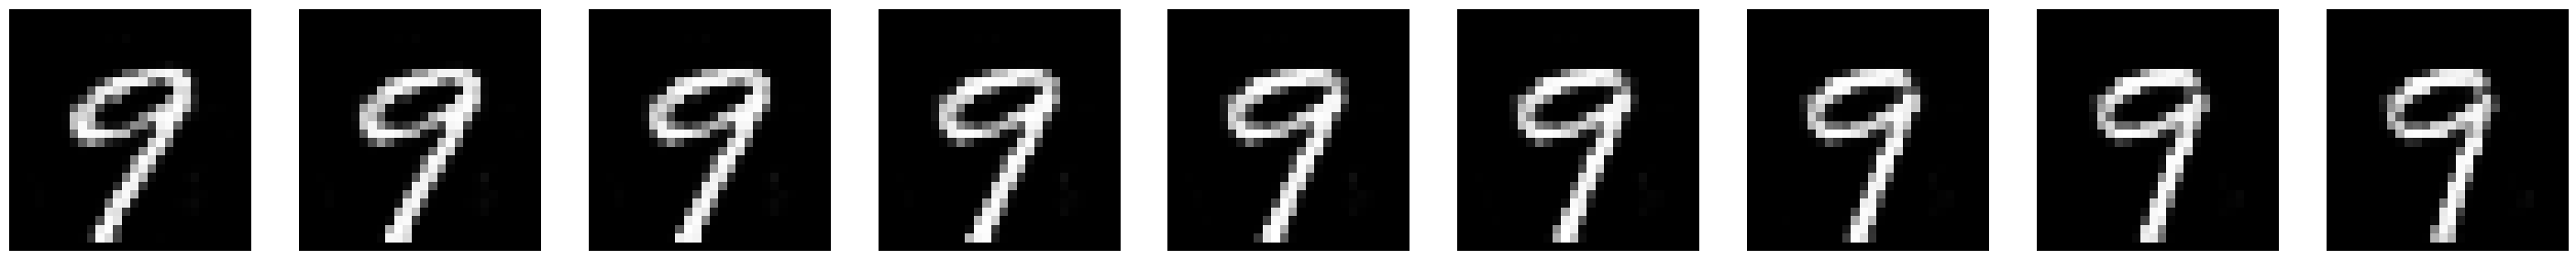

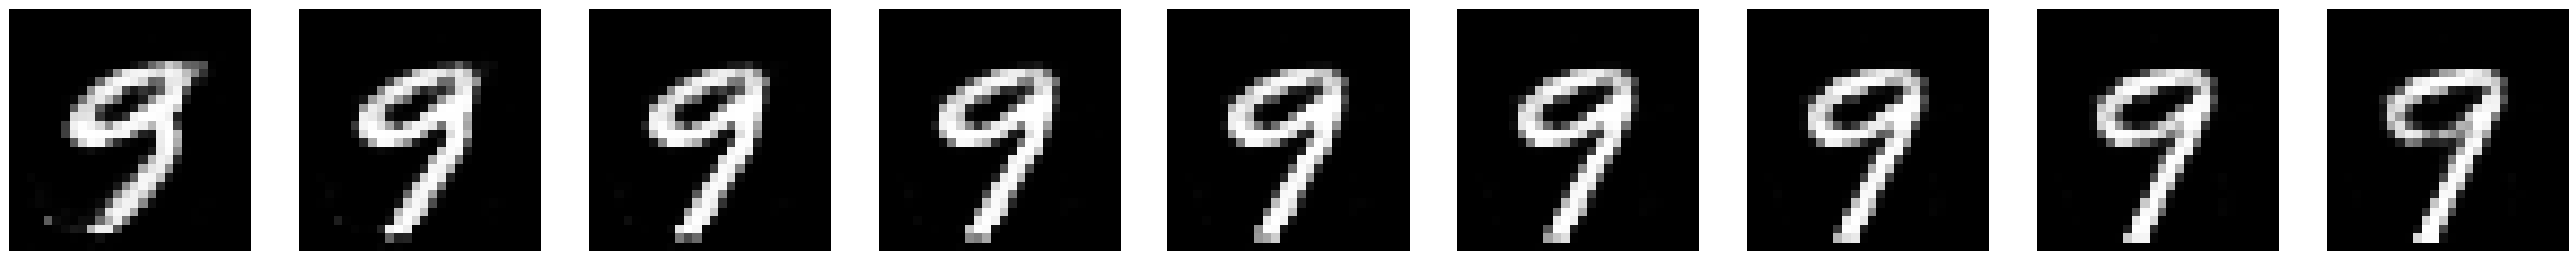

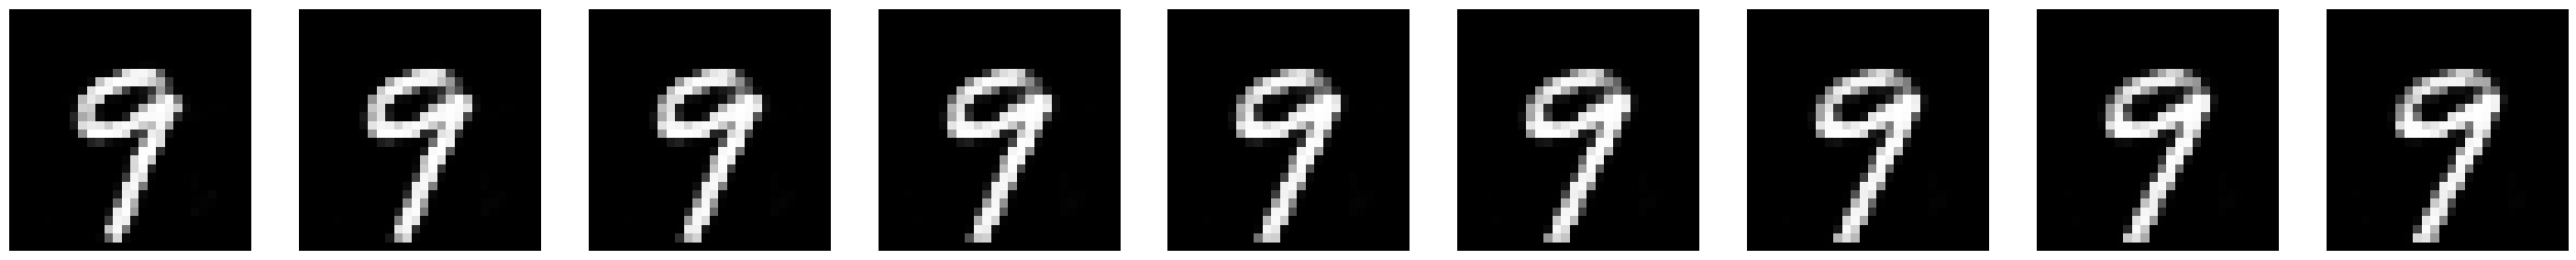

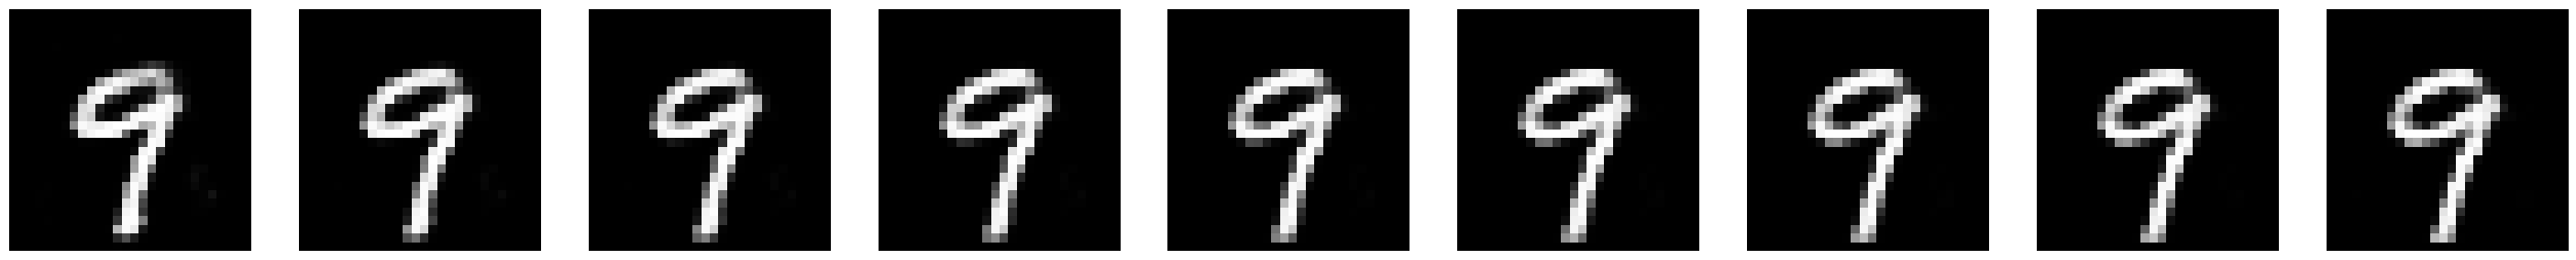

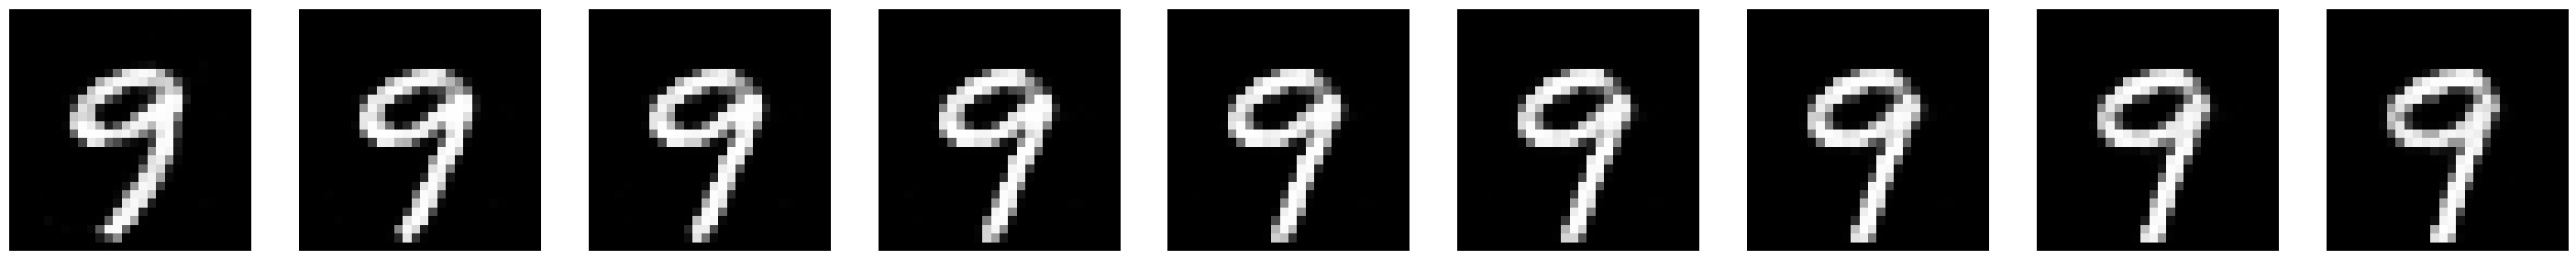

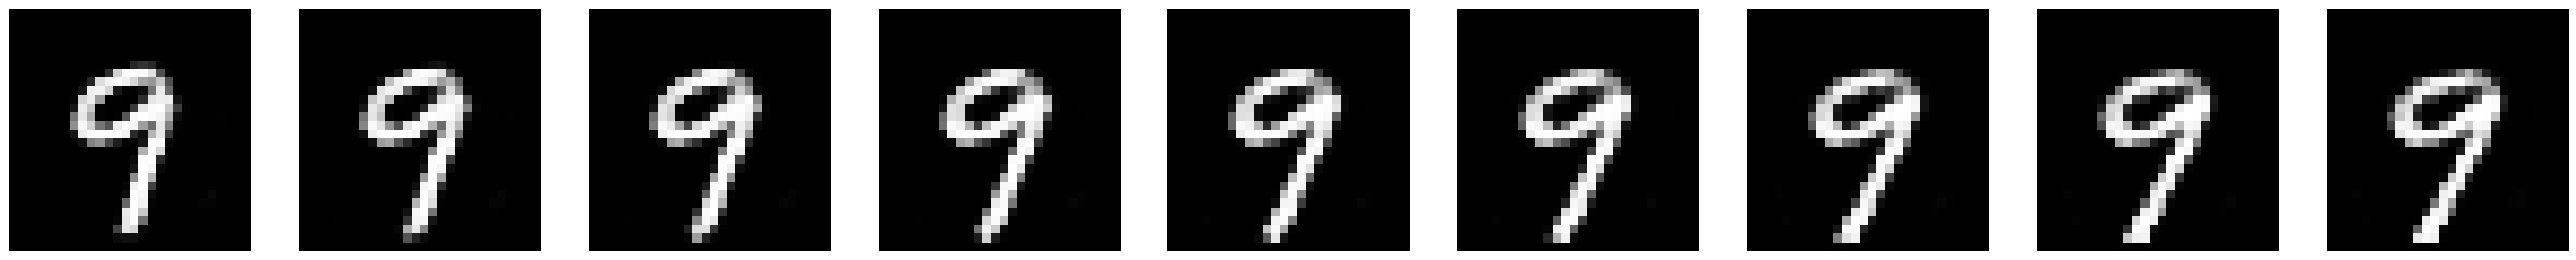

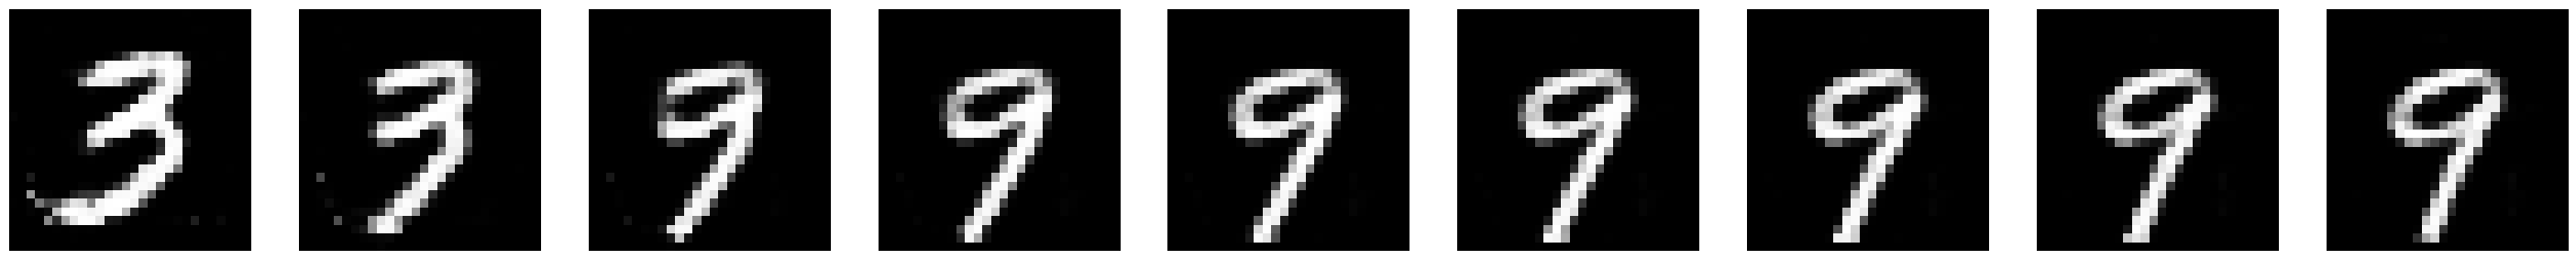

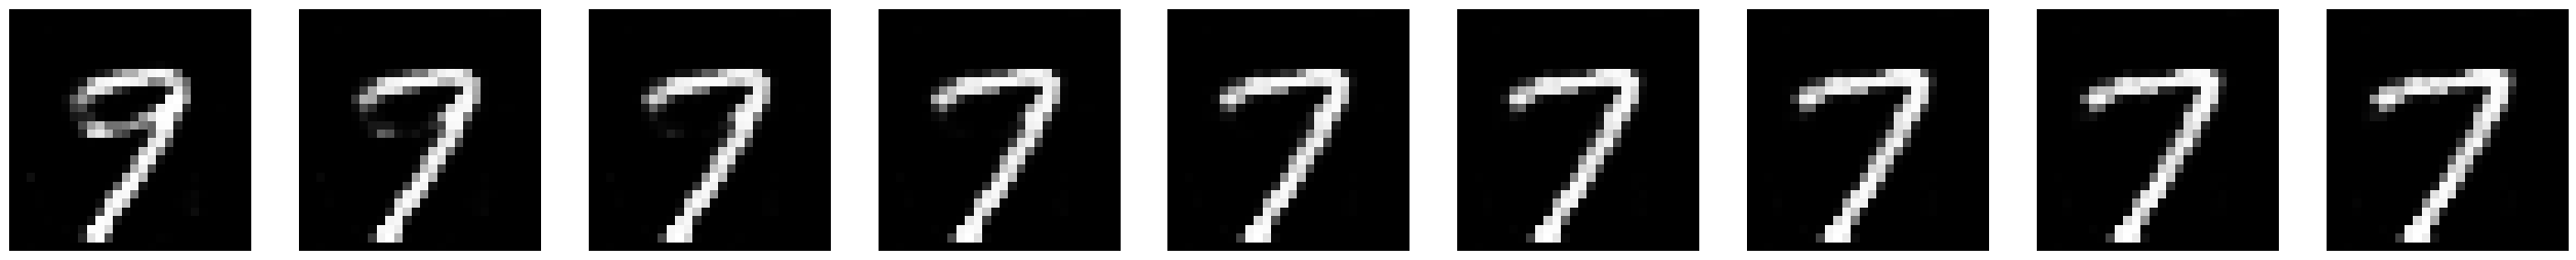

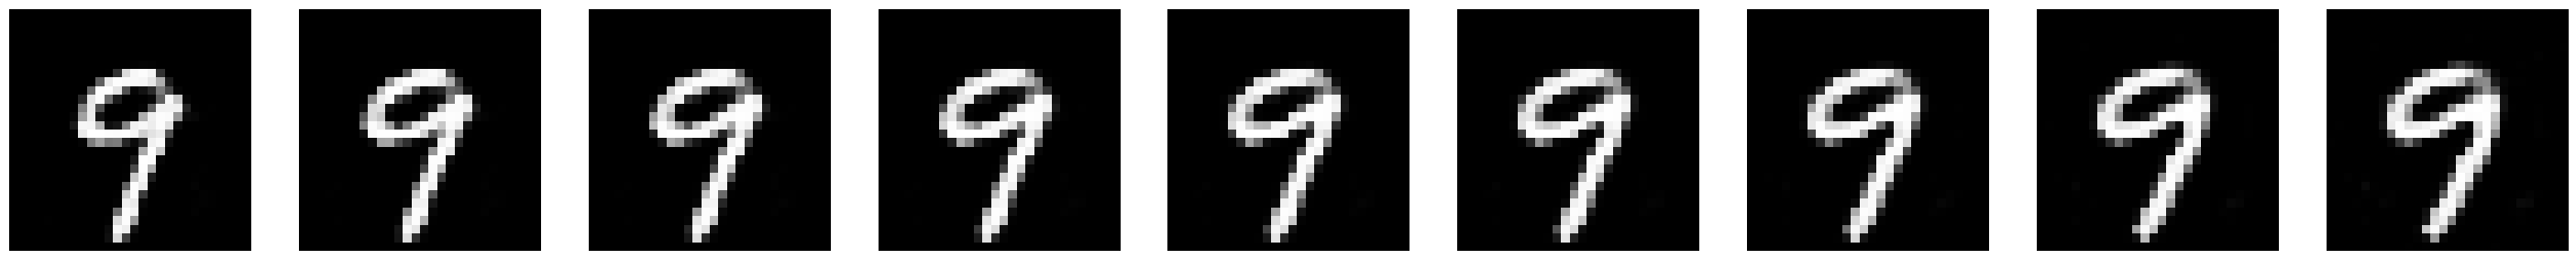

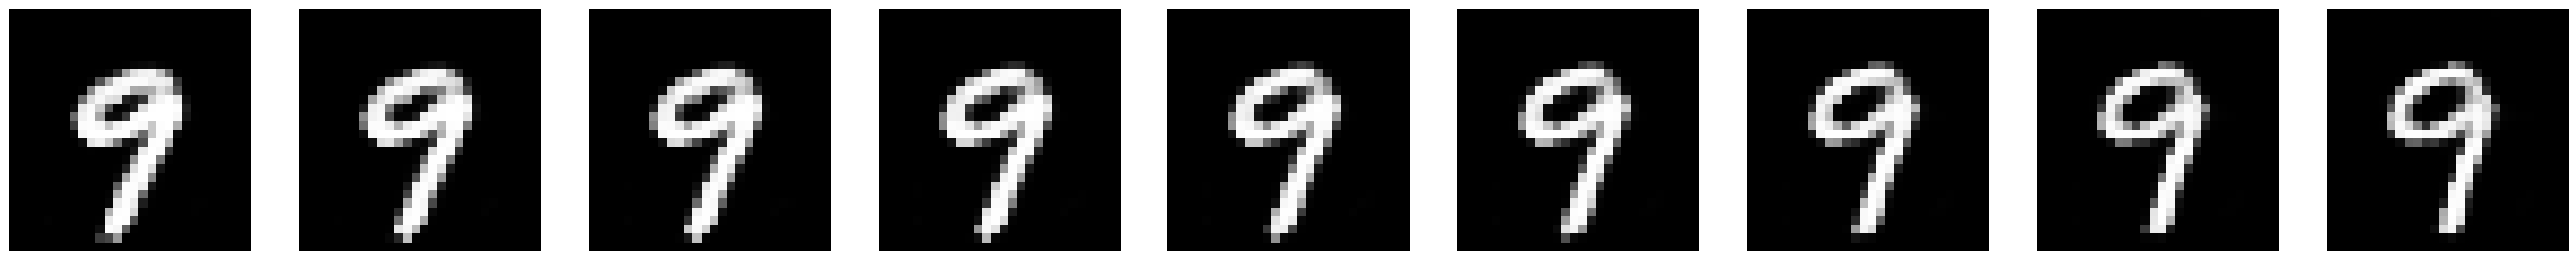

In [45]:
cnt = 0
while True:
    begin = torch.rand(100).view(1, 100)
    end = torch.rand(100).view(1, 100)
    img_begin = generator(begin).view(1, 1, 28, 28)
    img_end = generator(end).view(1, 1, 28, 28)
    
    save_image(img_begin, 'task3/begin.png', nrow=1, normalize=True)
    save_image(img_end, 'task3/end.png', nrow=1, normalize=True)
    
    noises = []
    num = 9
    
    for i in range(1, num):
        noise = begin + (i / num) * (end - begin)
        noises.append(noise)
    
    for i in range(num-1):
        img = generator(noises[i]).view(1, 1, 28, 28)
        save_image(img, f'task3/res{i}.png', nrow=num, normalize=True)
    
    fig, axes = plt.subplots(1, num, figsize=(num * 4, 4))
    axes[0].imshow(Image.open('./task3/begin.png'))
    axes[0].axis('off')
    
    for i in range(1, num-1):
        path = f'task3/res{i}.png'
        axes[i].imshow(Image.open(path))
        axes[i].axis('off')
    
    axes[num-1].imshow(Image.open('./task3/end.png'))
    axes[num-1].axis('off')
    
    plt.show()
    
    cnt += 1
    if cnt > 100:
        break
        